# Avance Proyecto

In [5]:
!pip install scrapy

You should consider upgrading via the 'c:\python37\python.exe -m pip install --upgrade pip' command.


In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

## Datasets

### Dataset 1: Sea Level

d002 -> Tarakawa, Kiribati (1.3320m 172.01300)
d003 -> Baltra, Ecuador (-0.43700, -90.28500)
d004 -> Nauru, Nauru (-0.52800, 166.90500)
d011 -> Christmas, Kiribati (1.98500, -157.47700)
d013 -> Kanton, Kiribati (-2.81000, -171.71800)
d029 -> Kapingamarangi, Micronesia (1.09800, 154.77700) 
d030 -> Santa Cruz, Ecuador (-0.75500, -90.31300)
d091 -> La Libertad, Ecuador (-2.20000, -80.91700)
d092 -> Talara, Peru (-4.58200, -81.28200)
d400 -> Lombrum, Papua New Guinea (-2.03300, 147.36700)

In [344]:
# Merge dataframe de cada estacion

df = pd.read_csv('data/sea level center/d002.csv', names=['Year', 'Month', 'Day', 'd002'])
df.head()

df_names = ['d003', 'd004', 'd011', 'd013', 'd029', 'd030', 'd091', 'd092', 'd400']


for n in df_names:
    path = 'data/sea level center/{}.csv'.format(n)
    d_right = pd.read_csv(path, names=['Year', 'Month', 'Day', n])
    df = df.merge(d_right, how='outer', on=['Year', 'Month', 'Day'])

df.sort_values(by=['Year', 'Month', 'Day'], inplace=True)
df.reset_index(inplace=True, drop=True)

df["time"] = df.apply(lambda x: datetime.date(int(x['Year']), int(x['Month']), int(x['Day'])), axis=1)
df_ECU = df[['time','d003','d030', 'd091']]
df = df[["time","d011","d013","d029","d030","d091"]]


df_ECU.rename( columns={'d003':'Balta,ECU','d030':'Santa Cruz,ECU', 'd091':'La Libertad,ECU'}, inplace=True )

df.rename( columns={'d011':'Christmas,KIR', 'd013':'Kantos,KIR', 'd029':'Kapingamarangi,FSM', 'd030':'Santa Cruz,ECU', 'd091':'La Libertad,ECU'}, inplace=True )

In [345]:
df['time'] = pd.to_datetime(df['time'], dayfirst=True)

df # Dataframe de todas las estaciones

time  Christmas,KIR  Kantos,KIR  Kapingamarangi,FSM  \
0     1949-09-02            NaN         NaN                 NaN   
1     1949-09-03            NaN         NaN                 NaN   
2     1949-09-04            NaN         NaN                 NaN   
3     1949-09-05            NaN         NaN                 NaN   
4     1949-09-06            NaN         NaN                 NaN   
...          ...            ...         ...                 ...   
26230 2021-06-26            NaN      1071.0              1029.0   
26231 2021-06-27            NaN      1052.0              1014.0   
26232 2021-06-28            NaN      1040.0                 NaN   
26233 2021-06-29            NaN      1072.0                 NaN   
26234 2021-06-30            NaN      1092.0                 NaN   

       Santa Cruz,ECU  La Libertad,ECU  
0                 NaN           2166.0  
1                 NaN           2185.0  
2                 NaN           2092.0  
3                 NaN           2081.0  
4                 NaN           2130.0  
...               ...              ...  
26230          1522.0              NaN  
26231          1512.0              NaN  
26232          1509.0              NaN  
26233          1504.0              NaN  
26234          1511.0              NaN  

[26235 rows x 6 columns]

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26235 entries, 0 to 26234
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   time                26235 non-null  datetime64[ns]
 1   Christmas,KIR       17281 non-null  float64       
 2   Kantos,KIR          17957 non-null  float64       
 3   Kapingamarangi,FSM  15633 non-null  float64       
 4   Santa Cruz,ECU      15595 non-null  float64       
 5   La Libertad,ECU     26205 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 1.2 MB


In [346]:
df_ECU['time'] = pd.to_datetime(df_ECU['time'], dayfirst=True)


In [347]:
df_ECU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26235 entries, 0 to 26234
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   time             26235 non-null  datetime64[ns]
 1   Balta,ECU        13246 non-null  float64       
 2   Santa Cruz,ECU   15595 non-null  float64       
 3   La Libertad,ECU  26205 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 820.0 KB


In [348]:
df_ECU

time  Balta,ECU  Santa Cruz,ECU  La Libertad,ECU
0     1949-09-02        NaN             NaN           2166.0
1     1949-09-03        NaN             NaN           2185.0
2     1949-09-04        NaN             NaN           2092.0
3     1949-09-05        NaN             NaN           2081.0
4     1949-09-06        NaN             NaN           2130.0
...          ...        ...             ...              ...
26230 2021-06-26     1880.0          1522.0              NaN
26231 2021-06-27     1905.0          1512.0              NaN
26232 2021-06-28     1914.0          1509.0              NaN
26233 2021-06-29     1922.0          1504.0              NaN
26234 2021-06-30     1917.0          1511.0              NaN

[26235 rows x 4 columns]

### Dataset 2 - Average Sea Surface Temperature

In [20]:
# Dataframe de 1997 

# Dataframe desde longitud 140 hasta 179.5
df_sst_1997 = pd.read_csv('https://coastwatch.pfeg.noaa.gov/erddap/griddap/erdHadISST.csv?sst%5B(1997-01-01T12:00:00Z):1:(1997-12-31T23:59:59Z)%5D%5B(5):1:(-5)%5D%5B(140):1:(179.5)%5D')

df_sst_1997.dropna(inplace=True)

# Dataframe desde longitud -179.5 hasta -80
df_sst2 = pd.read_csv('https://coastwatch.pfeg.noaa.gov/erddap/griddap/erdHadISST.csv?sst%5B(1997-01-01T12:00:00Z):1:(1997-12-31T23:59:59Z)%5D%5B(5):1:(-5)%5D%5B(-179.5):1:(-77)%5D')
df_sst2.dropna(inplace=True)


# Merge dataframes
df_sst_1997 = df_sst_1997.merge(df_sst2, how='outer', on=['time','latitude','longitude','sst'])

df_sst_1997.drop([0], inplace=True) #Primera fila es un header
df_sst_1997.reset_index(inplace=True, drop=True)

# Fixing data types
df_sst_1997['time'] = pd.to_datetime(df_sst_1997['time']) #Data type -> datetime
df_sst_1997['latitude'] = df_sst_1997['latitude'].astype(float)
df_sst_1997['longitude'] = df_sst_1997['longitude'].astype(float)
df_sst_1997['sst'] = df_sst_1997['sst'].astype(float)

df_sst_1997


time  latitude  longitude        sst
0     1997-01-16 12:00:00+00:00       5.5      140.5  28.769217
1     1997-01-16 12:00:00+00:00       5.5      141.5  28.805550
2     1997-01-16 12:00:00+00:00       5.5      142.5  28.946290
3     1997-01-16 12:00:00+00:00       5.5      143.5  29.103340
4     1997-01-16 12:00:00+00:00       5.5      144.5  29.271656
...                         ...       ...        ...        ...
20067 1998-01-16 12:00:00+00:00      -4.5      -85.5  28.673662
20068 1998-01-16 12:00:00+00:00      -4.5      -84.5  28.678600
20069 1998-01-16 12:00:00+00:00      -4.5      -83.5  28.560375
20070 1998-01-16 12:00:00+00:00      -4.5      -82.5  28.400507
20071 1998-01-16 12:00:00+00:00      -4.5      -81.5  28.367817

[20072 rows x 4 columns]

In [21]:
# Dataframe de 2015

# Dataframe desde longitud 140 hasta 179.5
df_sst_2015 = pd.read_csv('https://coastwatch.pfeg.noaa.gov/erddap/griddap/erdHadISST.csv?sst%5B(2015-01-01T12:00:00Z):1:(2015-12-31T23:59:59Z)%5D%5B(5):1:(-5)%5D%5B(140):1:(179.5)%5D')

df_sst_2015.dropna(inplace=True)

# Dataframe desde longitud -179.5 hasta -80

df_sst2 = pd.read_csv('https://coastwatch.pfeg.noaa.gov/erddap/griddap/erdHadISST.csv?sst%5B(2015-01-01T12:00:00Z):1:(2015-12-31T23:59:59Z)%5D%5B(5):1:(-5)%5D%5B(-179.5):1:(-77)%5D')
df_sst2.dropna(inplace=True)

# Merge dataframes


df_sst_2015 = df_sst_2015.merge(df_sst2, how='outer', on=['time','latitude','longitude','sst'])

df_sst_2015.drop([0], inplace=True) #Primera fila es un header
df_sst_2015.reset_index(inplace=True, drop=True)

df_sst_2015['time'] = pd.to_datetime(df_sst_2015['time']) #Data type -> datetime
df_sst_2015['latitude'] = df_sst_2015['latitude'].astype(float)
df_sst_2015['longitude'] = df_sst_2015['longitude'].astype(float)
df_sst_2015['sst'] = df_sst_2015['sst'].astype(float)

df_sst_2015

time  latitude  longitude        sst
0     2015-01-16 12:00:00+00:00       5.5      140.5  28.839882
1     2015-01-16 12:00:00+00:00       5.5      141.5  28.925926
2     2015-01-16 12:00:00+00:00       5.5      142.5  28.997150
3     2015-01-16 12:00:00+00:00       5.5      143.5  29.015670
4     2015-01-16 12:00:00+00:00       5.5      144.5  28.976440
...                         ...       ...        ...        ...
20067 2016-01-16 12:00:00+00:00      -4.5      -85.5  26.835735
20068 2016-01-16 12:00:00+00:00      -4.5      -84.5  26.561320
20069 2016-01-16 12:00:00+00:00      -4.5      -83.5  26.238153
20070 2016-01-16 12:00:00+00:00      -4.5      -82.5  25.660004
20071 2016-01-16 12:00:00+00:00      -4.5      -81.5  25.232244

[20072 rows x 4 columns]

### Dataset 3 - SODA - POP 2.2.4 Monthly Means, 1871-2010

In [110]:
df_actual = pd.read_csv('https://coastwatch.pfeg.noaa.gov/erddap/griddap/hawaii_d90f_20ee_c4cb.csvp?temp%5B(1984-01-15):1:(2010-12-15)%5D%5B(5.01):1:(5.01)%5D%5B(-5):1:(5)%5D%5B(135):1:(280)%5D,salt%5B(1984-01-15):1:(2010-12-15)%5D%5B(5.01):1:(5.01)%5D%5B(-5):1:(5)%5D%5B(135):1:(280)%5D,u%5B(1984-01-15):1:(2010-12-15)%5D%5B(5.01):1:(5.01)%5D%5B(-5):1:(5)%5D%5B(135):1:(280)%5D,v%5B(1984-01-15):1:(2010-12-15)%5D%5B(5.01):1:(5.01)%5D%5B(-5):1:(5)%5D%5B(135):1:(280)%5D')
df_actual.head()

time (UTC)  depth (m)  latitude (degrees_north)  \
0  1984-01-15T00:00:00Z       5.01                     -4.75   
1  1984-01-15T00:00:00Z       5.01                     -4.75   
2  1984-01-15T00:00:00Z       5.01                     -4.75   
3  1984-01-15T00:00:00Z       5.01                     -4.75   
4  1984-01-15T00:00:00Z       5.01                     -4.75   

   longitude (degrees_east)  temp (degree_C)  salt (PSU)  u (m s-1)  v (m s-1)  
0                    135.25        29.562305   34.071102  -0.263516   0.037770  
1                    135.75        29.568815   34.054290  -0.134401   0.084723  
2                    136.25        29.559784   34.039494  -0.001687   0.000681  
3                    136.75        29.567688   34.009098  -0.000511   0.000327  
4                    137.25        29.717936   33.960155  -0.000112   0.000096

In [112]:
df_actual.dropna()

time (UTC)  depth (m)  latitude (degrees_north)  \
0        1984-01-15T00:00:00Z       5.01                     -4.75   
1        1984-01-15T00:00:00Z       5.01                     -4.75   
2        1984-01-15T00:00:00Z       5.01                     -4.75   
3        1984-01-15T00:00:00Z       5.01                     -4.75   
4        1984-01-15T00:00:00Z       5.01                     -4.75   
...                       ...        ...                       ...   
1979959  2010-12-15T00:00:00Z       5.01                      5.25   
1979960  2010-12-15T00:00:00Z       5.01                      5.25   
1979961  2010-12-15T00:00:00Z       5.01                      5.25   
1979962  2010-12-15T00:00:00Z       5.01                      5.25   
1979963  2010-12-15T00:00:00Z       5.01                      5.25   

         longitude (degrees_east)  temp (degree_C)  salt (PSU)  u (m s-1)  \
0                          135.25        29.562305   34.071102  -0.263516   
1                          135.75        29.568815   34.054290  -0.134401   
2                          136.25        29.559784   34.039494  -0.001687   
3                          136.75        29.567688   34.009098  -0.000511   
4                          137.25        29.717936   33.960155  -0.000112   
...                           ...              ...         ...        ...   
1979959                    278.25        27.036180   31.926990   0.014610   
1979960                    278.75        26.992218   31.670920   0.014967   
1979961                    279.25        26.827795   31.775766   0.019515   
1979962                    279.75        26.704010   31.990660   0.024214   
1979963                    280.25        26.589470   32.142838   0.035245   

         v (m s-1)  
0         0.037770  
1         0.084723  
2         0.000681  
3         0.000327  
4         0.000096  
...            ...  
1979959  -0.099370  
1979960  -0.154748  
1979961  -0.171746  
1979962  -0.146778  
1979963  -0.102803  

[1945296 rows x 8 columns]

In [111]:
df_previo = pd.read_csv('https://coastwatch.pfeg.noaa.gov/erddap/griddap/hawaii_d90f_20ee_c4cb.csvp?temp%5B(1970-01-15):1:(1984-01-15)%5D%5B(5.01):1:(5.01)%5D%5B(-5):1:(5)%5D%5B(135):1:(280)%5D,salt%5B(1970-01-15):1:(1984-01-15)%5D%5B(5.01):1:(5.01)%5D%5B(-5):1:(5)%5D%5B(135):1:(280)%5D,u%5B(1970-01-15):1:(1984-01-15)%5D%5B(5.01):1:(5.01)%5D%5B(-5):1:(5)%5D%5B(135):1:(280)%5D,v%5B(1970-01-15):1:(1984-01-15)%5D%5B(5.01):1:(5.01)%5D%5B(-5):1:(5)%5D%5B(135):1:(280)%5D')
df_previo.head()

time (UTC)  depth (m)  latitude (degrees_north)  \
0  1970-01-15T00:00:00Z       5.01                     -4.75   
1  1970-01-15T00:00:00Z       5.01                     -4.75   
2  1970-01-15T00:00:00Z       5.01                     -4.75   
3  1970-01-15T00:00:00Z       5.01                     -4.75   
4  1970-01-15T00:00:00Z       5.01                     -4.75   

   longitude (degrees_east)  temp (degree_C)  salt (PSU)  u (m s-1)  v (m s-1)  
0                    135.25        28.673958   34.297750  -0.065552   0.040507  
1                    135.75        28.813316   34.307297  -0.021287   0.046534  
2                    136.25        28.896774   34.328700  -0.000599   0.000461  
3                    136.75        28.954433   34.320860  -0.000095   0.000340  
4                    137.25        29.061314   34.258873   0.000005   0.000036

In [10]:
df_previo.dropna()

time (UTC)  depth (m)  latitude (degrees_north)  \
0        1970-01-15T00:00:00Z       5.01                     -4.75   
1        1970-01-15T00:00:00Z       5.01                     -4.75   
2        1970-01-15T00:00:00Z       5.01                     -4.75   
3        1970-01-15T00:00:00Z       5.01                     -4.75   
4        1970-01-15T00:00:00Z       5.01                     -4.75   
...                       ...        ...                       ...   
1032754  1984-01-15T00:00:00Z       5.01                      5.25   
1032755  1984-01-15T00:00:00Z       5.01                      5.25   
1032756  1984-01-15T00:00:00Z       5.01                      5.25   
1032757  1984-01-15T00:00:00Z       5.01                      5.25   
1032758  1984-01-15T00:00:00Z       5.01                      5.25   

         longitude (degrees_east)  temp (degree_C)  salt (PSU)  u (m s-1)  \
0                          135.25        28.673958   34.297750  -0.065552   
1                          135.75        28.813316   34.307297  -0.021287   
2                          136.25        28.896774   34.328700  -0.000599   
3                          136.75        28.954433   34.320860  -0.000095   
4                          137.25        29.061314   34.258873   0.000005   
...                           ...              ...         ...        ...   
1032754                    278.25        27.763294   31.579021  -0.121054   
1032755                    278.75        27.750505   31.777887  -0.126866   
1032756                    279.25        27.608301   32.099182  -0.133068   
1032757                    279.75        27.279272   32.241817  -0.127870   
1032758                    280.25        26.942287   32.190670  -0.088179   

         v (m s-1)  
0         0.040507  
1         0.046534  
2         0.000461  
3         0.000340  
4         0.000036  
...            ...  
1032754  -0.239616  
1032755  -0.286342  
1032756  -0.313705  
1032757  -0.308923  
1032758  -0.247963  

[1014676 rows x 8 columns]

In [11]:
df_previo

time (UTC)  depth (m)  latitude (degrees_north)  \
0        1970-01-15T00:00:00Z       5.01                     -4.75   
1        1970-01-15T00:00:00Z       5.01                     -4.75   
2        1970-01-15T00:00:00Z       5.01                     -4.75   
3        1970-01-15T00:00:00Z       5.01                     -4.75   
4        1970-01-15T00:00:00Z       5.01                     -4.75   
...                       ...        ...                       ...   
1032754  1984-01-15T00:00:00Z       5.01                      5.25   
1032755  1984-01-15T00:00:00Z       5.01                      5.25   
1032756  1984-01-15T00:00:00Z       5.01                      5.25   
1032757  1984-01-15T00:00:00Z       5.01                      5.25   
1032758  1984-01-15T00:00:00Z       5.01                      5.25   

         longitude (degrees_east)  temp (degree_C)  salt (PSU)  u (m s-1)  \
0                          135.25        28.673958   34.297750  -0.065552   
1                          135.75        28.813316   34.307297  -0.021287   
2                          136.25        28.896774   34.328700  -0.000599   
3                          136.75        28.954433   34.320860  -0.000095   
4                          137.25        29.061314   34.258873   0.000005   
...                           ...              ...         ...        ...   
1032754                    278.25        27.763294   31.579021  -0.121054   
1032755                    278.75        27.750505   31.777887  -0.126866   
1032756                    279.25        27.608301   32.099182  -0.133068   
1032757                    279.75        27.279272   32.241817  -0.127870   
1032758                    280.25        26.942287   32.190670  -0.088179   

         v (m s-1)  
0         0.040507  
1         0.046534  
2         0.000461  
3         0.000340  
4         0.000036  
...            ...  
1032754  -0.239616  
1032755  -0.286342  
1032756  -0.313705  
1032757  -0.308923  
1032758  -0.247963  

[1032759 rows x 8 columns]

In [5]:
df_profundo_1997 = pd.read_csv('https://coastwatch.pfeg.noaa.gov/erddap/griddap/hawaii_d90f_20ee_c4cb.csvp?temp%5B(1997-08-15):1:(1997-08-15)%5D%5B(5.01):1:(5375)%5D%5B(-4.75):1:(5.25)%5D%5B(135):1:(280)%5D,salt%5B(1997-08-15):1:(1997-08-15)%5D%5B(5.01):1:(5375)%5D%5B(-4.75):1:(5.25)%5D%5B(135):1:(280)%5D,u%5B(1997-08-15):1:(1997-08-15)%5D%5B(5.01):1:(5375)%5D%5B(-4.75):1:(5.25)%5D%5B(135):1:(280)%5D,v%5B(1997-08-15):1:(1997-08-15)%5D%5B(5.01):1:(5375)%5D%5B(-4.75):1:(5.25)%5D%5B(135):1:(280)%5D,w%5B(1997-08-15):1:(1997-08-15)%5D%5B(5.01):1:(5375)%5D%5B(-4.75):1:(5.25)%5D%5B(135):1:(280)%5D')
df_profundo_1997

time (UTC)  depth (m)  latitude (degrees_north)  \
0       1997-08-15T00:00:00Z       5.01                     -4.75   
1       1997-08-15T00:00:00Z       5.01                     -4.75   
2       1997-08-15T00:00:00Z       5.01                     -4.75   
3       1997-08-15T00:00:00Z       5.01                     -4.75   
4       1997-08-15T00:00:00Z       5.01                     -4.75   
...                      ...        ...                       ...   
244435  1997-08-15T00:00:00Z    5375.00                      5.25   
244436  1997-08-15T00:00:00Z    5375.00                      5.25   
244437  1997-08-15T00:00:00Z    5375.00                      5.25   
244438  1997-08-15T00:00:00Z    5375.00                      5.25   
244439  1997-08-15T00:00:00Z    5375.00                      5.25   

        longitude (degrees_east)  temp (degree_C)  salt (PSU)  u (m s-1)  \
0                         135.25        25.902140   34.314970   0.221797   
1                         135.75        26.115147   34.341846   0.057706   
2                         136.25        25.989107   34.322506  -0.000585   
3                         136.75        26.010004   34.082813  -0.002016   
4                         137.25        26.117643   33.994858  -0.000666   
...                          ...              ...         ...        ...   
244435                    278.25              NaN         NaN        NaN   
244436                    278.75              NaN         NaN        NaN   
244437                    279.25              NaN         NaN        NaN   
244438                    279.75              NaN         NaN        NaN   
244439                    280.25              NaN         NaN        NaN   

        v (m s-1)     w (m s-1)  
0        0.133181  9.969636e-09  
1       -0.051484  1.121850e-08  
2       -0.000814  1.345884e-08  
3        0.000047  1.116461e-08  
4        0.000617  1.194565e-08  
...           ...           ...  
244435        NaN           NaN  
244436        NaN           NaN  
244437        NaN           NaN  
244438        NaN           NaN  
244439        NaN           NaN  

[244440 rows x 9 columns]

### Dataset 4 - ONI

In [1]:
import scrapy

from scrapy.linkextractors.lxmlhtml import LxmlLinkExtractor
from scrapy.spiders import Rule, CrawlSpider
from scrapy.http import Request
from scrapy.exceptions import CloseSpider

class YearItem(scrapy.Item):
    DJF = scrapy.Field()
    JFM = scrapy.Field()
    FMA = scrapy.Field()
    MAM = scrapy.Field()
    AMJ = scrapy.Field()
    MJJ = scrapy.Field()
    JJA = scrapy.Field()
    JAS = scrapy.Field()
    ASO = scrapy.Field()
    SON = scrapy.Field()
    OND = scrapy.Field()
    NDJ = scrapy.Field()
    anio = scrapy.Field()

class ClimaSpider(scrapy.Spider):
    """
    This CrawlSpider will get information about jobs. It will navigate through the links of the page
    """
    name = 'clima'
    start_urls = ['https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php']
    
    
    
    
    
    def parse(self, response):
        """
        This function takes the information from each page and return the items in the catalog.
        """
        self.logger.info('Now we are crawling: %s', response.url)
        print(response.xpath('//html'))
        i=0
        for row in response.xpath('//table[@align="center"][@border=1]//tr'):
          i+=1
          if (i-1) % 11 == 0:
            pass
          else:
            year = YearItem()
            year['anio']       = response.xpath('//table[@align="center"][@border=1]//tr['+str(i)+']/td[1]//strong/text()').get()
            year['DJF']      = response.xpath('//table[@align="center"][@border=1]//tr['+str(i)+']/td[2]//font/text()').get()
            year['JFM']    = response.xpath('//table[@align="center"][@border=1]//tr['+str(i)+']/td[3]//font/text()').get()
            year['FMA']      = response.xpath('//table[@align="center"][@border=1]//tr['+str(i)+']/td[4]//font/text()').get()
            year['MAM']      = response.xpath('//table[@align="center"][@border=1]//tr['+str(i)+']/td[5]//font/text()').get()
            year['AMJ']       = response.xpath('//table[@align="center"][@border=1]//tr['+str(i)+']/td[6]//font/text()').get()
            year['MJJ']      = response.xpath('//table[@align="center"][@border=1]//tr['+str(i)+']/td[7]//font/text()').get()
            year['JJA']      = response.xpath('//table[@align="center"][@border=1]//tr['+str(i)+']/td[8]//font/text()').get()
            year['JAS']     = response.xpath('//table[@align="center"][@border=1]//tr['+str(i)+']/td[9]//font/text()').get()
            year['ASO'] = response.xpath('//table[@align="center"][@border=1]//tr['+str(i)+']/td[10]//font/text()').get()
            year['SON']    = response.xpath('//table[@align="center"][@border=1]//tr['+str(i)+']/td[11]//font/text()').get()
            year['OND']  = response.xpath('//table[@align="center"][@border=1]//tr['+str(i)+']/td[12]//font/text()').get()
            year['NDJ']  = response.xpath('//table[@align="center"][@border=1]//tr['+str(i)+']/td[13]//font/text()').get()
            
            yield year
    

In [2]:
from scrapy.crawler import CrawlerProcess

process = CrawlerProcess(settings={
           'FEEDS': {
               'clima.csv' : {
                   'format' : 'csv',
                   'fields': ['anio', 'DJF', 'JFM', 'FMA', 'MAM', 'AMJ', 'MJJ', 'JJA', 'JAS', 'ASO', 'SON', 'OND', 'NDJ']
               }
           }
          }
    )

process.crawl( ClimaSpider )
process.start()

2021-08-15 16:24:27 [scrapy.utils.log] INFO: Scrapy 2.5.0 started (bot: scrapybot)
2021-08-15 16:24:27 [scrapy.utils.log] INFO: Versions: lxml 4.6.3.0, libxml2 2.9.5, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 21.2.0, Python 3.7.7 (tags/v3.7.7:d7c567b08f, Mar 10 2020, 10:41:24) [MSC v.1900 64 bit (AMD64)], pyOpenSSL 20.0.1 (OpenSSL 1.1.1k  25 Mar 2021), cryptography 3.4.7, Platform Windows-10-10.0.19041-SP0
2021-08-15 16:24:27 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor
2021-08-15 16:24:27 [scrapy.crawler] INFO: Overridden settings:
{}
2021-08-15 16:24:27 [scrapy.extensions.telnet] INFO: Telnet Password: 7bbb90d705b025ee
2021-08-15 16:24:27 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.feedexport.FeedExporter',
 'scrapy.extensions.logstats.LogStats']
2021-08-15 16:24:27 [scrapy.middleware] INFO: Enabled downloader middlewares:
['sc

[<Selector xpath='//html' data='<html>\n\n<!-- \tClimate Prediction Cent...'>]


2021-08-15 16:24:28 [scrapy.core.scraper] DEBUG: Scraped from <200 https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php>
{'AMJ': '-0.3',
 'ASO': '-0.1',
 'DJF': '-0.2',
 'FMA': '-0.2',
 'JAS': '-0.1',
 'JFM': '-0.2',
 'JJA': '0.0',
 'MAM': '-0.3',
 'MJJ': '-0.2',
 'NDJ': '-0.4',
 'OND': '-0.3',
 'SON': '-0.2',
 'anio': '1962'}
2021-08-15 16:24:28 [scrapy.core.scraper] DEBUG: Scraped from <200 https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php>
{'AMJ': '0.3',
 'ASO': '1.2',
 'DJF': '-0.4',
 'FMA': '0.2',
 'JAS': '1.1',
 'JFM': '-0.2',
 'JJA': '0.9',
 'MAM': '0.3',
 'MJJ': '0.5',
 'NDJ': '1.3',
 'OND': '1.4',
 'SON': '1.3',
 'anio': '1963'}
2021-08-15 16:24:28 [scrapy.core.scraper] DEBUG: Scraped from <200 https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php>
{'AMJ': '-0.6',
 'ASO': '-0.8',
 'DJF': '1.1',
 'FMA': '0.1',
 'JAS': '-0.7',
 'JFM': '0.6',
 'JJA': '-0.6',
 'MAM': '-0.3',
 'MJJ': '-0.6',

2021-08-15 16:24:28 [scrapy.core.scraper] DEBUG: Scraped from <200 https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php>
{'AMJ': '-0.1',
 'ASO': '0.7',
 'DJF': '-0.5',
 'FMA': '-0.3',
 'JAS': '0.4',
 'JFM': '-0.5',
 'JJA': '0.2',
 'MAM': '-0.2',
 'MJJ': '0.0',
 'NDJ': '1.2',
 'OND': '1.1',
 'SON': '0.9',
 'anio': '1986'}
2021-08-15 16:24:28 [scrapy.core.scraper] DEBUG: Scraped from <200 https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php>
{'AMJ': '1.0',
 'ASO': '1.6',
 'DJF': '1.2',
 'FMA': '1.1',
 'JAS': '1.7',
 'JFM': '1.2',
 'JJA': '1.5',
 'MAM': '0.9',
 'MJJ': '1.2',
 'NDJ': '1.1',
 'OND': '1.3',
 'SON': '1.5',
 'anio': '1987'}
2021-08-15 16:24:28 [scrapy.core.scraper] DEBUG: Scraped from <200 https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php>
{'AMJ': '-0.9',
 'ASO': '-1.2',
 'DJF': '0.8',
 'FMA': '0.1',
 'JAS': '-1.1',
 'JFM': '0.5',
 'JJA': '-1.3',
 'MAM': '-0.3',
 'MJJ': '-1.3',
 'NDJ':

2021-08-15 16:24:29 [scrapy.core.scraper] DEBUG: Scraped from <200 https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php>
{'AMJ': '-0.2',
 'ASO': '-1.6',
 'DJF': '1.5',
 'FMA': '0.8',
 'JAS': '-1.3',
 'JFM': '1.2',
 'JJA': '-1.0',
 'MAM': '0.4',
 'MJJ': '-0.7',
 'NDJ': '-1.6',
 'OND': '-1.6',
 'SON': '-1.6',
 'anio': '2010'}
2021-08-15 16:24:29 [scrapy.core.scraper] DEBUG: Scraped from <200 https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php>
{'AMJ': '-0.6',
 'ASO': '-0.8',
 'DJF': '-1.4',
 'FMA': '-0.9',
 'JAS': '-0.6',
 'JFM': '-1.2',
 'JJA': '-0.5',
 'MAM': '-0.7',
 'MJJ': '-0.4',
 'NDJ': '-1.0',
 'OND': '-1.1',
 'SON': '-1.0',
 'anio': '2011'}
2021-08-15 16:24:29 [scrapy.core.scraper] DEBUG: Scraped from <200 https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php>
{'AMJ': '-0.3',
 'ASO': '0.4',
 'DJF': '-0.9',
 'FMA': '-0.6',
 'JAS': '0.4',
 'JFM': '-0.7',
 'JJA': '0.2',
 'MAM': '-0.5',
 'MJJ': 

In [258]:
df_ONI = pd.read_csv('clima.csv')
df_ONI.set_index('anio', inplace=True)
df_ONI.head()

DJF  JFM  FMA  MAM  AMJ  MJJ  JJA  JAS  ASO  SON  OND  NDJ
anio                                                            
1950 -1.5 -1.3 -1.2 -1.2 -1.1 -0.9 -0.5 -0.4 -0.4 -0.4 -0.6 -0.8
1951 -0.8 -0.5 -0.2  0.2  0.4  0.6  0.7  0.9  1.0  1.2  1.0  0.8
1952  0.5  0.4  0.3  0.3  0.2  0.0 -0.1  0.0  0.2  0.1  0.0  0.1
1953  0.4  0.6  0.6  0.7  0.8  0.8  0.7  0.7  0.8  0.8  0.8  0.8
1954  0.8  0.5  0.0 -0.4 -0.5 -0.5 -0.6 -0.8 -0.9 -0.8 -0.7 -0.7

# Total de años en el dataset

In [15]:
len(df_ONI)

72

In [259]:
# Valores mayores a 0.5 -> Posible presencia de fenomeno El Niño
# df_ONI.max(axis=1)
df_ONI_Ninio = df_ONI.loc[df_ONI.max(axis=1)>= 0.5]
len(df_ONI_Ninio)

47

In [261]:
df_ONI_Ninio.index

Int64Index([1951, 1952, 1953, 1954, 1957, 1958, 1959, 1963, 1964, 1965, 1966,
            1968, 1969, 1970, 1972, 1973, 1976, 1977, 1978, 1979, 1980, 1982,
            1983, 1986, 1987, 1988, 1991, 1992, 1993, 1994, 1995, 1997, 1998,
            2002, 2003, 2004, 2005, 2006, 2007, 2009, 2010, 2014, 2015, 2016,
            2018, 2019, 2020],
           dtype='int64', name='anio')

In [17]:
# Porcentaje de posibles años con Anomalias +0.5 (Niño)

(len(df_ONI_Ninio)*100)/len(df_ONI)


65.27777777777777

In [18]:
# Valores menores a -0.5 -> Posible presencia de fenomeno La Niña
df_ONI_Ninia = df_ONI.loc[df_ONI.min(axis=1)<= -0.5]
len(df_ONI_Ninia)

44

In [19]:
# Porcentaje de posibles años con Anomalias +0.5 (Niño)

(len(df_ONI_Ninia)*100)/len(df_ONI)

61.111111111111114

In [20]:
# Años con anomalias de El Niño y La Niña
df_ONI_Todos = df_ONI.loc[(df_ONI.max(axis=1)>= 0.5) & (df_ONI.min(axis=1)<= -0.5) ]
len(df_ONI_Todos)

24

In [442]:
# Valores mayores a 1.8 -> Niños extraordinarios
df_ONI_Ninio_Extra = df_ONI.loc[df_ONI.max(axis=1)>= 1.8]
len(df_ONI_Ninio_Extra)

10

In [459]:
df_ONI_Ninio

DJF  JFM  FMA  MAM  AMJ  MJJ  JJA  JAS  ASO  SON  OND  NDJ
anio                                                            
1951 -0.8 -0.5 -0.2  0.2  0.4  0.6  0.7  0.9  1.0  1.2  1.0  0.8
1952  0.5  0.4  0.3  0.3  0.2  0.0 -0.1  0.0  0.2  0.1  0.0  0.1
1953  0.4  0.6  0.6  0.7  0.8  0.8  0.7  0.7  0.8  0.8  0.8  0.8
1954  0.8  0.5  0.0 -0.4 -0.5 -0.5 -0.6 -0.8 -0.9 -0.8 -0.7 -0.7
1957 -0.2  0.1  0.4  0.7  0.9  1.1  1.3  1.3  1.3  1.4  1.5  1.7
1958  1.8  1.7  1.3  0.9  0.7  0.6  0.6  0.4  0.4  0.4  0.5  0.6
1959  0.6  0.6  0.5  0.3  0.2 -0.1 -0.2 -0.3 -0.1  0.0  0.0  0.0
1963 -0.4 -0.2  0.2  0.3  0.3  0.5  0.9  1.1  1.2  1.3  1.4  1.3
1964  1.1  0.6  0.1 -0.3 -0.6 -0.6 -0.6 -0.7 -0.8 -0.8 -0.8 -0.8
1965 -0.6 -0.3 -0.1  0.2  0.5  0.8  1.2  1.5  1.9  2.0  2.0  1.7
1966  1.4  1.2  1.0  0.7  0.4  0.2  0.2  0.1 -0.1 -0.1 -0.2 -0.3
1968 -0.6 -0.7 -0.6 -0.4  0.0  0.3  0.6  0.5  0.4  0.5  0.7  1.0
1969  1.1  1.1  0.9  0.8  0.6  0.4  0.4  0.5  0.8  0.9  0.8  0.6
1970  0.5  0.3  0.3  0.2  0.0 -0.3 -0.6 -0.8 -0.8 -0.7 -0.9 -1.1
1972 -0.7 -0.4  0.1  0.4  0.7  0.9  1.1  1.4  1.6  1.8  2.1  2.1
1973  1.8  1.2  0.5 -0.1 -0.5 -0.9 -1.1 -1.3 -1.5 -1.7 -1.9 -2.0
1976 -1.6 -1.2 -0.7 -0.5 -0.3  0.0  0.2  0.4  0.6  0.8  0.9  0.8
1977  0.7  0.6  0.3  0.2  0.2  0.3  0.4  0.4  0.6  0.7  0.8  0.8
1978  0.7  0.4  0.1 -0.2 -0.3 -0.3 -0.4 -0.4 -0.4 -0.3 -0.1  0.0
1979  0.0  0.1  0.2  0.3  0.2  0.0  0.0  0.2  0.3  0.5  0.5  0.6
1980  0.6  0.5  0.3  0.4  0.5  0.5  0.3  0.0 -0.1  0.0  0.1  0.0
1982  0.0  0.1  0.2  0.5  0.7  0.7  0.8  1.1  1.6  2.0  2.2  2.2
1983  2.2  1.9  1.5  1.3  1.1  0.7  0.3 -0.1 -0.5 -0.8 -1.0 -0.9
1986 -0.5 -0.5 -0.3 -0.2 -0.1  0.0  0.2  0.4  0.7  0.9  1.1  1.2
1987  1.2  1.2  1.1  0.9  1.0  1.2  1.5  1.7  1.6  1.5  1.3  1.1
1988  0.8  0.5  0.1 -0.3 -0.9 -1.3 -1.3 -1.1 -1.2 -1.5 -1.8 -1.8
1991  0.4  0.3  0.2  0.3  0.5  0.6  0.7  0.6  0.6  0.8  1.2  1.5
1992  1.7  1.6  1.5  1.3  1.1  0.7  0.4  0.1 -0.1 -0.2 -0.3 -0.1
1993  0.1  0.3  0.5  0.7  0.7  0.6  0.3  0.3  0.2  0.1  0.0  0.1
1994  0.1  0.1  0.2  0.3  0.4  0.4  0.4  0.4  0.6  0.7  1.0  1.1
1995  1.0  0.7  0.5  0.3  0.1  0.0 -0.2 -0.5 -0.8 -1.0 -1.0 -1.0
1997 -0.5 -0.4 -0.1  0.3  0.8  1.2  1.6  1.9  2.1  2.3  2.4  2.4
1998  2.2  1.9  1.4  1.0  0.5 -0.1 -0.8 -1.1 -1.3 -1.4 -1.5 -1.6
2002 -0.1  0.0  0.1  0.2  0.4  0.7  0.8  0.9  1.0  1.2  1.3  1.1
2003  0.9  0.6  0.4  0.0 -0.3 -0.2  0.1  0.2  0.3  0.3  0.4  0.4
2004  0.4  0.3  0.2  0.2  0.2  0.3  0.5  0.6  0.7  0.7  0.7  0.7
2005  0.6  0.6  0.4  0.4  0.3  0.1 -0.1 -0.1 -0.1 -0.3 -0.6 -0.8
2006 -0.9 -0.8 -0.6 -0.4 -0.1  0.0  0.1  0.3  0.5  0.8  0.9  0.9
2007  0.7  0.2 -0.1 -0.3 -0.4 -0.5 -0.6 -0.8 -1.1 -1.3 -1.5 -1.6
2009 -0.8 -0.8 -0.6 -0.3  0.0  0.3  0.5  0.6  0.7  1.0  1.4  1.6
2010  1.5  1.2  0.8  0.4 -0.2 -0.7 -1.0 -1.3 -1.6 -1.6 -1.6 -1.6
2014 -0.4 -0.5 -0.3  0.0  0.2  0.2  0.0  0.1  0.2  0.5  0.6  0.7
2015  0.5  0.5  0.5  0.7  0.9  1.2  1.5  1.9  2.2  2.4  2.6  2.6
2016  2.5  2.1  1.6  0.9  0.4 -0.1 -0.4 -0.5 -0.6 -0.7 -0.7 -0.6
2018 -0.9 -0.9 -0.7 -0.5 -0.2  0.0  0.1  0.2  0.5  0.8  0.9  0.8
2019  0.7  0.7  0.7  0.7  0.5  0.5  0.3  0.1  0.2  0.3  0.5  0.5
2020  0.5  0.5  0.4  0.2 -0.1 -0.3 -0.4 -0.6 -0.9 -1.2 -1.3 -1.2

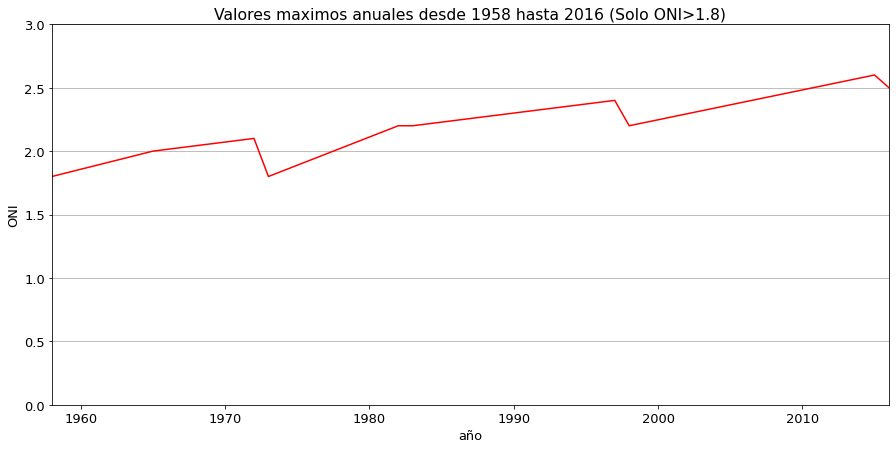

In [456]:
# df_y_70_84 = df_70_84[['time','Christmas,KIR','Kantos,KIR','Kapingamarangi,FSM','Santa Cruz,ECU','La Libertad,ECU']]

# plt.rc('font', size=10) 


plt.figure(figsize=(15, 7))
plt.plot(df_ONI_Ninio_Extra.max(axis=1), c='r')

# plt.legend(['Christmas,KIR','Kantos,KIR','Kapingamarangi,FSM','Santa Cruz,ECU','La Libertad,ECU'],
#           loc='upper center', bbox_to_anchor=(0.5, -0.05),
#           fancybox=True, shadow=True, ncol=5)

plt.ylabel('ONI')
plt.xlabel('año')

plt.axis([1958, 2016,0,3])

plt.grid(axis='y')

plt.title('Valores maximos anuales desde 1958 hasta 2016 (Solo ONI>1.8)')
plt.show()

In [22]:
df_ONI_Ninio_Extra.max(axis=1)

anio
1958    1.8
1965    2.0
1972    2.1
1973    1.8
1982    2.2
1983    2.2
1997    2.4
1998    2.2
2015    2.6
2016    2.5
dtype: float64

In [23]:
# Porcentaje de posibles años con anomalias de El Niño y La Niña

(len(df_ONI_Todos)*100)/len(df_ONI)

33.333333333333336

In [25]:
# Años con indice mayor de ONI por temporada
df_ONI.idxmax()


DJF    2016
JFM    2016
FMA    2016
MAM    1983
AMJ    1983
MJJ    1987
JJA    1997
JAS    1997
ASO    2015
SON    2015
OND    2015
NDJ    2015
dtype: int64

In [50]:
df_ONI.loc[1992]

DJF    1.7
JFM    1.6
FMA    1.5
MAM    1.3
AMJ    1.1
MJJ    0.7
JJA    0.4
JAS    0.1
ASO   -0.1
SON   -0.2
OND   -0.3
NDJ   -0.1
Name: 1992, dtype: float64

## 1) Relacion entre periodo de 1970-1984, 1985-1999 y 2000-2020

In [267]:
# Dataframe dividido por años a investigar

# # Dataframe 1970 a 1984
df_70_84 = df.loc[(df['time'].dt.year>=1970) & (df['time'].dt.year<=1984) ]
df_70_84.reset_index(inplace=True, drop=True)

# # Dataframe 1985 - 2020
df_85_20 = df.loc[ (df['time'].dt.year>1984) & (df['time'].dt.year<= 2020) ]

# # Dataframe 1970 a 1984
df_85_99 = df.loc[(df['time'].dt.year>=1985) & (df['time'].dt.year<=1999) ]
df_85_99.reset_index(inplace=True, drop=True)


# # Dataframe 1985 - 2020
df_00_20 = df.loc[ (df['time'].dt.year>1999) & (df['time'].dt.year<= 2020) ]
df_00_20.reset_index(inplace=True, drop=True)

# Manejo de valores nulos en dataframe



# Manejo de valores atipicos (-32767

df_70_84 = df_70_84.replace(-32767, np.NaN)
df_85_99 = df_85_99.replace(-32767, np.NaN)
df_00_20 = df_00_20.replace(-32767, np.NaN)



In [301]:
# Dataframe dividido por años importantes 1997 y 2015

# # Dataframe 1997
df_lvl_97 = df.loc[(df['time'].dt.year==1997)]
df_lvl_97.reset_index(inplace=True, drop=True)

# # Dataframe 2015
df_lvl_15 = df.loc[(df['time'].dt.year==2015)]
df_lvl_15.reset_index(inplace=True, drop=True)



# Manejo de valores nulos en dataframe
# Manejo de valores atipicos (-32767

df_lvl_97 = df_lvl_97.replace(-32767, np.NaN)
df_lvl_15 = df_lvl_15.replace(-32767, np.NaN)



In [303]:
df_lvl_15

time  Christmas,KIR  Kantos,KIR  Kapingamarangi,FSM  Santa Cruz,ECU  \
0   2015-01-01          825.0         NaN              1108.0          1591.0   
1   2015-01-02          807.0         NaN              1114.0          1571.0   
2   2015-01-03          798.0         NaN              1123.0          1562.0   
3   2015-01-04          805.0         NaN              1147.0          1565.0   
4   2015-01-05          832.0         NaN              1199.0          1557.0   
..         ...            ...         ...                 ...             ...   
360 2015-12-27            NaN      1163.0               941.0          1708.0   
361 2015-12-28            NaN      1196.0               927.0          1698.0   
362 2015-12-29            NaN      1265.0               912.0          1682.0   
363 2015-12-30            NaN      1360.0               912.0          1657.0   
364 2015-12-31            NaN      1313.0               909.0          1684.0   

     La Libertad,ECU  
0             2577.0  
1             2566.0  
2             2556.0  
3             2524.0  
4             2530.0  
..               ...  
360           2621.0  
361           2600.0  
362           2576.0  
363           2565.0  
364           2574.0  

[365 rows x 6 columns]

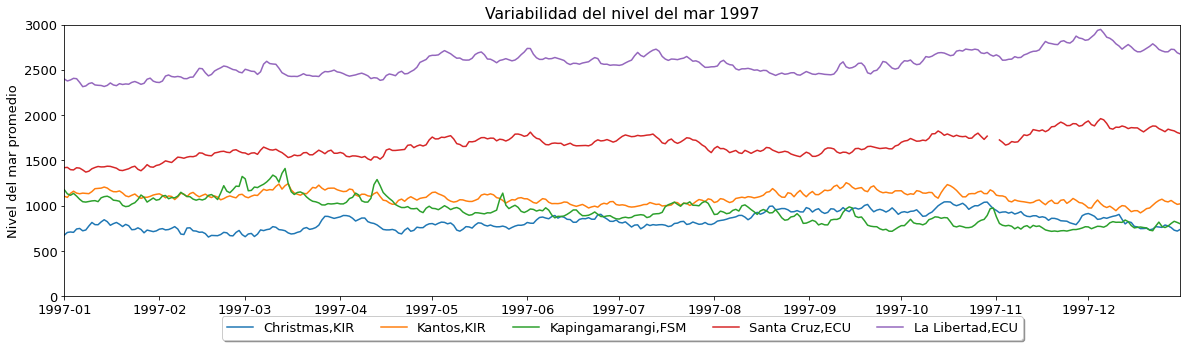

In [309]:
# df_y_70_84 = df_70_84[['time','Christmas,KIR','Kantos,KIR','Kapingamarangi,FSM','Santa Cruz,ECU','La Libertad,ECU']]

plt.figure(figsize=(20, 5))
plt.plot(df_lvl_97['time'].values,df_lvl_97['Christmas,KIR'])
plt.plot(df_lvl_97['time'].values,df_lvl_97['Kantos,KIR'])
plt.plot(df_lvl_97['time'].values,df_lvl_97['Kapingamarangi,FSM'])
plt.plot(df_lvl_97['time'].values,df_lvl_97['Santa Cruz,ECU'])
plt.plot(df_lvl_97['time'].values,df_lvl_97['La Libertad,ECU'])

plt.legend(['Christmas,KIR','Kantos,KIR','Kapingamarangi,FSM','Santa Cruz,ECU','La Libertad,ECU'],
          loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

plt.ylabel('Nivel del mar promedio')
# plt.xlabel('year')

plt.axis(['1997-01-01', '1997-12-31',0,3000])


plt.title('Variabilidad del nivel del mar 1997')
plt.show()

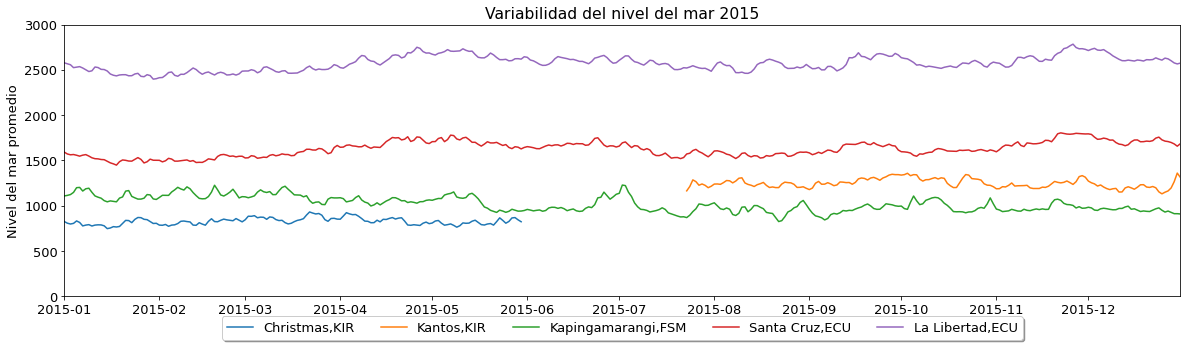

In [310]:
# df_y_70_84 = df_70_84[['time','Christmas,KIR','Kantos,KIR','Kapingamarangi,FSM','Santa Cruz,ECU','La Libertad,ECU']]

plt.figure(figsize=(20, 5))
plt.plot(df_lvl_15['time'].values,df_lvl_15['Christmas,KIR'])
plt.plot(df_lvl_15['time'].values,df_lvl_15['Kantos,KIR'])
plt.plot(df_lvl_15['time'].values,df_lvl_15['Kapingamarangi,FSM'])
plt.plot(df_lvl_15['time'].values,df_lvl_15['Santa Cruz,ECU'])
plt.plot(df_lvl_15['time'].values,df_lvl_15['La Libertad,ECU'])

plt.legend(['Christmas,KIR','Kantos,KIR','Kapingamarangi,FSM','Santa Cruz,ECU','La Libertad,ECU'],
          loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

plt.ylabel('Nivel del mar promedio')
# plt.xlabel('year')

plt.axis(['2015-01-01', '2015-12-31',0,3000])


plt.title('Variabilidad del nivel del mar 2015')
plt.show()

In [268]:
df_00_20

time  Christmas,KIR  Kantos,KIR  Kapingamarangi,FSM  \
0    2000-01-01          602.0      1061.0              1088.0   
1    2000-01-02          609.0      1030.0              1065.0   
2    2000-01-03          591.0      1034.0              1048.0   
3    2000-01-04          591.0      1043.0              1030.0   
4    2000-01-05          596.0      1023.0              1020.0   
...         ...            ...         ...                 ...   
7666 2020-12-27          607.0      1076.0                 NaN   
7667 2020-12-28          596.0      1068.0                 NaN   
7668 2020-12-29          610.0      1083.0                 NaN   
7669 2020-12-30          637.0      1091.0              1132.0   
7670 2020-12-31          656.0      1070.0              1133.0   

      Santa Cruz,ECU  La Libertad,ECU  
0             1394.0           2267.0  
1             1398.0           2258.0  
2             1396.0           2279.0  
3             1369.0           2248.0  
4             1350.0           2200.0  
...              ...              ...  
7666          1479.0           2380.0  
7667          1482.0           2378.0  
7668          1502.0           2400.0  
7669          1497.0           2420.0  
7670          1483.0           2449.0  

[7671 rows x 6 columns]

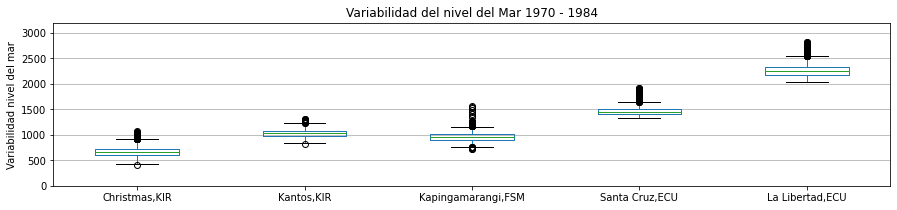

In [470]:
# data = df_anio_p.astype(np.float)

# fig1, ax1 = plt.subplots()
# ax1.set_title('Basic Plot')
# ax1.boxplot(data)

# plt.show()

df_70_84_y = df_70_84.set_index('time')
# df_p_all_2

# df_70_84
plt.figure(figsize=(15, 3))
df_70_84_y.boxplot(grid=False)


# plt.figure(figsize=(6, 10))
# df_70_84_y.boxplot(grid=False, rot=45)

plt.title('Variabilidad del nivel del Mar 1970 - 1984')

# plt.xticks()

# plt.xlabel('Estaciones')
plt.ylabel('Variabilidad nivel del mar')
plt.grid(axis = 'y')
plt.axis(ymin=0,ymax=3200)


plt.show()

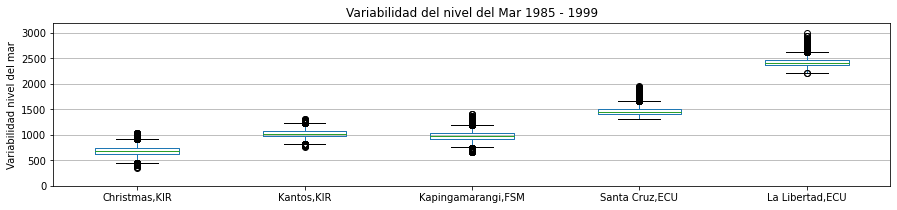

In [469]:

df_85_99_y = df_85_99.set_index('time')
# df_p_all_2

plt.figure(figsize=(15, 3))
df_85_99.boxplot(grid=False)

plt.rc('font', size=10) 



# plt.title('Variabilidad del nivel del Mar por estacion 1985 - 1999')
plt.title('Variabilidad del nivel del Mar 1985 - 1999')


# plt.xticks()

# plt.xlabel('Estaciones')
plt.ylabel('Variabilidad nivel del mar')
plt.grid(axis = 'y')

plt.axis(ymin=0,ymax=3200)
plt.show()

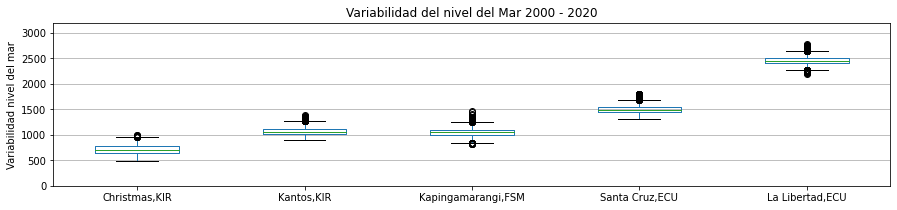

In [472]:

df_00_20_y = df_00_20.set_index('time')
# df_p_all_2

# df_70_84
plt.rc('font', size=10) 

plt.figure(figsize=(15, 3))
df_00_20.boxplot(grid=False)

# plt.figure(figsize=(6, 10))
# df_00_20.boxplot(grid=False, rot=45)

plt.title('Variabilidad del nivel del Mar 2000 - 2020')

plt.axis(ymin=0,ymax=3200)


# plt.xticks()

# plt.xlabel('Estaciones')
plt.ylabel('Variabilidad nivel del mar')
plt.grid(axis = 'y')


plt.show()

In [473]:

# Se ha reemplazado estos valores por el promedio anual

stations = ['Christmas,KIR','Kantos,KIR','Kapingamarangi,FSM','Santa Cruz,ECU','La Libertad,ECU']

df_70_84["year"] = df_70_84['time'].dt.year
df_85_99['year'] = df_85_99['time'].dt.year
df_00_20['year'] = df_00_20['time'].dt.year


#Periodo 1

for s in stations:
    df_70_84[s] = df_70_84[s].fillna(df_70_84.groupby('year')[s].transform('mean'))


# #Periodo 2
for s in stations:
    df_85_99[s] = df_85_99[s].fillna(df_85_99.groupby('year')[s].transform('mean'))

    
# #Periodo 3
for s in stations:
    df_00_20[s] = df_00_20[s].fillna(df_00_20.groupby('year')[s].transform('mean'))
    
df_70_84

time  Christmas,KIR  Kantos,KIR  Kapingamarangi,FSM  \
0    1970-01-01            NaN         NaN                 NaN   
1    1970-01-02            NaN         NaN                 NaN   
2    1970-01-03            NaN         NaN                 NaN   
3    1970-01-04            NaN         NaN                 NaN   
4    1970-01-05            NaN         NaN                 NaN   
...         ...            ...         ...                 ...   
5474 1984-12-27          637.0      1104.0              1063.0   
5475 1984-12-28          624.0      1073.0              1068.0   
5476 1984-12-29          645.0      1065.0              1074.0   
5477 1984-12-30          646.0      1083.0              1077.0   
5478 1984-12-31          627.0      1082.0              1060.0   

      Santa Cruz,ECU  La Libertad,ECU  year  
0                NaN           2242.0  1970  
1                NaN           2232.0  1970  
2                NaN           2210.0  1970  
3                NaN           2197.0  1970  
4                NaN           2194.0  1970  
...              ...              ...   ...  
5474          1404.0           2381.0  1984  
5475          1400.0           2357.0  1984  
5476          1386.0           2341.0  1984  
5477          1379.0           2356.0  1984  
5478          1404.0           2350.0  1984  

[5479 rows x 7 columns]

In [159]:
df_70_84.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5479 entries, 0 to 5478
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   time                5479 non-null   datetime64[ns]
 1   Christmas,KIR       4018 non-null   float64       
 2   Kantos,KIR          4749 non-null   float64       
 3   Kapingamarangi,FSM  2557 non-null   float64       
 4   Santa Cruz,ECU      2557 non-null   float64       
 5   La Libertad,ECU     5479 non-null   float64       
 6   year                5479 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 299.8 KB


In [215]:
df_85_99

time  Christmas,KIR  Kantos,KIR  Kapingamarangi,FSM  \
0    1985-01-01          628.0      1061.0              1048.0   
1    1985-01-02          640.0      1056.0              1094.0   
2    1985-01-03          622.0      1046.0              1099.0   
3    1985-01-04          611.0      1035.0              1068.0   
4    1985-01-05          623.0      1021.0              1077.0   
...         ...            ...         ...                 ...   
5473 1999-12-27          614.0      1047.0              1031.0   
5474 1999-12-28          593.0      1041.0              1037.0   
5475 1999-12-29          601.0      1044.0              1057.0   
5476 1999-12-30          623.0      1081.0              1053.0   
5477 1999-12-31          586.0      1079.0              1072.0   

      Santa Cruz,ECU  La Libertad,ECU  year  
0             1431.0           2340.0  1985  
1             1438.0           2331.0  1985  
2             1415.0           2299.0  1985  
3             1413.0           2299.0  1985  
4             1406.0           2279.0  1985  
...              ...              ...   ...  
5473          1406.0           2347.0  1999  
5474          1434.0           2366.0  1999  
5475          1410.0           2337.0  1999  
5476          1415.0           2294.0  1999  
5477          1408.0           2263.0  1999  

[5478 rows x 7 columns]

In [160]:
df_85_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13149 entries, 12905 to 26053
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   time                13149 non-null  datetime64[ns]
 1   Christmas,KIR       13149 non-null  float64       
 2   Kantos,KIR          13149 non-null  float64       
 3   Kapingamarangi,FSM  13149 non-null  float64       
 4   Santa Cruz,ECU      13149 non-null  float64       
 5   La Libertad,ECU     13149 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 719.1 KB


In [158]:
df_00_20

time  Christmas,KIR  Kantos,KIR  Kapingamarangi,FSM  \
0    2000-01-01          602.0      1061.0         1088.000000   
1    2000-01-02          609.0      1030.0         1065.000000   
2    2000-01-03          591.0      1034.0         1048.000000   
3    2000-01-04          591.0      1043.0         1030.000000   
4    2000-01-05          596.0      1023.0         1020.000000   
...         ...            ...         ...                 ...   
7666 2020-12-27          607.0      1076.0         1077.953368   
7667 2020-12-28          596.0      1068.0         1077.953368   
7668 2020-12-29          610.0      1083.0         1077.953368   
7669 2020-12-30          637.0      1091.0         1132.000000   
7670 2020-12-31          656.0      1070.0         1133.000000   

      Santa Cruz,ECU  La Libertad,ECU  year  
0             1394.0           2267.0  2000  
1             1398.0           2258.0  2000  
2             1396.0           2279.0  2000  
3             1369.0           2248.0  2000  
4             1350.0           2200.0  2000  
...              ...              ...   ...  
7666          1479.0           2380.0  2020  
7667          1482.0           2378.0  2020  
7668          1502.0           2400.0  2020  
7669          1497.0           2420.0  2020  
7670          1483.0           2449.0  2020  

[7671 rows x 7 columns]

In [161]:
df_00_20.info

<bound method DataFrame.info of            time  Christmas,KIR  Kantos,KIR  Kapingamarangi,FSM  \
0    2000-01-01          602.0      1061.0         1088.000000   
1    2000-01-02          609.0      1030.0         1065.000000   
2    2000-01-03          591.0      1034.0         1048.000000   
3    2000-01-04          591.0      1043.0         1030.000000   
4    2000-01-05          596.0      1023.0         1020.000000   
...         ...            ...         ...                 ...   
7666 2020-12-27          607.0      1076.0         1077.953368   
7667 2020-12-28          596.0      1068.0         1077.953368   
7668 2020-12-29          610.0      1083.0         1077.953368   
7669 2020-12-30          637.0      1091.0         1132.000000   
7670 2020-12-31          656.0      1070.0         1133.000000   

      Santa Cruz,ECU  La Libertad,ECU  year  
0             1394.0           2267.0  2000  
1             1398.0           2258.0  2000  
2             1396.0           2279.0

### Visualizaciones

In [216]:
# Periodos agrupados por año

#Periodo 1
df_p_1=df_70_84
df_p_1 = df_p_1.groupby('year').mean()
df_p_1.reset_index(inplace=True)


#Periodo 2
df_p_2=df_85_99
df_p_2 = df_p_2.groupby('year').mean()
df_p_2.reset_index(inplace=True)


#Periodo 3
df_p_3=df_00_20
df_p_3 = df_p_3.groupby('year').mean()
df_p_3.reset_index(inplace=True)



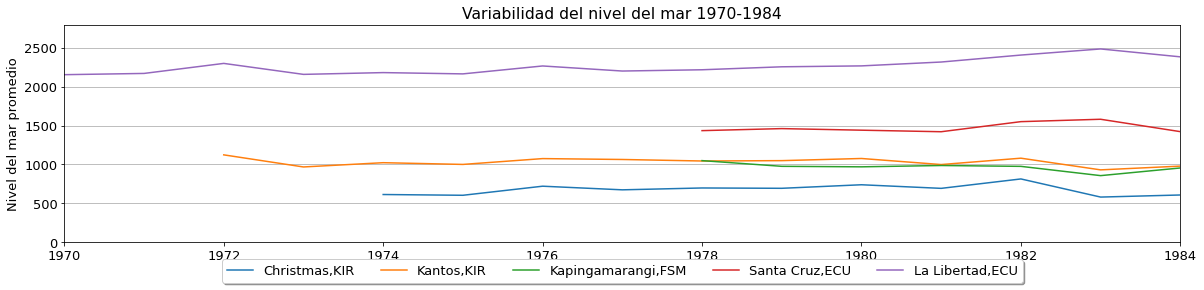

In [416]:
# df_y_70_84 = df_70_84[['time','Christmas,KIR','Kantos,KIR','Kapingamarangi,FSM','Santa Cruz,ECU','La Libertad,ECU']]

plt.figure(figsize=(20,4))
plt.plot(df_p_1['year'].values,df_p_1['Christmas,KIR'])
plt.plot(df_p_1['year'].values,df_p_1['Kantos,KIR'])
plt.plot(df_p_1['year'].values,df_p_1['Kapingamarangi,FSM'])
plt.plot(df_p_1['year'].values,df_p_1['Santa Cruz,ECU'])
plt.plot(df_p_1['year'].values,df_p_1['La Libertad,ECU'])

plt.legend(['Christmas,KIR','Kantos,KIR','Kapingamarangi,FSM','Santa Cruz,ECU','La Libertad,ECU'],
          loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

plt.ylabel('Nivel del mar promedio')
# plt.xlabel('year')

plt.axis([1970, 1984,0,2800])
plt.grid(axis = 'y')

plt.title('Variabilidad del nivel del mar 1970-1984')
plt.show()

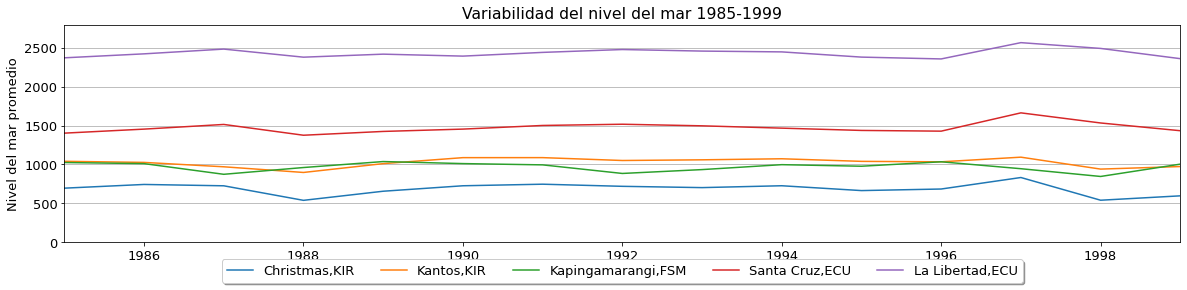

In [417]:
# df_y_70_84 = df_70_84[['time','Christmas,KIR','Kantos,KIR','Kapingamarangi,FSM','Santa Cruz,ECU','La Libertad,ECU']]

plt.figure(figsize=(20, 4))
plt.plot(df_p_2['year'].values,df_p_2['Christmas,KIR'])
plt.plot(df_p_2['year'].values,df_p_2['Kantos,KIR'])
plt.plot(df_p_2['year'].values,df_p_2['Kapingamarangi,FSM'])
plt.plot(df_p_2['year'].values,df_p_2['Santa Cruz,ECU'])
plt.plot(df_p_2['year'].values,df_p_2['La Libertad,ECU'])

plt.legend(['Christmas,KIR','Kantos,KIR','Kapingamarangi,FSM','Santa Cruz,ECU','La Libertad,ECU'],
          loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

plt.ylabel('Nivel del mar promedio')
# plt.xlabel('year')

plt.axis([1985, 1999,0,2800])
plt.grid(axis = 'y')

plt.title('Variabilidad del nivel del mar 1985-1999')
plt.show()

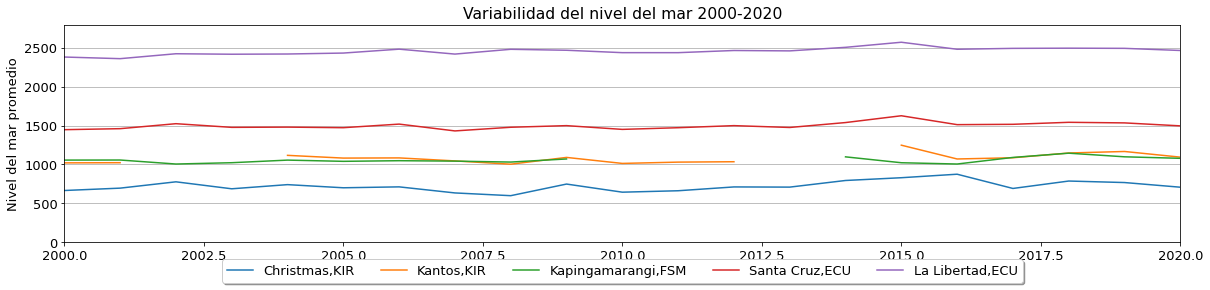

In [412]:
# df_y_70_84 = df_70_84[['time','Christmas,KIR','Kantos,KIR','Kapingamarangi,FSM','Santa Cruz,ECU','La Libertad,ECU']]

plt.figure(figsize=(20, 4))
plt.plot(df_p_3['year'].values,df_p_3['Christmas,KIR'])
plt.plot(df_p_3['year'].values,df_p_3['Kantos,KIR'])
plt.plot(df_p_3['year'].values,df_p_3['Kapingamarangi,FSM'])
plt.plot(df_p_3['year'].values,df_p_3['Santa Cruz,ECU'])
plt.plot(df_p_3['year'].values,df_p_3['La Libertad,ECU'])

plt.legend(['Christmas,KIR','Kantos,KIR','Kapingamarangi,FSM','Santa Cruz,ECU','La Libertad,ECU'],
          loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

plt.ylabel('Nivel del mar promedio')
# plt.xlabel('year')

plt.axis([2000, 2020,0,2800])
plt.grid(axis = 'y')

plt.title('Variabilidad del nivel del mar 2000-2020')
plt.show()

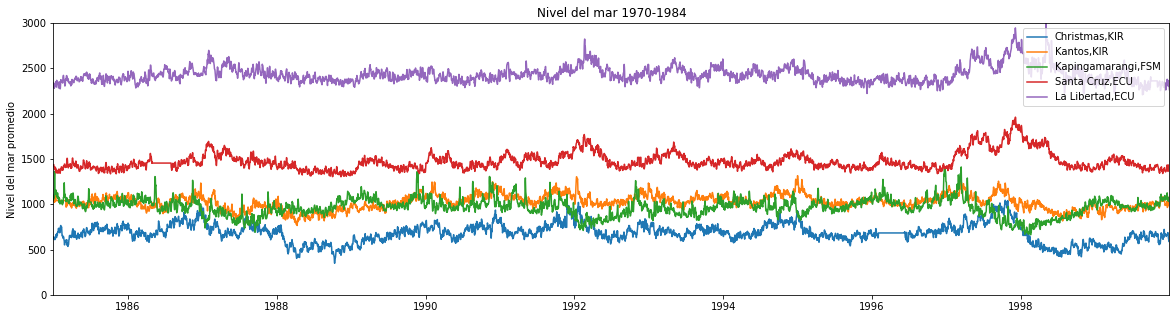

In [187]:

plt.figure(figsize=(20, 5))
plt.plot(df_85_99['time'].values,df_85_99['Christmas,KIR'])
plt.plot(df_85_99['time'].values,df_85_99['Kantos,KIR'])
plt.plot(df_85_99['time'].values,df_85_99['Kapingamarangi,FSM'])
plt.plot(df_85_99['time'].values,df_85_99['Santa Cruz,ECU'])
plt.plot(df_85_99['time'].values,df_85_99['La Libertad,ECU'])

plt.legend(['Christmas,KIR','Kantos,KIR','Kapingamarangi,FSM','Santa Cruz,ECU','La Libertad,ECU'])

plt.ylabel('Nivel del mar promedio')
# plt.xlabel('year')

plt.axis(['1985-01-01', '1999-12-31',0,3000])

plt.title('Nivel del mar 1970-1984')
plt.show()

## Analisis de variabilidad del nivel del mar en todos los periodos

In [228]:
df_p_all = df_p_1.merge(df_p_2, how='outer', on=['year','Christmas,KIR','Kantos,KIR','Kapingamarangi,FSM','Santa Cruz,ECU','La Libertad,ECU'])

df_p_all = df_p_all.merge(df_p_3, how='outer', on=['year','Christmas,KIR','Kantos,KIR','Kapingamarangi,FSM','Santa Cruz,ECU','La Libertad,ECU'])
df_p_all

year  Christmas,KIR   Kantos,KIR  Kapingamarangi,FSM  Santa Cruz,ECU  \
0   1970            NaN          NaN                 NaN             NaN   
1   1971            NaN          NaN                 NaN             NaN   
2   1972            NaN  1122.500000                 NaN             NaN   
3   1973            NaN   966.728045                 NaN             NaN   
4   1974     611.812883  1021.580822                 NaN             NaN   
5   1975     601.997199   999.323120                 NaN             NaN   
6   1976     718.896440  1074.276712                 NaN             NaN   
7   1977     672.189041  1062.955432                 NaN             NaN   
8   1978     696.056180  1043.383754         1048.350877     1434.410959   
9   1979     691.850187  1048.071633          974.951070     1460.534247   
10  1980     737.459384  1075.760000          968.369318     1440.160656   
11  1981     691.181009   997.666667          985.393293     1420.317829   
12  1982     812.351429  1079.673469          974.418182     1550.169863   
13  1983     578.915068   929.221053          855.042194     1580.887671   
14  1984     605.770492   977.603825          953.704918     1421.417910   
15  1985     693.638356  1039.522152         1023.859155     1402.147945   
16  1986     741.400000  1025.328767         1009.590028     1453.970588   
17  1987     724.084932   968.882192          872.174157     1514.115068   
18  1988     536.887978   895.857923          959.311475     1375.232240   
19  1989     654.123288  1009.539726         1036.232877     1424.126027   
20  1990     724.419178  1086.556164         1010.071233     1454.145205   
21  1991     744.669468  1086.827397          993.556164     1501.016438   
22  1992     717.330579  1049.906336          883.073770     1516.872881   
23  1993     700.731507  1058.632877          932.712329     1496.339726   
24  1994     724.728767  1072.140884          996.205479     1466.539726   
25  1995     662.435616  1038.767123          976.164384     1437.035616   
26  1996     682.642857  1032.912568         1033.218579     1427.765027   
27  1997     830.742466  1092.736986          944.109589     1663.290055   
28  1998     538.336986   939.175342          844.239316     1533.035616   
29  1999     594.832877   972.052055         1003.126027     1433.312329   
30  2000     663.472678  1019.387978         1055.072874     1446.691257   
31  2001     693.916435  1021.551402         1056.005525     1459.723288   
32  2002     775.312329          NaN         1004.432877     1523.821918   
33  2003     685.513423          NaN         1021.353425     1476.635616   
34  2004     739.057377  1116.133779         1054.816940     1479.672131   
35  2005     698.594521  1080.884932         1039.147945     1472.290850   
36  2006     710.304110  1083.191781         1047.249315     1518.482192   
37  2007     632.230241  1044.522124         1041.821918     1430.720548   
38  2008     596.858065  1002.278689         1029.672131     1477.885714   
39  2009     746.408219  1089.556164         1069.681818     1498.725490   
40  2010     641.920548  1012.301587                 NaN     1450.484932   
41  2011     660.305296  1028.975342                 NaN     1472.134247   
42  2012     709.528926  1034.000000                 NaN     1498.784153   
43  2013     707.090411          NaN                 NaN     1475.162465   
44  2014     792.473973          NaN         1096.807107     1538.435616   
45  2015     828.100000  1247.111111         1021.013699     1625.991781   
46  2016     873.250000  1069.434426         1004.505464     1511.516393   
47  2017     689.895890  1085.136986         1089.340426     1515.876712   
48  2018     785.356164  1146.484932         1144.104730     1541.641096   
49  2019     765.961644  1166.019157         1097.395122     1534.053691   
50  2020     705.920765  1093.079235         1077.953368     1495.816940   

    La Libertad,ECU  
0       2154.921283  
1      

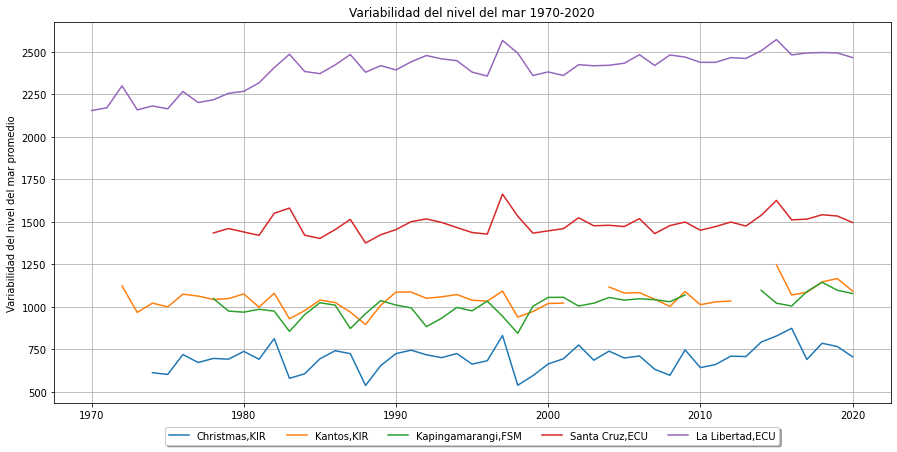

In [266]:
# df_y_70_84 = df_70_84[['time','Christmas,KIR','Kantos,KIR','Kapingamarangi,FSM','Santa Cruz,ECU','La Libertad,ECU']]

plt.rc('font', size=10) 


plt.figure(figsize=(15, 7))
plt.plot(df_p_all['year'].values,df_p_all['Christmas,KIR'])
plt.plot(df_p_all['year'].values,df_p_all['Kantos,KIR'])
plt.plot(df_p_all['year'].values,df_p_all['Kapingamarangi,FSM'])
plt.plot(df_p_all['year'].values,df_p_all['Santa Cruz,ECU'])
plt.plot(df_p_all['year'].values,df_p_all['La Libertad,ECU'])

plt.legend(['Christmas,KIR','Kantos,KIR','Kapingamarangi,FSM','Santa Cruz,ECU','La Libertad,ECU'],
          loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

plt.ylabel('Variabilidad del nivel del mar promedio')
# plt.xlabel('year')

# plt.axis([2000, 2020,0,2600])

plt.grid()

plt.title('Variabilidad del nivel del mar 1970-2020')
plt.show()

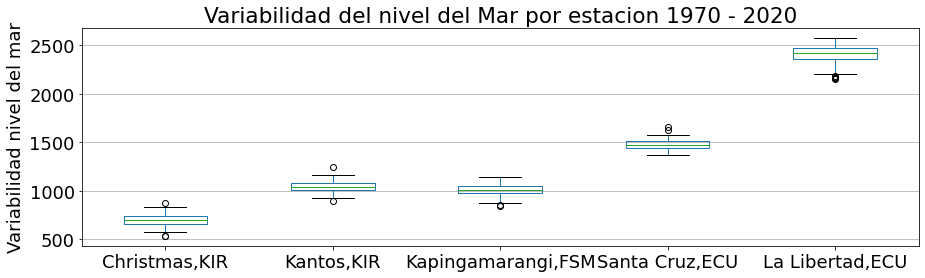

In [461]:
# data = df_anio_p.astype(np.float)

# fig1, ax1 = plt.subplots()
# ax1.set_title('Basic Plot')
# ax1.boxplot(data)

# plt.show()

df_p_all_2 = df_p_all.set_index('year')
df_p_all_2

plt.rc('font', size=18) 
plt.figure(figsize=(15, 4))

df_p_all_2.boxplot(grid=False)

plt.title('Variabilidad del nivel del Mar por estacion 1970 - 2020')

# plt.xticks()

# plt.xlabel('Estaciones')
plt.ylabel('Variabilidad nivel del mar')
plt.grid(axis = 'y')


plt.show()

In [262]:
# Se han extraido todos los años con ONI>0.5 

df_p_all_no_ninio = df_p_all_2.drop([1970, 1972, 1973, 1976, 1977, 1978, 1979, 1980, 1982,
            1983, 1986, 1987, 1988, 1991, 1992, 1993, 1994, 1995, 1997, 1998,
            2002, 2003, 2004, 2005, 2006, 2007, 2009, 2010, 2014, 2015, 2016,
            2018, 2019, 2020])
df_p_all_no_ninio

Christmas,KIR   Kantos,KIR  Kapingamarangi,FSM  Santa Cruz,ECU  \
year                                                                   
1971            NaN          NaN                 NaN             NaN   
1974     611.812883  1021.580822                 NaN             NaN   
1975     601.997199   999.323120                 NaN             NaN   
1981     691.181009   997.666667          985.393293     1420.317829   
1984     605.770492   977.603825          953.704918     1421.417910   
1985     693.638356  1039.522152         1023.859155     1402.147945   
1989     654.123288  1009.539726         1036.232877     1424.126027   
1990     724.419178  1086.556164         1010.071233     1454.145205   
1996     682.642857  1032.912568         1033.218579     1427.765027   
1999     594.832877   972.052055         1003.126027     1433.312329   
2000     663.472678  1019.387978         1055.072874     1446.691257   
2001     693.916435  1021.551402         1056.005525     1459.723288   
2008     596.858065  1002.278689         1029.672131     1477.885714   
2011     660.305296  1028.975342                 NaN     1472.134247   
2012     709.528926  1034.000000                 NaN     1498.784153   
2013     707.090411          NaN                 NaN     1475.162465   
2017     689.895890  1085.136986         1089.340426     1515.876712   

      La Libertad,ECU  
year                   
1971      2171.073248  
1974      2181.734072  
1975      2165.216438  
1981      2317.950685  
1984      2384.603825  
1985      2372.041096  
1989      2419.249315  
1990      2394.032877  
1996      2357.740437  
1999      2361.114114  
2000      2382.196203  
2001      2361.203911  
2008      2481.782369  
2011      2438.472779  
2012      2466.346995  
2013      2461.389041  
2017      2493.772603

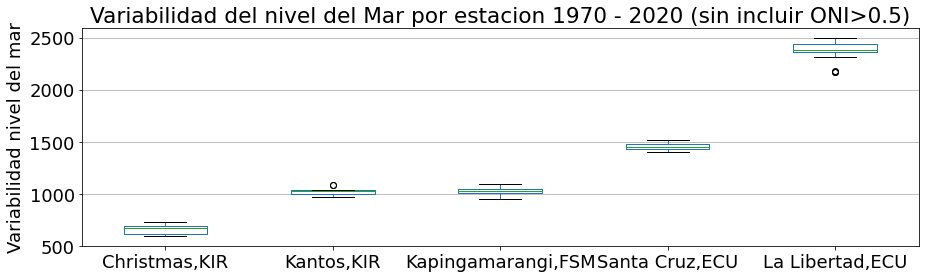

In [462]:
# data = df_anio_p.astype(np.float)

# fig1, ax1 = plt.subplots()
# ax1.set_title('Basic Plot')
# ax1.boxplot(data)

# plt.show()


plt.rc('font', size=18) 
plt.figure(figsize=(15, 4))

df_p_all_no_ninio.boxplot(grid=False)

plt.title('Variabilidad del nivel del Mar por estacion 1970 - 2020 (sin incluir ONI>0.5)')

# plt.xticks()



# plt.xlabel('Estaciones')
plt.ylabel('Variabilidad nivel del mar')
plt.grid(axis = 'y')

plt.show()

### Overview

In [18]:
df_anio_p = df_p.set_index('Year')


# df_ONI.set_index('anio', inplace=True)
df_anio_p.head()

d011         d013         d029         d030         d091
Year                                                                
1985  693.638356  1039.522152  1023.859155  1402.147945  2372.041096
1986  741.400000  1025.328767  1009.590028  1453.970588  2423.232877
1987  724.084932   968.882192   872.174157  1514.115068  2484.435616
1988  536.887978   895.857923   959.311475  1375.232240  2380.412568
1989  654.123288  1009.539726  1036.232877  1424.126027  2419.249315

In [16]:
len(df_anio_p)

29

In [17]:
df_anio_p.idxmax()

d011    2016
d013    2015
d029    2018
d030    1997
d091    2015
dtype: int64

In [25]:
df_anio_p.idxmin()

d011    1988
d013    1988
d029    1998
d030    1988
d091    1996
dtype: int64

In [26]:
df_anio_p.loc[2016]

d011     873.250000
d013    1069.434426
d029    1004.505464
d030    1511.516393
d091    2482.250000
Name: 2016, dtype: float64

In [18]:
df_anio_p.idxmax(axis=1)

Year
1985    d091
1986    d091
1987    d091
1988    d091
1989    d091
1990    d091
1991    d091
1992    d091
1993    d091
1994    d091
1995    d091
1996    d091
1997    d091
1998    d091
1999    d091
2000    d091
2001    d091
2004    d091
2005    d091
2006    d091
2007    d091
2008    d091
2009    d091
2015    d091
2016    d091
2017    d091
2018    d091
2019    d091
2020    d091
dtype: object

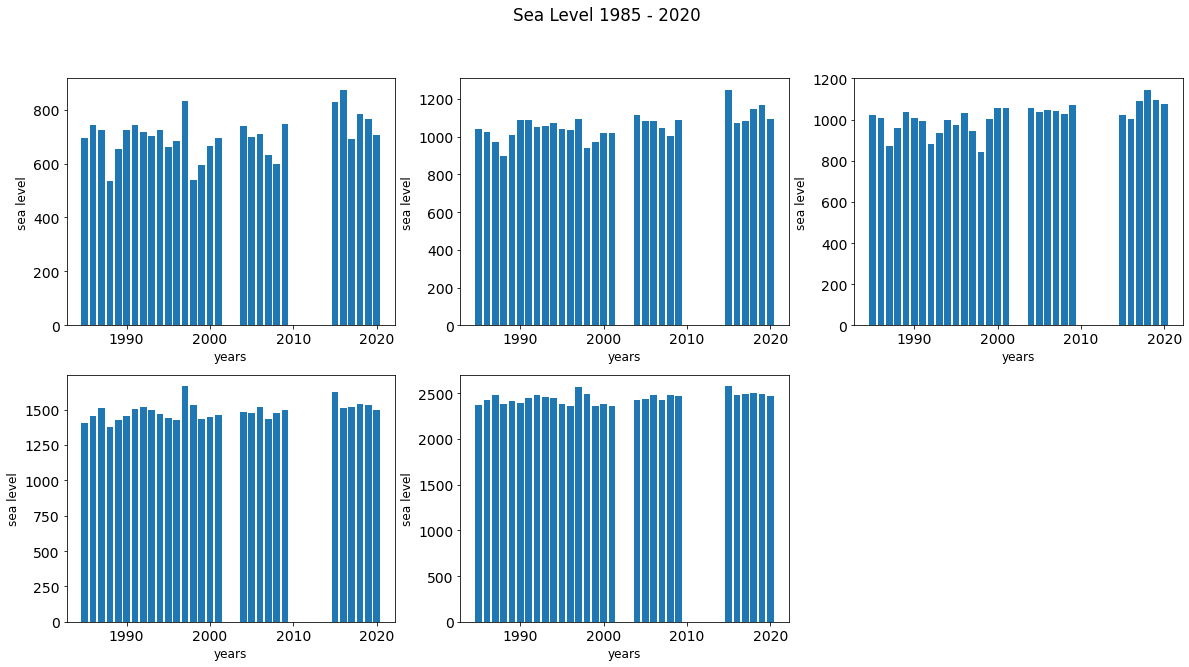

In [32]:
# Vista de nivel de mar anual por estacion

plt.figure(figsize=(20, 10))
plt.rcParams['font.size']='14'

plt.subplot(231)

plt.bar(df_p['Year'].values,df_p['d011'].values)
plt.xlabel('years', fontsize=12)
plt.ylabel('sea level', fontsize=12)


plt.subplot(232)

plt.bar(df_p['Year'].values,df_p['d013'].values)
plt.xlabel('years', fontsize=12)
plt.ylabel('sea level', fontsize=12)

plt.subplot(233)

plt.bar(df_p['Year'].values,df_p['d029'].values)
plt.xlabel('years', fontsize=12)
plt.ylabel('sea level', fontsize=12)

plt.subplot(234)

plt.bar(df_p['Year'].values,df_p['d030'].values)
plt.xlabel('years', fontsize=12)
plt.ylabel('sea level', fontsize=12)

plt.subplot(235)

plt.bar(df_p['Year'].values,df_p['d091'].values)
plt.xlabel('years', fontsize=12)
plt.ylabel('sea level', fontsize=12)

plt.suptitle('Sea Level 1985 - 2020')
plt.show()

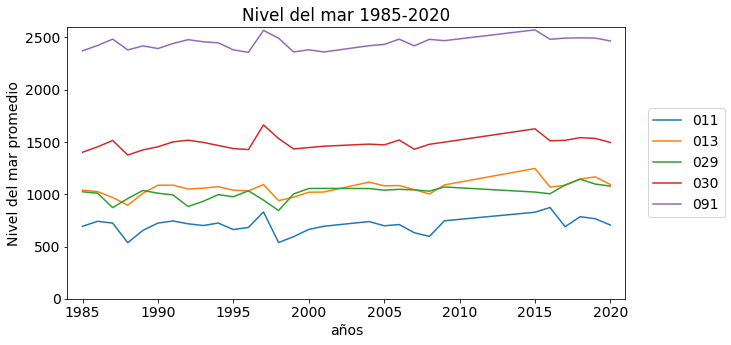

In [49]:
plt.figure(figsize=(10, 5))
plt.plot(df_p['Year'].values,df_p['d011'],label='011')
plt.plot(df_p['Year'].values,df_p['d013'], label='013')
plt.plot(df_p['Year'].values,df_p['d029'],label='029')
plt.plot(df_p['Year'].values,df_p['d030'],label='030')
plt.plot(df_p['Year'].values,df_p['d091'],label='091')

plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

plt.ylabel('Nivel del mar promedio')
plt.xlabel('años')

plt.axis([1984, 2021,0,2600])

plt.title('Nivel del mar 1985-2020')
plt.show()

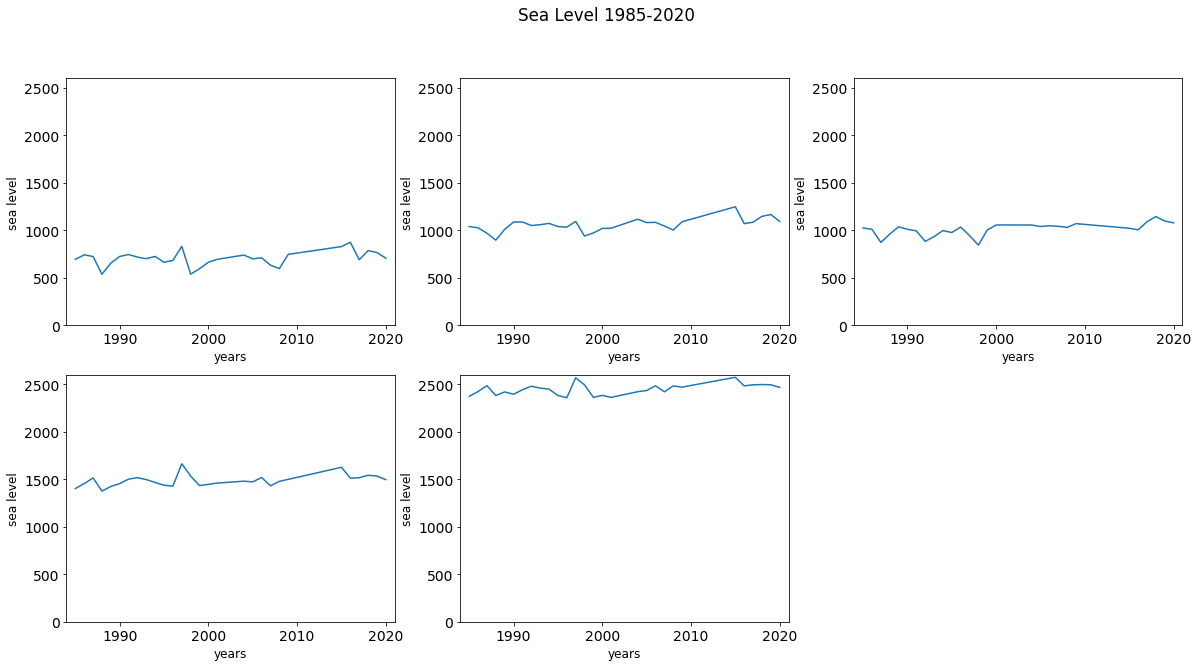

In [187]:
plt.figure(figsize=(20, 10))
plt.rcParams['font.size']='14'

plt.subplot(231)
plt.plot(df_p['Year'].values, df_p['d011'], label='011')
plt.axis([1984, 2021,0,2600])
plt.xlabel('years', fontsize=12)
plt.ylabel('sea level', fontsize=12)

plt.subplot(232)
plt.plot(df_p['Year'].values, df_p['d013'], label='013')
plt.axis([1984, 2021,0,2600])
plt.xlabel('years', fontsize=12)
plt.ylabel('sea level', fontsize=12)


plt.subplot(233)
plt.plot(df_p['Year'].values, df_p['d029'], label='029')
plt.axis([1984, 2021,0,2600])
plt.xlabel('years', fontsize=12)
plt.ylabel('sea level', fontsize=12)
# 
plt.subplot(234)
plt.plot(df_p['Year'].values, df_p['d030'], label='030')
plt.axis([1984, 2021,0,2600])
plt.xlabel('years', fontsize=12)
plt.ylabel('sea level', fontsize=12)

plt.subplot(235)
plt.plot(df_p['Year'].values, df_p['d091'], label='091')
plt.axis([1984, 2021,0,2600])
plt.xlabel('years', fontsize=12)
plt.ylabel('sea level', fontsize=12)

#label the figure
plt.suptitle('Sea Level 1985-2020')
plt.show()

In [145]:
# df_70_84

# Dataframe 1970 - 1985

df_a=df_70_84
df_a = df_a[['Year','d011','d013', 'd029', 'd030', 'd091']].groupby('Year').mean()
df_a.reset_index(inplace=True)

# df_a['d011'] = df_a['d011'].fillna(0)
# df_a['d013'] = df_a['d013'].fillna(0)
# df_a['d029'] = df_a['d029'].fillna(0)
# df_a['d030'] = df_a['d030'].fillna(0)
# df_a['d091'] = df_a['d091'].fillna(0)

df_a['Year'] = df_a['Year'].astype(int)

df_a

Year        d011         d013         d029         d030         d091
0   1970         NaN          NaN          NaN          NaN  2154.921283
1   1971         NaN          NaN          NaN          NaN  2171.073248
2   1972         NaN  1122.500000          NaN          NaN  2300.151335
3   1973         NaN   966.728045          NaN          NaN  2158.841096
4   1974  611.812883  1021.580822          NaN          NaN  2181.734072
5   1975  601.997199   999.323120          NaN          NaN  2165.216438
6   1976  718.896440  1074.276712          NaN          NaN  2267.166667
7   1977  672.189041  1062.955432          NaN          NaN  2201.897351
8   1978  696.056180  1043.383754  1048.350877  1434.410959  2218.233146
9   1979  691.850187  1048.071633   974.951070  1460.534247  2256.416438
10  1980  737.459384  1075.760000   968.369318  1440.160656  2268.122951
11  1981  691.181009   997.666667   985.393293  1420.317829  2317.950685
12  1982  812.351429  1079.673469   974.418182  1550.169863  2407.589041
13  1983  578.915068   929.221053   855.042194  1580.887671  2486.293151
14  1984  605.770492   977.603825   953.704918  1421.417910  2384.603825

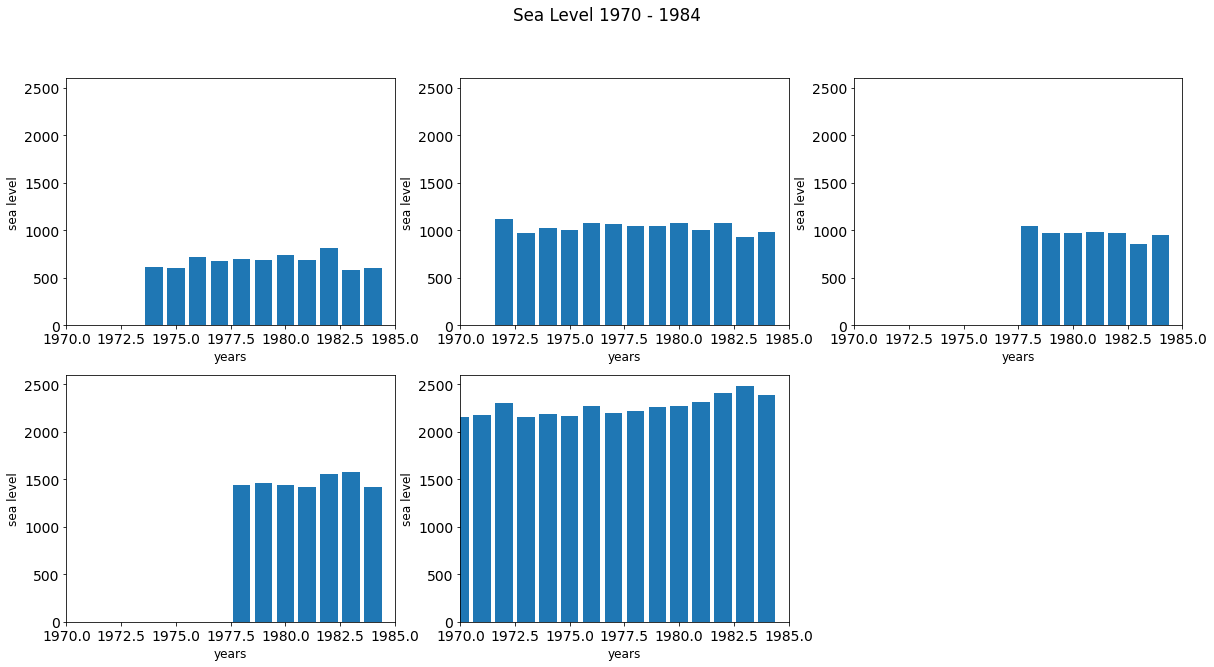

In [39]:
# Vista de nivel de mar anual por estacion

plt.figure(figsize=(20, 10))

plt.subplot(231)
plt.bar(df_a['Year'],df_a['d011'].values)
plt.xlabel('years', fontsize=12)
plt.ylabel('sea level', fontsize=12)
plt.axis([1970, 1985,0,2600])

plt.subplot(232)
plt.bar(df_a['Year'],df_a['d013'].values)
plt.xlabel('years', fontsize=12)
plt.ylabel('sea level', fontsize=12)
plt.axis([1970, 1985,0,2600])

plt.subplot(233)
plt.bar(df_a['Year'],df_a['d029'].values)
plt.xlabel('years', fontsize=12)
plt.ylabel('sea level', fontsize=12)
plt.axis([1970, 1985,0,2600])

plt.subplot(234)
plt.bar(df_a['Year'],df_a['d030'].values)
plt.xlabel('years', fontsize=12)
plt.ylabel('sea level', fontsize=12)
plt.axis([1970, 1985,0,2600])

plt.subplot(235)
plt.bar(df_a['Year'],df_a['d091'].values)
plt.xlabel('years', fontsize=12)
plt.ylabel('sea level', fontsize=12)
plt.axis([1970, 1985,0,2600])

plt.suptitle('Sea Level 1970 - 1984')
plt.show()

In [40]:
df_a['Year'].describe()

count      15.000000
mean     1977.000000
std         4.472136
min      1970.000000
25%      1973.500000
50%      1977.000000
75%      1980.500000
max      1984.000000
Name: Year, dtype: float64

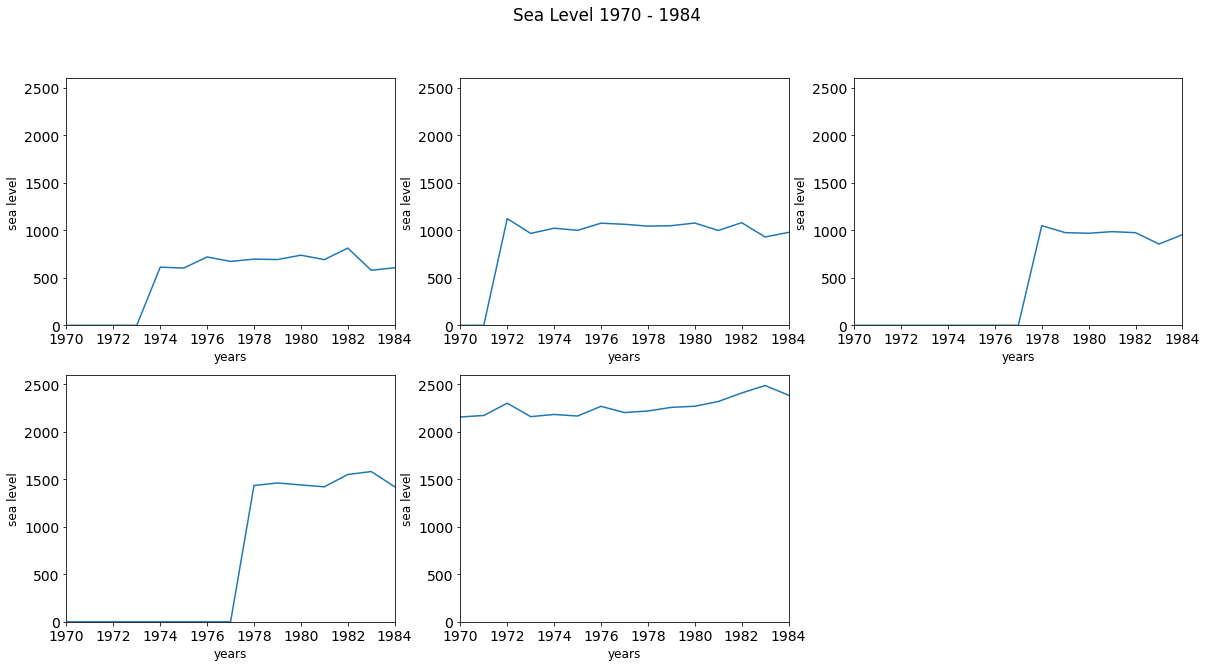

In [41]:
plt.figure(figsize=(20, 10))

plt.subplot(231)
plt.plot(df_a['Year'], df_a['d011'], label='011')
plt.axis([1970, 1984,0,2600])
plt.xlabel('years', fontsize=12)
plt.ylabel('sea level', fontsize=12)


plt.subplot(232)
plt.plot(df_a['Year'], df_a['d013'], label='013')
plt.axis([1970, 1984,0,2600])
plt.xlabel('years', fontsize=12)
plt.ylabel('sea level', fontsize=12)


plt.subplot(233)
plt.plot(df_a['Year'], df_a['d029'], label='029')
plt.axis([1970, 1984,0,2600])
plt.xlabel('years', fontsize=12)
plt.ylabel('sea level', fontsize=12)

plt.subplot(234)
plt.plot(df_a['Year'], df_a['d030'], label='030')
plt.axis([1970, 1984,0,2600])
plt.xlabel('years', fontsize=12)
plt.ylabel('sea level', fontsize=12)

plt.subplot(235)
plt.plot(df_a['Year'], df_a['d091'], label='091')
plt.axis([1970, 1984,0,2600])
plt.xlabel('years', fontsize=12)
plt.ylabel('sea level', fontsize=12)

#label the figure
plt.suptitle('Sea Level 1970 - 1984')
plt.show()

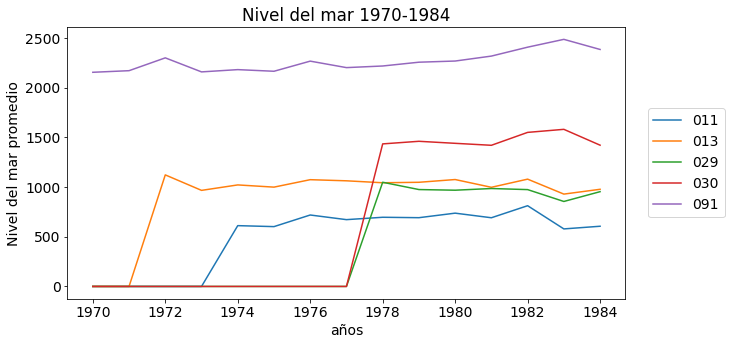

In [44]:
plt.figure(figsize=(10, 5))
plt.plot(df_a['Year'].values,df_a['d011'],label='011')
plt.plot(df_a['Year'].values,df_a['d013'], label='013')
plt.plot(df_a['Year'].values,df_a['d029'],label='029')
plt.plot(df_a['Year'].values,df_a['d030'],label='030')
plt.plot(df_a['Year'].values,df_a['d091'],label='091')

plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

plt.ylabel('Nivel del mar promedio')
plt.xlabel('años')

plt.title('Nivel del mar 1970-1984')
plt.show()

In [195]:
df_a['Year'].describe()

count      15.000000
mean     1977.000000
std         4.472136
min      1970.000000
25%      1973.500000
50%      1977.000000
75%      1980.500000
max      1984.000000
Name: Year, dtype: float64

In [379]:
# Nivel del mar del año 2015

# df_2015 = df_85_20.loc[df_85_20['Year'] == 2015]
# df_2015 = df_2015[['Month','d011','d013', 'd029', 'd030', 'd091']].groupby('Month').mean()
# df_2015.reset_index(inplace=True)

df_2015_monthly = df_lvl_15
df_1997_monthly = df_lvl_97


df_2015_monthly['month'] = df_2015_monthly['time'].dt.month
df_1997_monthly['month'] = df_1997_monthly['time'].dt.month


stations = ['Christmas,KIR','Kantos,KIR','Kapingamarangi,FSM','Santa Cruz,ECU','La Libertad,ECU']

df_2015_monthly = df_2015_monthly[['month','Christmas,KIR','Kantos,KIR','Kapingamarangi,FSM','Santa Cruz,ECU','La Libertad,ECU' ]].groupby('month').mean()

df_1997_monthly = df_1997_monthly[['month','Christmas,KIR','Kantos,KIR','Kapingamarangi,FSM','Santa Cruz,ECU','La Libertad,ECU' ]].groupby('month').mean()


# Se ha reemplazado estos valores por el promedio anual

# stations = ['Christmas,KIR','Kantos,KIR','Kapingamarangi,FSM','Santa Cruz,ECU','La Libertad,ECU']

# df_70_84["year"] = df_70_84['time'].dt.year
# df_85_99['year'] = df_85_99['time'].dt.year
# df_00_20['year'] = df_00_20['time'].dt.year


#Periodo 1

df_1997_monthly

Christmas,KIR   Kantos,KIR  Kapingamarangi,FSM  Santa Cruz,ECU  \
month                                                                   
1         758.161290  1137.129032         1068.903226     1414.419355   
2         709.107143  1106.678571         1123.785714     1551.392857   
3         751.258065  1168.000000         1164.290323     1585.612903   
4         788.400000  1099.333333         1051.600000     1593.433333   
5         778.806452  1082.806452          960.709677     1734.838710   
6         853.966667  1024.666667          912.666667     1702.100000   
7         794.677419  1019.935484          953.774194     1728.129032   
8         909.741935  1102.451613          916.806452     1599.000000   
9         954.233333  1176.166667          820.933333     1614.633333   
10        978.258065  1147.032258          825.838710     1756.965517   
11        877.866667  1052.266667          756.333333     1817.275862   
12        807.548387   997.129032          783.483871     1864.258065   

       La Libertad,ECU  
month                   
1          2355.193548  
2          2458.821429  
3          2478.419355  
4          2469.166667  
5          2642.129032  
6          2605.600000  
7          2619.709677  
8          2497.290323  
9          2507.733333  
10         2659.483871  
11         2733.500000  
12         2773.774194

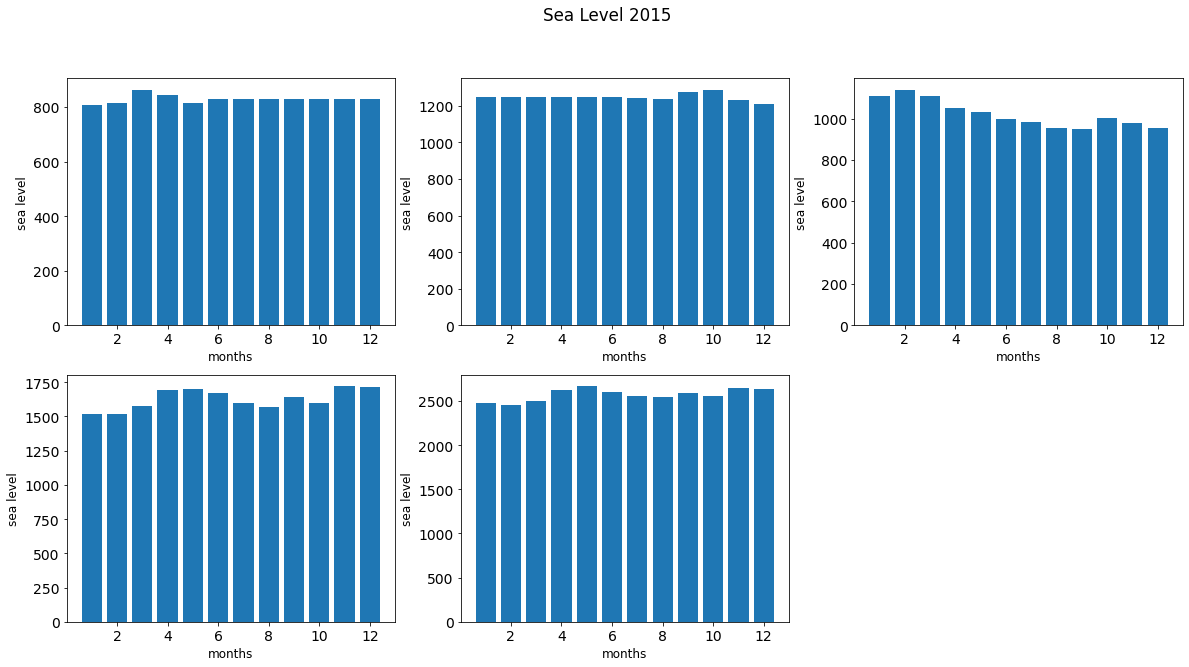

In [209]:
# Sea Level en el 2015
plt.figure(figsize=(20, 10))

plt.subplot(231)
plt.bar(df_2015['Month'].values,df_2015['d011'].values)
plt.xlabel('months', fontsize=12)
plt.ylabel('sea level', fontsize=12)

plt.subplot(232)
plt.bar(df_2015['Month'].values,df_2015['d013'].values)
plt.xlabel('months', fontsize=12)
plt.ylabel('sea level', fontsize=12)

plt.subplot(233)
plt.bar(df_2015['Month'].values,df_2015['d029'].values)
plt.xlabel('months', fontsize=12)
plt.ylabel('sea level', fontsize=12)

plt.subplot(234)
plt.bar(df_2015['Month'].values,df_2015['d030'].values)
plt.xlabel('months', fontsize=12)
plt.ylabel('sea level', fontsize=12)

plt.subplot(235)
plt.bar(df_2015['Month'].values,df_2015['d091'].values)
plt.xlabel('months', fontsize=12)
plt.ylabel('sea level', fontsize=12)

plt.suptitle('Sea Level 2015')
plt.show()

In [316]:
df_85_99

time  Christmas,KIR  Kantos,KIR  Kapingamarangi,FSM  \
0    1985-01-01          628.0      1061.0              1048.0   
1    1985-01-02          640.0      1056.0              1094.0   
2    1985-01-03          622.0      1046.0              1099.0   
3    1985-01-04          611.0      1035.0              1068.0   
4    1985-01-05          623.0      1021.0              1077.0   
...         ...            ...         ...                 ...   
5473 1999-12-27          614.0      1047.0              1031.0   
5474 1999-12-28          593.0      1041.0              1037.0   
5475 1999-12-29          601.0      1044.0              1057.0   
5476 1999-12-30          623.0      1081.0              1053.0   
5477 1999-12-31          586.0      1079.0              1072.0   

      Santa Cruz,ECU  La Libertad,ECU  
0             1431.0           2340.0  
1             1438.0           2331.0  
2             1415.0           2299.0  
3             1413.0           2299.0  
4             1406.0           2279.0  
...              ...              ...  
5473          1406.0           2347.0  
5474          1434.0           2366.0  
5475          1410.0           2337.0  
5476          1415.0           2294.0  
5477          1408.0           2263.0  

[5478 rows x 6 columns]

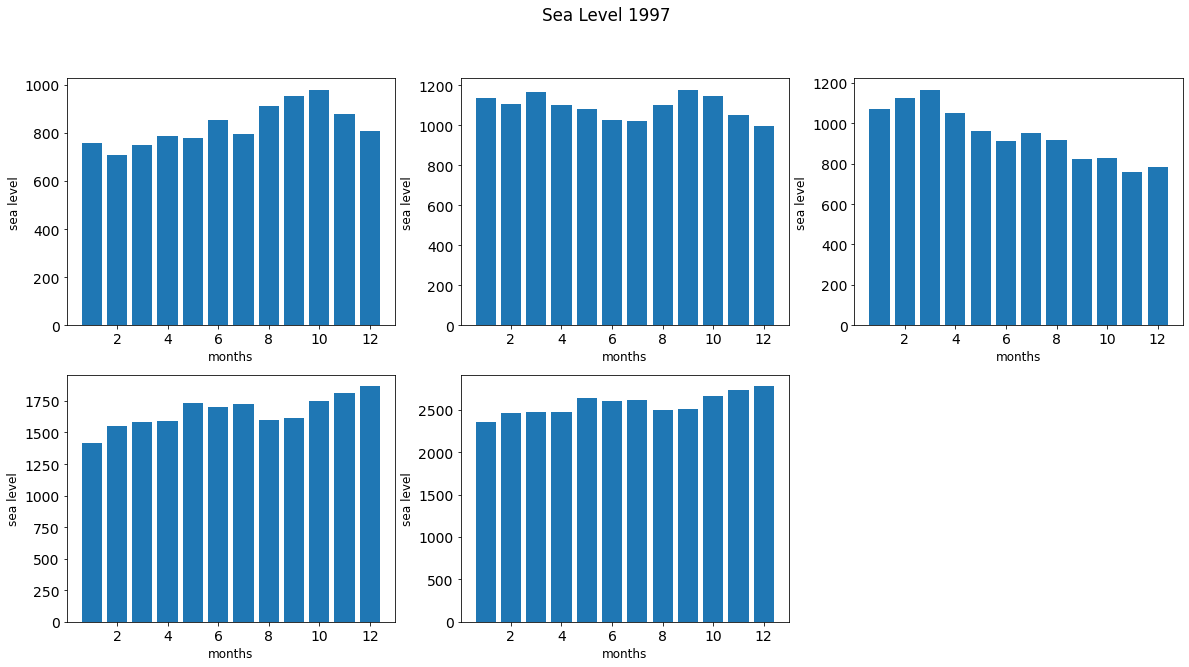

In [211]:
# Sea Level en el 2015
plt.figure(figsize=(20, 10))

plt.subplot(231)
plt.bar(df_1997['Month'].values,df_1997['d011'].values)
plt.xlabel('months', fontsize=12)
plt.ylabel('sea level', fontsize=12)

plt.subplot(232)
plt.bar(df_1997['Month'].values,df_1997['d013'].values)
plt.xlabel('months', fontsize=12)
plt.ylabel('sea level', fontsize=12)

plt.subplot(233)
plt.bar(df_1997['Month'].values,df_1997['d029'].values)
plt.xlabel('months', fontsize=12)
plt.ylabel('sea level', fontsize=12)

plt.subplot(234)
plt.bar(df_1997['Month'].values,df_1997['d030'].values)
plt.xlabel('months', fontsize=12)
plt.ylabel('sea level', fontsize=12)

plt.subplot(235)
plt.bar(df_1997['Month'].values,df_1997['d091'].values)
plt.xlabel('months', fontsize=12)
plt.ylabel('sea level', fontsize=12)

plt.suptitle('Sea Level 1997')
plt.show()

## Relacion entre temperatura y nivel del mar

In [324]:
# Promedio mensual de variabilidad del nivel del mar del año 1997

df_lvl_97

df_lvl_97


time  Christmas,KIR  Kantos,KIR  Kapingamarangi,FSM  Santa Cruz,ECU  \
0   1997-01-01          676.0      1104.0              1176.0          1420.0   
1   1997-01-02          705.0      1092.0              1131.0          1423.0   
2   1997-01-03          710.0      1136.0              1115.0          1398.0   
3   1997-01-04          706.0      1160.0              1136.0          1395.0   
4   1997-01-05          743.0      1139.0              1106.0          1419.0   
..         ...            ...         ...                 ...             ...   
360 1997-12-27          777.0      1042.0               775.0          1845.0   
361 1997-12-28          759.0      1058.0               804.0          1834.0   
362 1997-12-29          730.0      1034.0               828.0          1826.0   
363 1997-12-30          720.0      1015.0               815.0          1807.0   
364 1997-12-31          739.0      1021.0               800.0          1796.0   

     La Libertad,ECU  
0             2398.0  
1             2377.0  
2             2388.0  
3             2406.0  
4             2402.0  
..               ...  
360           2699.0  
361           2727.0  
362           2724.0  
363           2688.0  
364           2673.0  

[365 rows x 6 columns]

In [322]:
df_lvl_15

time  Christmas,KIR  Kantos,KIR  Kapingamarangi,FSM  Santa Cruz,ECU  \
0   2015-01-01          825.0         NaN              1108.0          1591.0   
1   2015-01-02          807.0         NaN              1114.0          1571.0   
2   2015-01-03          798.0         NaN              1123.0          1562.0   
3   2015-01-04          805.0         NaN              1147.0          1565.0   
4   2015-01-05          832.0         NaN              1199.0          1557.0   
..         ...            ...         ...                 ...             ...   
360 2015-12-27            NaN      1163.0               941.0          1708.0   
361 2015-12-28            NaN      1196.0               927.0          1698.0   
362 2015-12-29            NaN      1265.0               912.0          1682.0   
363 2015-12-30            NaN      1360.0               912.0          1657.0   
364 2015-12-31            NaN      1313.0               909.0          1684.0   

     La Libertad,ECU  
0             2577.0  
1             2566.0  
2             2556.0  
3             2524.0  
4             2530.0  
..               ...  
360           2621.0  
361           2600.0  
362           2576.0  
363           2565.0  
364           2574.0  

[365 rows x 6 columns]

In [300]:
# Promedio de temperatura


df_sst_2015_per_day = df_sst_2015[['time','sst']].groupby('time').mean()
df_sst_2015_per_day

sst
time                                
2015-01-16 12:00:00+00:00  27.604307
2015-02-16 12:00:00+00:00  27.828997
2015-03-16 12:00:00+00:00  28.191294
2015-04-16 12:00:00+00:00  28.820366
2015-05-16 12:00:00+00:00  28.879018
2015-06-16 12:00:00+00:00  28.856604
2015-07-16 12:00:00+00:00  28.534992
2015-08-16 12:00:00+00:00  28.255817
2015-09-16 12:00:00+00:00  28.397283
2015-10-16 12:00:00+00:00  28.502936
2015-11-16 12:00:00+00:00  28.785452
2015-12-16 12:00:00+00:00  28.771681
2016-01-16 12:00:00+00:00  28.816066

In [295]:
# Temperatura de 2015

df_sst_011 = df_sst_2015.loc[ (df_sst_2015['latitude'] == 1.5 ) & ( df_sst_2015['longitude'] == -157.5 ) ]
df_sst_013 = df_sst_2015.loc[ (df_sst_2015['latitude'] == -2.5 ) & ( df_sst_2015['longitude'] == -171.5 ) ]
df_sst_029 = df_sst_2015.loc[ (df_sst_2015['latitude'] == 1.5 ) & ( df_sst_2015['longitude'] == -154.5 ) ]
df_sst_030 = df_sst_2015.loc[ (df_sst_2015['latitude'] == -0.5 ) & ( df_sst_2015['longitude'] == -90.5 ) ]
df_sst_091 = df_sst_2015.loc[ (df_sst_2015['latitude'] == -2.5 ) & ( df_sst_2015['longitude'] == -80.5 ) ]

# Baltra
# df_sst_003 = df_sst_2015.loc[ (df_sst_2015['latitude'] == -0.5 ) & ( df_sst_2015['longitude'] == -90.5 ) ]


df_sst_011.reset_index(inplace=True, drop=True)
df_sst_011 = df_sst_011.drop([12]) #Ultima fila corresponde a enero del siguiente año

df_sst_013.reset_index(inplace=True, drop=True)
df_sst_013 = df_sst_013.drop([12])

df_sst_029.reset_index(inplace=True, drop=True)
df_sst_029 = df_sst_029.drop([12])

df_sst_030.reset_index(inplace=True, drop=True)
df_sst_030 = df_sst_030.drop([12])

df_sst_091.reset_index(inplace=True, drop=True)
df_sst_091 = df_sst_091.drop([12])


In [349]:
df_sst_2015


time  latitude  longitude        sst
0     2015-01-16 12:00:00+00:00       5.5      140.5  28.839882
1     2015-01-16 12:00:00+00:00       5.5      141.5  28.925926
2     2015-01-16 12:00:00+00:00       5.5      142.5  28.997150
3     2015-01-16 12:00:00+00:00       5.5      143.5  29.015670
4     2015-01-16 12:00:00+00:00       5.5      144.5  28.976440
...                         ...       ...        ...        ...
20067 2016-01-16 12:00:00+00:00      -4.5      -85.5  26.835735
20068 2016-01-16 12:00:00+00:00      -4.5      -84.5  26.561320
20069 2016-01-16 12:00:00+00:00      -4.5      -83.5  26.238153
20070 2016-01-16 12:00:00+00:00      -4.5      -82.5  25.660004
20071 2016-01-16 12:00:00+00:00      -4.5      -81.5  25.232244

[20072 rows x 4 columns]

In [296]:
df_sst_091


time  latitude  longitude        sst
0  2015-01-16 12:00:00+00:00      -2.5      -80.5  24.455790
1  2015-02-16 12:00:00+00:00      -2.5      -80.5  24.594055
2  2015-03-16 12:00:00+00:00      -2.5      -80.5  25.450155
3  2015-04-16 12:00:00+00:00      -2.5      -80.5  25.281470
4  2015-05-16 12:00:00+00:00      -2.5      -80.5  26.030365
5  2015-06-16 12:00:00+00:00      -2.5      -80.5  24.727120
6  2015-07-16 12:00:00+00:00      -2.5      -80.5  24.969143
7  2015-08-16 12:00:00+00:00      -2.5      -80.5  23.616226
8  2015-09-16 12:00:00+00:00      -2.5      -80.5  24.494907
9  2015-10-16 12:00:00+00:00      -2.5      -80.5  24.545530
10 2015-11-16 12:00:00+00:00      -2.5      -80.5  24.932764
11 2015-12-16 12:00:00+00:00      -2.5      -80.5  25.822063

In [297]:
df_sst_011

time  latitude  longitude        sst
0  2015-01-16 12:00:00+00:00       1.5     -157.5  27.275763
1  2015-02-16 12:00:00+00:00       1.5     -157.5  27.460655
2  2015-03-16 12:00:00+00:00       1.5     -157.5  27.993480
3  2015-04-16 12:00:00+00:00       1.5     -157.5  28.795780
4  2015-05-16 12:00:00+00:00       1.5     -157.5  29.101028
5  2015-06-16 12:00:00+00:00       1.5     -157.5  29.656845
6  2015-07-16 12:00:00+00:00       1.5     -157.5  29.741722
7  2015-08-16 12:00:00+00:00       1.5     -157.5  29.923065
8  2015-09-16 12:00:00+00:00       1.5     -157.5  29.659832
9  2015-10-16 12:00:00+00:00       1.5     -157.5  29.828074
10 2015-11-16 12:00:00+00:00       1.5     -157.5  29.909000
11 2015-12-16 12:00:00+00:00       1.5     -157.5  30.000692

In [397]:
# sst de todas las estaciones merge
df_sst_all = df_sst_011.drop(['latitude','longitude'], axis=1)
df_sst_all.rename(columns={'sst':'Christmas,KIR'}, inplace=True)

df_sst_all = df_sst_all.merge(df_sst_013.drop(['latitude','longitude'], axis=1), how='left', on='time')
df_sst_all.rename(columns={'sst':'Kantos,KIR'}, inplace=True)

df_sst_all = df_sst_all.merge(df_sst_029.drop(['latitude','longitude'], axis=1), how='left', on='time')
df_sst_all.rename(columns={'sst':'Kapingamarangi,FSM'}, inplace=True)

df_sst_all = df_sst_all.merge(df_sst_030.drop(['latitude','longitude'], axis=1), how='left', on='time')
df_sst_all.rename(columns={'sst':'Santa Cruz,ECU'}, inplace=True)

df_sst_all = df_sst_all.merge(df_sst_091.drop(['latitude','longitude'], axis=1), how='left', on='time')
df_sst_all.rename(columns={'sst':'La Libertad,ECU'}, inplace=True)

#  'd030':'Santa Cruz,ECU', 'd091':'La Libertad,ECU'}, inplace=True )
df_sst_all

time  Christmas,KIR  Kantos,KIR  Kapingamarangi,FSM  \
0  2015-01-16 12:00:00+00:00      27.275763   28.958126           27.245304   
1  2015-02-16 12:00:00+00:00      27.460655   29.172977           27.400974   
2  2015-03-16 12:00:00+00:00      27.993480   29.374031           27.914528   
3  2015-04-16 12:00:00+00:00      28.795780   29.771212           28.637558   
4  2015-05-16 12:00:00+00:00      29.101028   30.331665           29.038520   
5  2015-06-16 12:00:00+00:00      29.656845   30.096466           29.484838   
6  2015-07-16 12:00:00+00:00      29.741722   30.083675           29.305770   
7  2015-08-16 12:00:00+00:00      29.923065   30.136295           29.465961   
8  2015-09-16 12:00:00+00:00      29.659832   30.110773           29.518032   
9  2015-10-16 12:00:00+00:00      29.828074   30.170546           29.618881   
10 2015-11-16 12:00:00+00:00      29.909000   30.674906           29.889944   
11 2015-12-16 12:00:00+00:00      30.000692   30.224958           29.725533   

    Santa Cruz,ECU  La Libertad,ECU  
0        25.032600        24.455790  
1        25.987606        24.594055  
2        26.335114        25.450155  
3        26.894300        25.281470  
4        25.998580        26.030365  
5        26.177563        24.727120  
6        25.367010        24.969143  
7        24.421078        23.616226  
8        24.870756        24.494907  
9        25.302690        24.545530  
10       25.849160        24.932764  
11       26.583670        25.822063

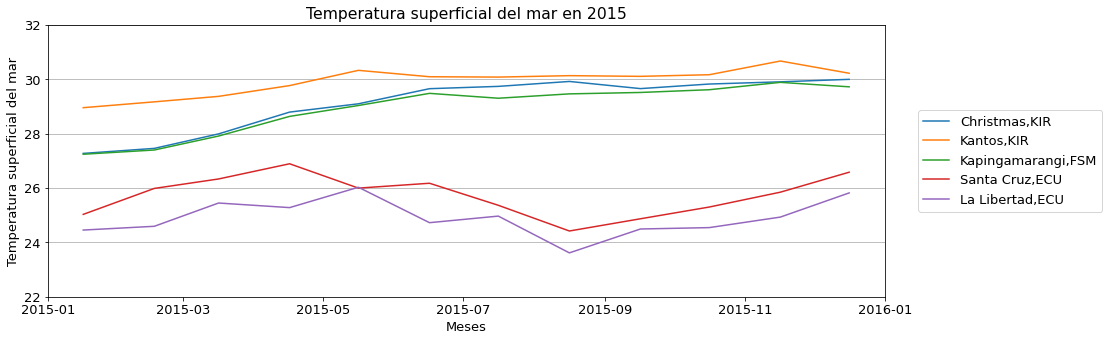

In [402]:
plt.figure(figsize=(15, 5))
plt.plot(df_sst_all['time'].values,df_sst_all['Christmas,KIR'], label='Christmas,KIR')
plt.plot(df_sst_all['time'].values,df_sst_all['Kantos,KIR'], label='Kantos,KIR')
plt.plot(df_sst_all['time'].values,df_sst_all['Kapingamarangi,FSM'], label='Kapingamarangi,FSM')
plt.plot(df_sst_all['time'].values,df_sst_all['Santa Cruz,ECU'], label='Santa Cruz,ECU')
plt.plot(df_sst_all['time'].values,df_sst_all['La Libertad,ECU'] , label='La Libertad,ECU')

plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

plt.ylabel('Temperatura superficial del mar')
plt.xlabel('Meses')
plt.grid(axis = 'y')

plt.axis(['2015-01', '2016-01',22,32])


plt.title('Temperatura superficial del mar en 2015')
plt.show()

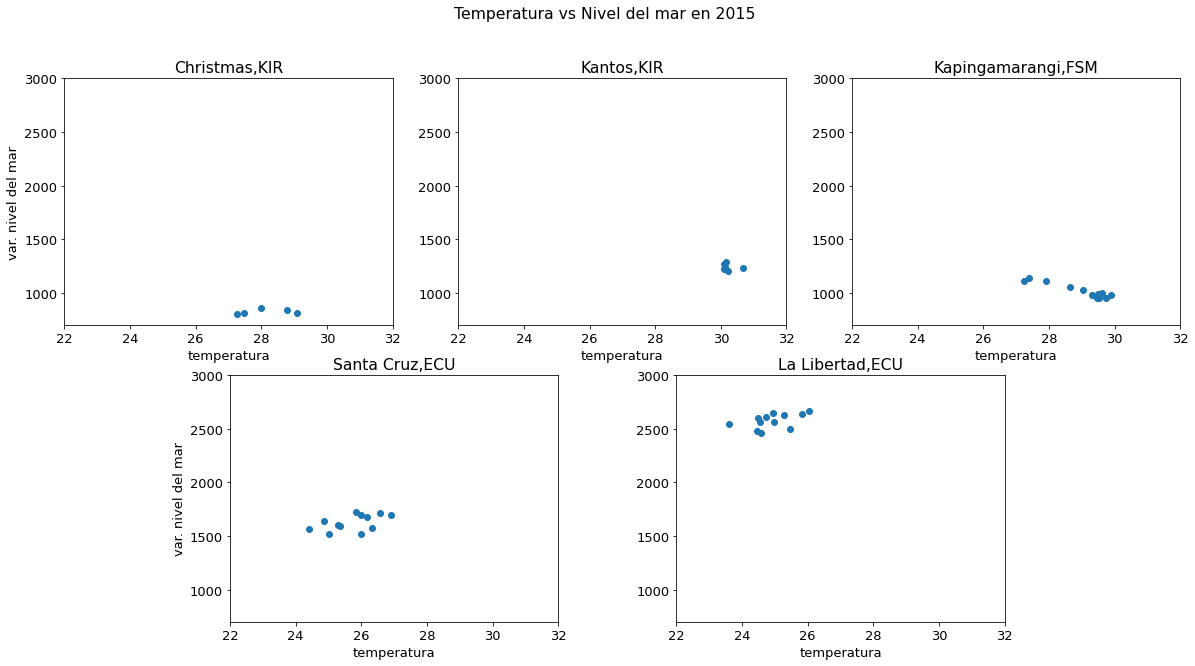

In [395]:
figs,axs = plt.subplots(2,3, figsize=(20, 10))

# plt.figure(figsize=(20, 10))

# plt.subplot(231)
axs[0, 0].scatter(df_sst_011['sst'], df_2015_monthly['Christmas,KIR'])
# plt.axis([1970, 1984,0,2600])
# axs[0, 0].set(ylabel='nivel del mar',)

axs[0, 0].set(xlabel='temperatura' ,ylabel='var. nivel del mar')
axs[0,0].axis([22,32,700,3000])

axs[0, 0].set_title('Christmas,KIR')

# plt.subplot(232)
axs[0, 1].scatter(df_sst_013['sst'], df_2015_monthly['Kantos,KIR'])
# plt.axis([1970, 1984,0,2600])
axs[0, 1].set(xlabel='temperatura' )

axs[0,1].axis([22,32,700,3000])

axs[0, 1].set_title('Kantos,KIR')


# plt.subplot(233)
axs[0, 2].scatter(df_sst_029['sst'], df_2015_monthly['Kapingamarangi,FSM'])
# plt.axis([1970, 1984,0,2600])
axs[0, 2].set(xlabel='temperatura')
axs[0,2].axis([22,32,700,3000])

axs[0, 2].set_title('Kapingamarangi,FSM')

# plt.subplot(234)
axs[1, 0].scatter(df_sst_030['sst'], df_2015_monthly['Santa Cruz,ECU'])
# plt.axis([1970, 1984,0,2600])
axs[1, 0].set(xlabel='temperatura' ,ylabel='var. nivel del mar',)
axs[1, 0].set_position([0.24,0.125,0.228,0.343])
axs[1,0].axis([22,32,700,3000])

axs[1, 0].set_title('Santa Cruz,ECU')

# plt.subplot(235)
axs[1, 1].scatter(df_sst_091['sst'], df_2015_monthly['La Libertad,ECU'])
# plt.axis([1970, 1984,0,2600])
axs[1, 1].set(xlabel='temperatura')
axs[1,1].set_position([0.55,0.125,0.228,0.343])
axs[1,1].axis([22,32,700,3000])

axs[1, 1].set_title('La Libertad,ECU')

axs[1, 2].set_visible(False)

#label the figure
plt.suptitle('Temperatura vs Nivel del mar en 2015')
plt.show()

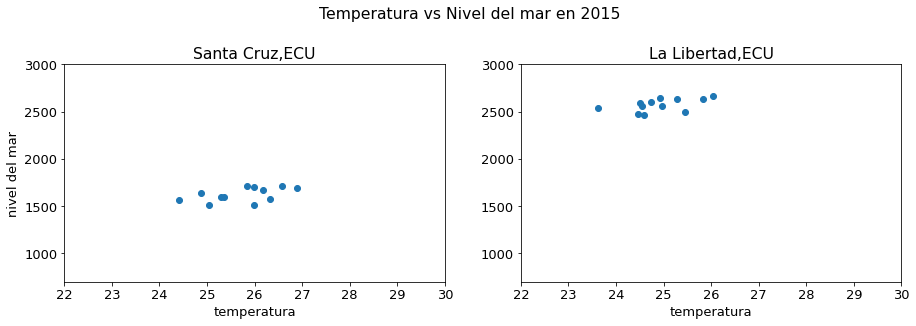

In [386]:
figs,axs = plt.subplots(1,2, figsize=(15, 4))

# plt.figure(figsize=(20, 10))

# plt.subplot(231)
# axs[0, 0].scatter(df_sst_011['sst'], df_2015_monthly['Christmas,KIR'])
# plt.axis([1970, 1984,0,2600])
# axs[0, 0].set(ylabel='nivel del mar',)

# plt.subplot(234)
axs[0].scatter(df_sst_030['sst'], df_2015_monthly['Santa Cruz,ECU'])
axs[0].axis([22,30,700,3000])
# plt.axis([1970, 1984,0,2600])
axs[0].set(xlabel='temperatura' ,ylabel='nivel del mar',)
# axs[0].set_position([0.24,0.125,0.228,0.343])
axs[0].set_title('Santa Cruz,ECU')

# plt.subplot(235)
axs[1].scatter(df_sst_091['sst'], df_2015_monthly['La Libertad,ECU'])
axs[1].axis([22,30,700,3000])
# plt.axis([1970, 1984,0,2600])
axs[1].set(xlabel='temperatura')
# axs[1].set_position([0.55,0.125,0.228,0.343])
axs[1].set_title('La Libertad,ECU')

# axs[1, 2].set_visible(False)

#label the figure
plt.suptitle('Temperatura vs Nivel del mar en 2015', y=1.08)
plt.show()

In [77]:
temperatura_15 = []
dataset_temp_15=[df_sst_011,df_sst_013,df_sst_029,df_sst_030,df_sst_091]

for d in dataset_temp_15:
    d = d['sst'].values
    for v in d:
        temperatura_15.append(v)
  

deep_15 = []
dataset_deep_15=['d011','d013','d029','d030','d091']

for d in dataset_deep_15:
    d = df_2015[d].values
    for v in d:
        deep_15.append(v)

    
# temperatura_15
# deep_15

[805.4516129032259,
 815.7857142857143,
 862.1612903225806,
 841.9,
 814.4548387096773,
 828.0999999999997,
 828.0999999999996,
 828.0999999999996,
 828.0999999999997,
 828.0999999999996,
 828.0999999999997,
 828.0999999999996,
 1247.1111111111102,
 1247.1111111111102,
 1247.1111111111102,
 1247.1111111111102,
 1247.1111111111102,
 1247.1111111111102,
 1240.9175627240138,
 1238.516129032258,
 1273.9,
 1286.7096774193549,
 1234.5333333333333,
 1208.5483870967741,
 1110.483870967742,
 1138.0357142857142,
 1110.3548387096773,
 1052.0,
 1029.967741935484,
 995.7333333333333,
 984.7096774193549,
 952.7741935483871,
 950.4333333333333,
 1004.3548387096774,
 977.6,
 953.5483870967741,
 1516.9032258064517,
 1514.6785714285713,
 1577.3225806451612,
 1692.3,
 1698.774193548387,
 1671.5,
 1594.2903225806451,
 1564.967741935484,
 1643.1666666666667,
 1599.6774193548388,
 1718.2333333333333,
 1716.4516129032259,
 2477.7096774193546,
 2459.3928571428573,
 2499.3548387096776,
 2629.0666666666666,
 26

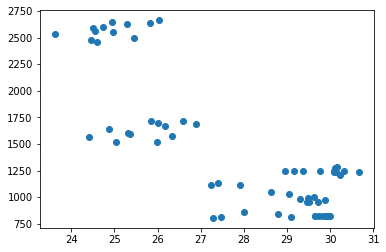

In [78]:
plt.scatter(temperatura_15,deep_15)

In [375]:
# Temperatura de 1997

df_sst_97_011 = df_sst_1997.loc[ (df_sst_1997['latitude'] == 1.5 ) & ( df_sst_1997['longitude'] == -157.5 ) ]
df_sst_97_013 = df_sst_1997.loc[ (df_sst_1997['latitude'] == -2.5 ) & ( df_sst_1997['longitude'] == -171.5 ) ]
df_sst_97_029 = df_sst_1997.loc[ (df_sst_1997['latitude'] == 1.5 ) & ( df_sst_1997['longitude'] == -154.5 ) ]
df_sst_97_030 = df_sst_1997.loc[ (df_sst_1997['latitude'] == -0.5 ) & ( df_sst_1997['longitude'] == -90.5 ) ]
df_sst_97_091 = df_sst_1997.loc[ (df_sst_1997['latitude'] == -2.5 ) & ( df_sst_1997['longitude'] == -80.5 ) ]


df_sst_97_011.reset_index(inplace=True, drop=True)
df_sst_97_011 = df_sst_97_011.drop([12]) #Ultima fila corresponde a enero del siguiente año

df_sst_97_013.reset_index(inplace=True, drop=True)
df_sst_97_013 = df_sst_97_013.drop([12])

df_sst_97_029.reset_index(inplace=True, drop=True)
df_sst_97_029 = df_sst_97_029.drop([12])

df_sst_97_030.reset_index(inplace=True, drop=True)
df_sst_97_030 = df_sst_97_030.drop([12])

df_sst_97_091.reset_index(inplace=True, drop=True)
df_sst_97_091 = df_sst_97_091.drop([12])


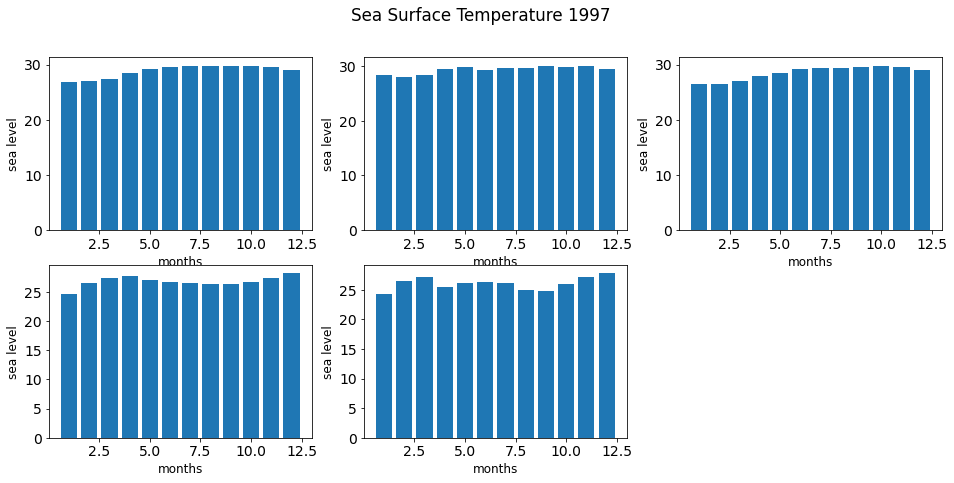

In [225]:

plt.figure(figsize=(16, 7))

plt.subplot(231)
plt.bar(df_sst_97_011['time'].dt.month.values ,df_sst_97_011['sst'])
plt.xlabel('months', fontsize=12)
plt.ylabel('sea level', fontsize=12)


plt.subplot(232)
plt.bar(df_sst_97_013['time'].dt.month.values ,df_sst_97_013['sst'])
plt.xlabel('months', fontsize=12)
plt.ylabel('sea level', fontsize=12)

plt.subplot(233)
plt.bar(df_sst_97_029['time'].dt.month.values ,df_sst_97_029['sst'])
plt.xlabel('months', fontsize=12)
plt.ylabel('sea level', fontsize=12)

plt.subplot(234)
plt.bar(df_sst_97_030['time'].dt.month.values ,df_sst_97_030['sst'])
plt.xlabel('months', fontsize=12)
plt.ylabel('sea level', fontsize=12)

plt.subplot(235)
plt.bar(df_sst_97_091['time'].dt.month.values ,df_sst_97_091['sst'])
plt.xlabel('months', fontsize=12)
plt.ylabel('sea level', fontsize=12)

plt.suptitle('Sea Surface Temperature 1997')
plt.show()


In [403]:
# sst de todas las estaciones merge
df_sst_alld = df_sst_97_011.drop(['latitude','longitude'], axis=1)
df_sst_alld.rename(columns={'sst':'Christmas,KIR'}, inplace=True)

df_sst_alld = df_sst_alld.merge(df_sst_97_013.drop(['latitude','longitude'], axis=1), how='left', on='time')
df_sst_alld.rename(columns={'sst':'Kantos,KIR'}, inplace=True)

df_sst_alld = df_sst_alld.merge(df_sst_97_029.drop(['latitude','longitude'], axis=1), how='left', on='time')
df_sst_alld.rename(columns={'sst':'Kapingamarangi,FSM'}, inplace=True)

df_sst_alld = df_sst_alld.merge(df_sst_97_030.drop(['latitude','longitude'], axis=1), how='left', on='time')
df_sst_alld.rename(columns={'sst':'Santa Cruz,ECU'}, inplace=True)

df_sst_alld = df_sst_alld.merge(df_sst_97_091.drop(['latitude','longitude'], axis=1), how='left', on='time')
df_sst_alld.rename(columns={'sst':'La Libertad,ECU'}, inplace=True)

#  'd030':'Santa Cruz,ECU', 'd091':'La Libertad,ECU'}, inplace=True )
df_sst_alld

time  Christmas,KIR  Kantos,KIR  Kapingamarangi,FSM  \
0  1997-01-16 12:00:00+00:00      26.813667   28.255495           26.552890   
1  1997-02-15 00:00:00+00:00      27.029800   28.011750           26.449902   
2  1997-03-16 12:00:00+00:00      27.459625   28.298763           27.036674   
3  1997-04-16 00:00:00+00:00      28.454487   29.371656           27.976254   
4  1997-05-16 12:00:00+00:00      29.127172   29.882767           28.549866   
5  1997-06-16 00:00:00+00:00      29.485231   29.291527           29.206852   
6  1997-07-16 12:00:00+00:00      29.779423   29.681946           29.393757   
7  1997-08-16 12:00:00+00:00      29.835783   29.679075           29.411564   
8  1997-09-16 00:00:00+00:00      29.751915   29.935379           29.509218   
9  1997-10-16 12:00:00+00:00      29.769382   29.813318           29.838255   
10 1997-11-16 00:00:00+00:00      29.517036   30.069866           29.602734   
11 1997-12-16 12:00:00+00:00      29.033320   29.369461           29.061428   

    Santa Cruz,ECU  La Libertad,ECU  
0        24.606186        24.231915  
1        26.458984        26.489738  
2        27.459394        27.198090  
3        27.704266        25.411919  
4        27.082680        26.162170  
5        26.774883        26.349800  
6        26.517973        26.111547  
7        26.284363        24.882360  
8        26.397331        24.756624  
9        26.684086        25.994587  
10       27.433330        27.070942  
11       28.243284        27.816822

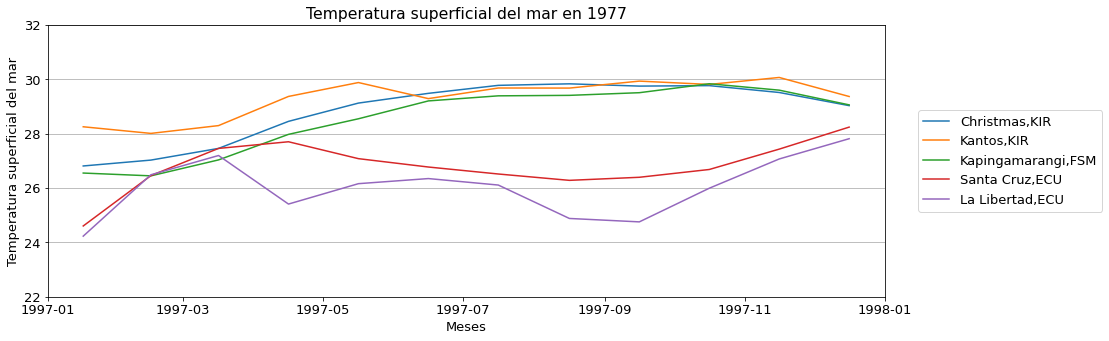

In [404]:
plt.figure(figsize=(15, 5))
plt.plot(df_sst_alld['time'].values,df_sst_alld['Christmas,KIR'], label='Christmas,KIR')
plt.plot(df_sst_alld['time'].values,df_sst_alld['Kantos,KIR'], label='Kantos,KIR')
plt.plot(df_sst_alld['time'].values,df_sst_alld['Kapingamarangi,FSM'], label='Kapingamarangi,FSM')
plt.plot(df_sst_alld['time'].values,df_sst_alld['Santa Cruz,ECU'], label='Santa Cruz,ECU')
plt.plot(df_sst_alld['time'].values,df_sst_alld['La Libertad,ECU'] , label='La Libertad,ECU')

plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

plt.ylabel('Temperatura superficial del mar')
plt.xlabel('Meses')
plt.grid(axis = 'y')


plt.axis(['1997-01', '1998-01',22,32])
plt.title('Temperatura superficial del mar en 1977')
plt.show()

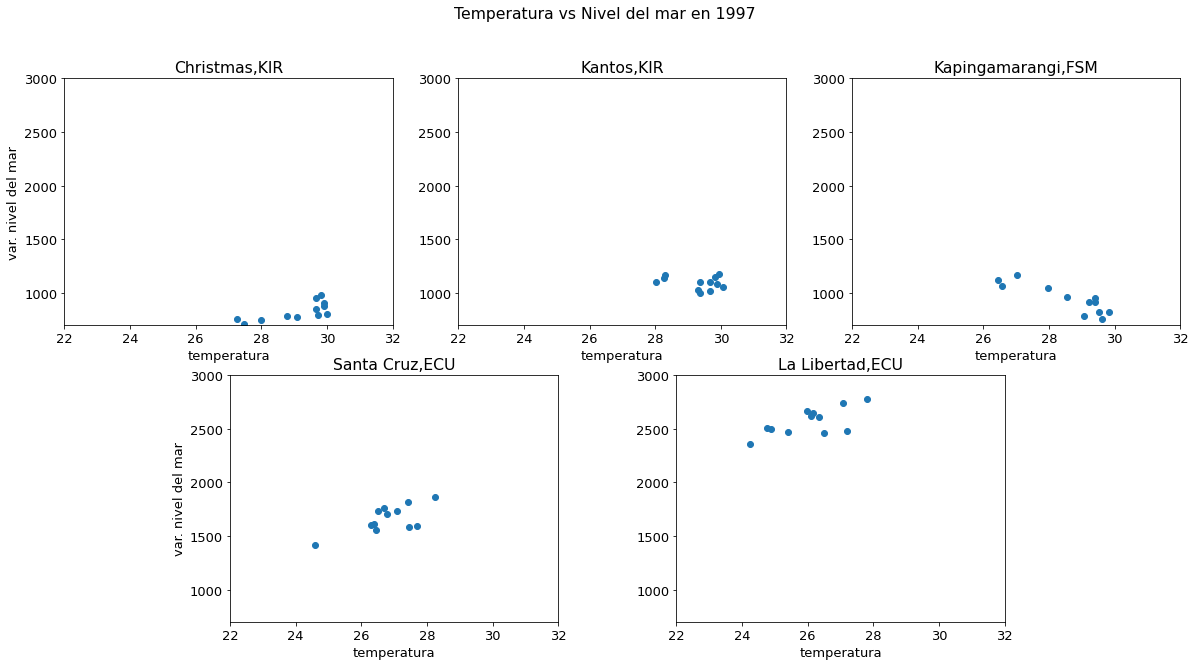

In [393]:
figs,axs = plt.subplots(2,3, figsize=(20, 10))

# plt.figure(figsize=(20, 10))

# plt.subplot(231)
axs[0, 0].scatter(df_sst_011['sst'], df_1997_monthly['Christmas,KIR'])
# plt.axis([1970, 1984,0,2600])
# axs[0, 0].set(ylabel='nivel del mar',)

axs[0, 0].set(xlabel='temperatura' ,ylabel='var. nivel del mar')
axs[0,0].axis([22,32,700,3000])

axs[0, 0].set_title('Christmas,KIR')

# plt.subplot(232)
axs[0, 1].scatter(df_sst_97_013['sst'], df_1997_monthly['Kantos,KIR'])
# plt.axis([1970, 1984,0,2600])
axs[0, 1].set(xlabel='temperatura')
axs[0,1].axis([22,32,700,3000])

axs[0, 1].set_title('Kantos,KIR')


# plt.subplot(233)
axs[0, 2].scatter(df_sst_97_029['sst'], df_1997_monthly['Kapingamarangi,FSM'])
# plt.axis([1970, 1984,0,2600])
axs[0, 2].set(xlabel='temperatura' )
axs[0,2].axis([22,32,700,3000])

axs[0, 2].set_title('Kapingamarangi,FSM')

# plt.subplot(234)
axs[1, 0].scatter(df_sst_97_030['sst'], df_1997_monthly['Santa Cruz,ECU'])
# plt.axis([1970, 1984,0,2600])
axs[1, 0].set(xlabel='temperatura' ,ylabel='var. nivel del mar')
axs[1, 0].set_position([0.24,0.125,0.228,0.343])
axs[1,0].axis([22,32,700,3000])

axs[1, 0].set_title('Santa Cruz,ECU')

# plt.subplot(235)
axs[1, 1].scatter(df_sst_97_091['sst'], df_1997_monthly['La Libertad,ECU'])
# plt.axis([1970, 1984,0,2600])
axs[1, 1].set(xlabel='temperatura')
axs[1,1].set_position([0.55,0.125,0.228,0.343])
axs[1,1].axis([22,32,700,3000])

axs[1, 1].set_title('La Libertad,ECU')

axs[1, 2].set_visible(False)

#label the figure
plt.suptitle('Temperatura vs Nivel del mar en 1997')
plt.show()

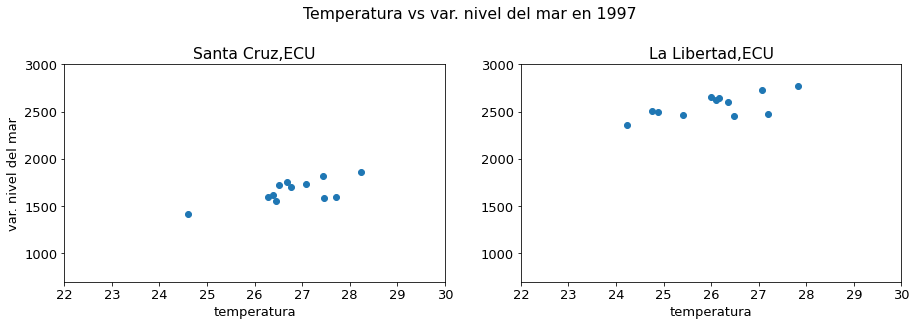

In [385]:
figs,axs = plt.subplots(1,2, figsize=(15, 4))


# plt.subplot(234)
axs[0].scatter(df_sst_97_030['sst'], df_1997_monthly['Santa Cruz,ECU'])
axs[0].axis([22,30,700,3000])
# plt.axis([1970, 1984,0,2600])
axs[0].set(xlabel='temperatura' ,ylabel='var. nivel del mar',)
# axs[0].set_position([0.24,0.125,0.228,0.343])
axs[0].set_title('Santa Cruz,ECU')

# plt.subplot(235)
axs[1].scatter(df_sst_97_091['sst'], df_1997_monthly['La Libertad,ECU'])
axs[1].axis([22,30,700,3000])
# plt.axis([1970, 1984,0,2600])
axs[1].set(xlabel='temperatura')
# axs[1].set_position([0.55,0.125,0.228,0.343])
axs[1].set_title('La Libertad,ECU')

# axs[1, 2].set_visible(False)

#label the figure
plt.suptitle('Temperatura vs var. nivel del mar en 1997', y=1.08)
plt.show()

In [378]:
df_1997_monthly

time  Christmas,KIR  Kantos,KIR  Kapingamarangi,FSM  Santa Cruz,ECU  \
0   1997-01-01          676.0      1104.0              1176.0          1420.0   
1   1997-01-02          705.0      1092.0              1131.0          1423.0   
2   1997-01-03          710.0      1136.0              1115.0          1398.0   
3   1997-01-04          706.0      1160.0              1136.0          1395.0   
4   1997-01-05          743.0      1139.0              1106.0          1419.0   
..         ...            ...         ...                 ...             ...   
360 1997-12-27          777.0      1042.0               775.0          1845.0   
361 1997-12-28          759.0      1058.0               804.0          1834.0   
362 1997-12-29          730.0      1034.0               828.0          1826.0   
363 1997-12-30          720.0      1015.0               815.0          1807.0   
364 1997-12-31          739.0      1021.0               800.0          1796.0   

     La Libertad,ECU  month  
0             2398.0      1  
1             2377.0      1  
2             2388.0      1  
3             2406.0      1  
4             2402.0      1  
..               ...    ...  
360           2699.0     12  
361           2727.0     12  
362           2724.0     12  
363           2688.0     12  
364           2673.0     12  

[365 rows x 7 columns]

In [50]:
df_sst_alld.describe()

Christmas,KIR  Kantos,KIR  Kapingamarangi,FSM  Santa Cruz,ECU  \
count      12.000000   12.000000           12.000000       12.000000   
mean       28.838070   29.305084           28.549116       26.803897   
std         1.128186    0.716803            1.237790        0.917860   
min        26.813667   28.011750           26.449902       24.606186   
25%        28.205772   29.043336           27.741359       26.443571   
50%        29.306202   29.525365           29.134140       26.729484   
75%        29.756282   29.830680           29.435977       27.439846   
max        29.835783   30.069866           29.838255       28.243284   

       La Libertad,ECU  
count        12.000000  
mean         26.039710  
std           1.067380  
min          24.231915  
25%          25.279529  
50%          26.136859  
75%          26.635039  
max          27.816822

In [55]:
df_sst_all.set_index('time').idxmax(axis=1)


time
2015-01-16 12:00:00+00:00    Kantos,KIR
2015-02-16 12:00:00+00:00    Kantos,KIR
2015-03-16 12:00:00+00:00    Kantos,KIR
2015-04-16 12:00:00+00:00    Kantos,KIR
2015-05-16 12:00:00+00:00    Kantos,KIR
2015-06-16 12:00:00+00:00    Kantos,KIR
2015-07-16 12:00:00+00:00    Kantos,KIR
2015-08-16 12:00:00+00:00    Kantos,KIR
2015-09-16 12:00:00+00:00    Kantos,KIR
2015-10-16 12:00:00+00:00    Kantos,KIR
2015-11-16 12:00:00+00:00    Kantos,KIR
2015-12-16 12:00:00+00:00    Kantos,KIR
dtype: object

In [54]:
# Valores 1997
df_sst_alld.set_index('time').idxmax(axis=1)
# df_sst_alld

time
1997-01-16 12:00:00+00:00            Kantos,KIR
1997-02-15 00:00:00+00:00            Kantos,KIR
1997-03-16 12:00:00+00:00            Kantos,KIR
1997-04-16 00:00:00+00:00            Kantos,KIR
1997-05-16 12:00:00+00:00            Kantos,KIR
1997-06-16 00:00:00+00:00         Christmas,KIR
1997-07-16 12:00:00+00:00         Christmas,KIR
1997-08-16 12:00:00+00:00         Christmas,KIR
1997-09-16 00:00:00+00:00            Kantos,KIR
1997-10-16 12:00:00+00:00    Kapingamarangi,FSM
1997-11-16 00:00:00+00:00            Kantos,KIR
1997-12-16 12:00:00+00:00            Kantos,KIR
dtype: object

In [ ]:
# data = df_anio_p.astype(np.float)

# fig1, ax1 = plt.subplots()
# ax1.set_title('Basic Plot')
# ax1.boxplot(data)

# plt.show()

plt.figure(figsize=(10, 5))

df_anio_p.boxplot(grid=False)

plt.title('Nivel del Mar por estacion 1985 - 2020')

# plt.xticks()

# plt.xlabel('Estaciones')
plt.ylabel('Nivel del mar')

plt.show()

13509


Text(0.5, 0.98, 'Corrientes marinas con su temperatura en 1970-')

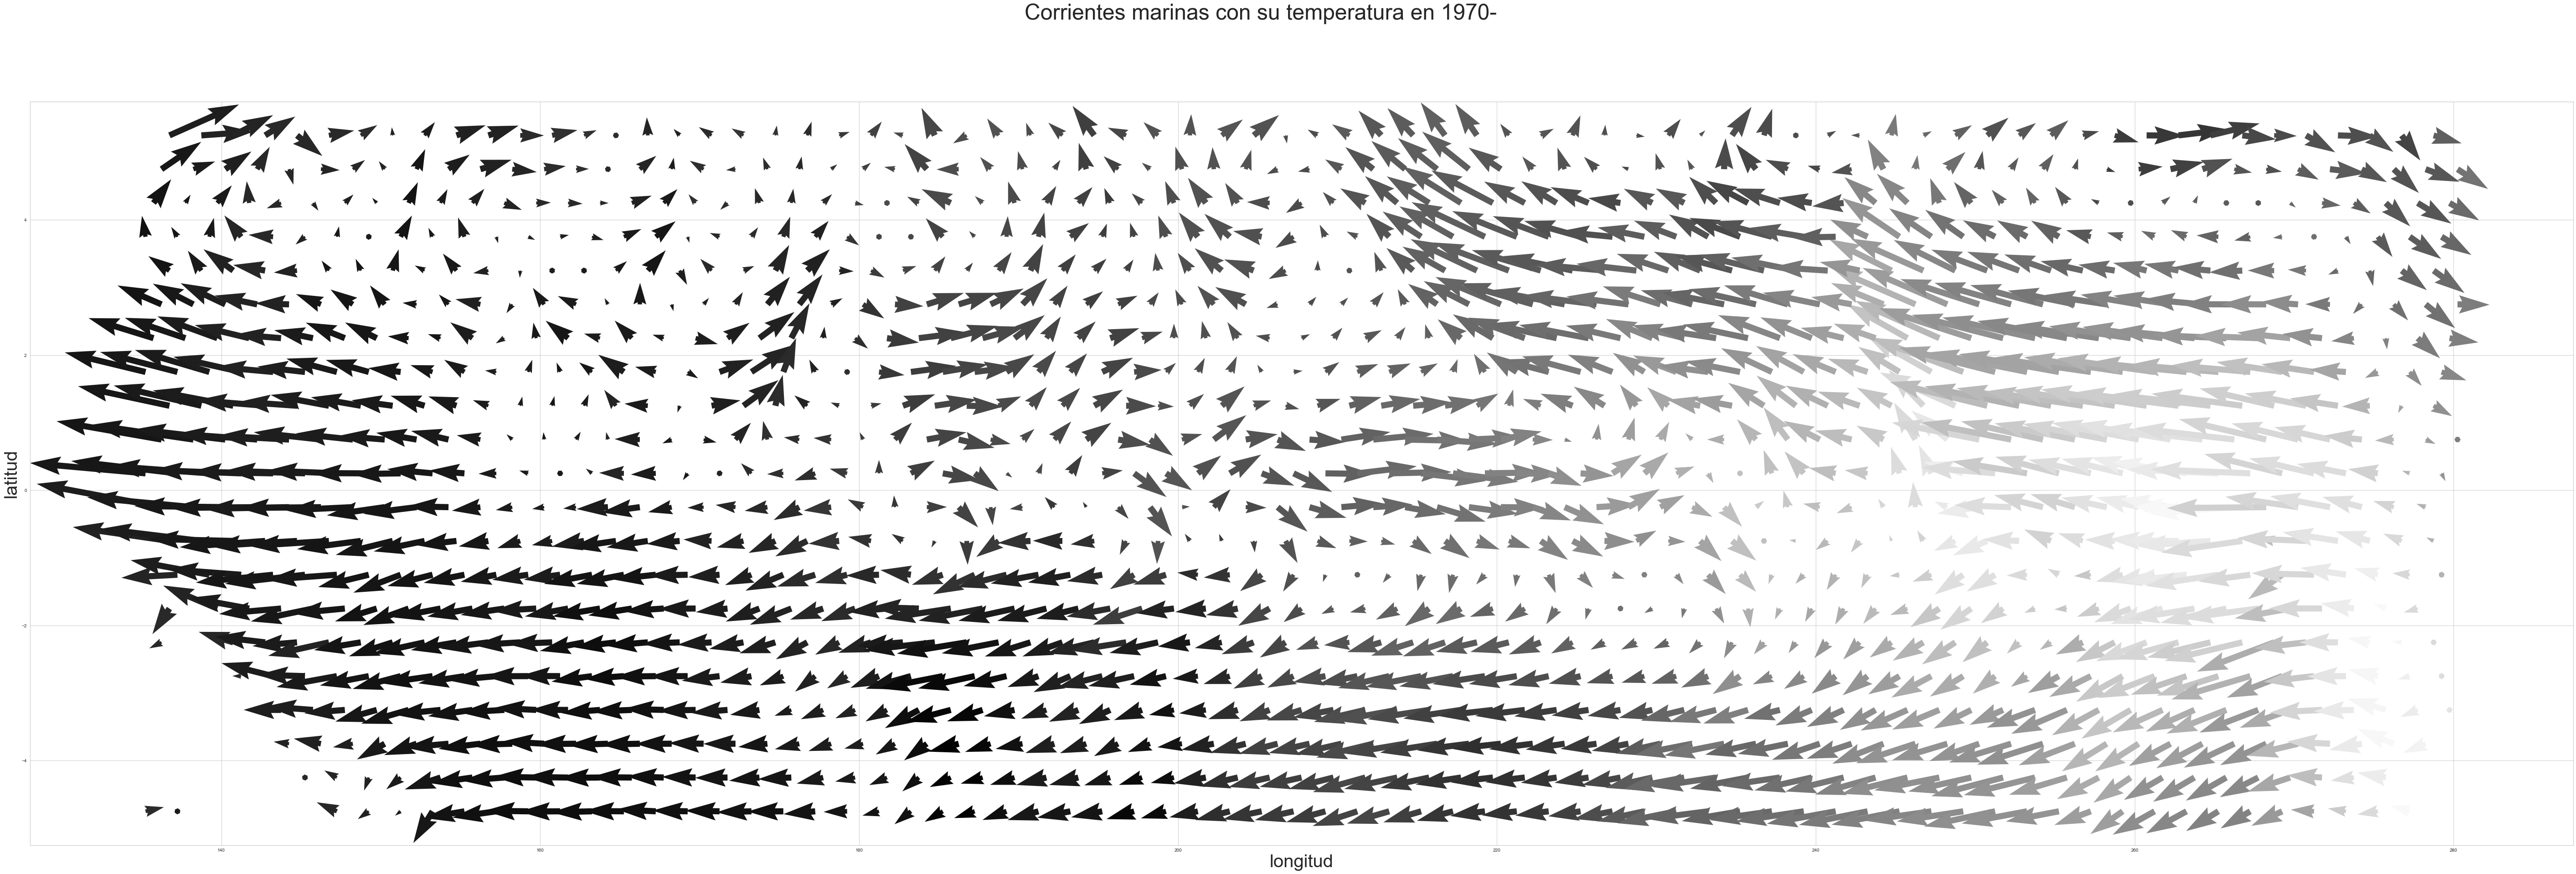

In [116]:

date = "1970-05-15"
df_previo['time'] = pd.to_datetime(df_previo['time (UTC)'], format="%Y-%m-%dT00:00:00Z")
df2=df_previo.where(df_previo['time'] == date).dropna().iloc[::4, :]

print(df2.size)
plt.figure(figsize=(100, 30))
plt.rcParams['font.size']='40'
plt.quiver(df2['longitude (degrees_east)'], df2['latitude (degrees_north)'], df2['u (m s-1)'], df2['v (m s-1)'], df2['temp (degree_C)'], linewidths=0.01, cmap='viridis')
plt.xlabel('longitud', fontsize=40)
plt.ylabel('latitud', fontsize=40)
plt.suptitle('Corrientes marinas con su temperatura en 1970-')

13509


Text(0.5, 0.98, 'Corrientes marinas con su temperatura en 1997-08-15')

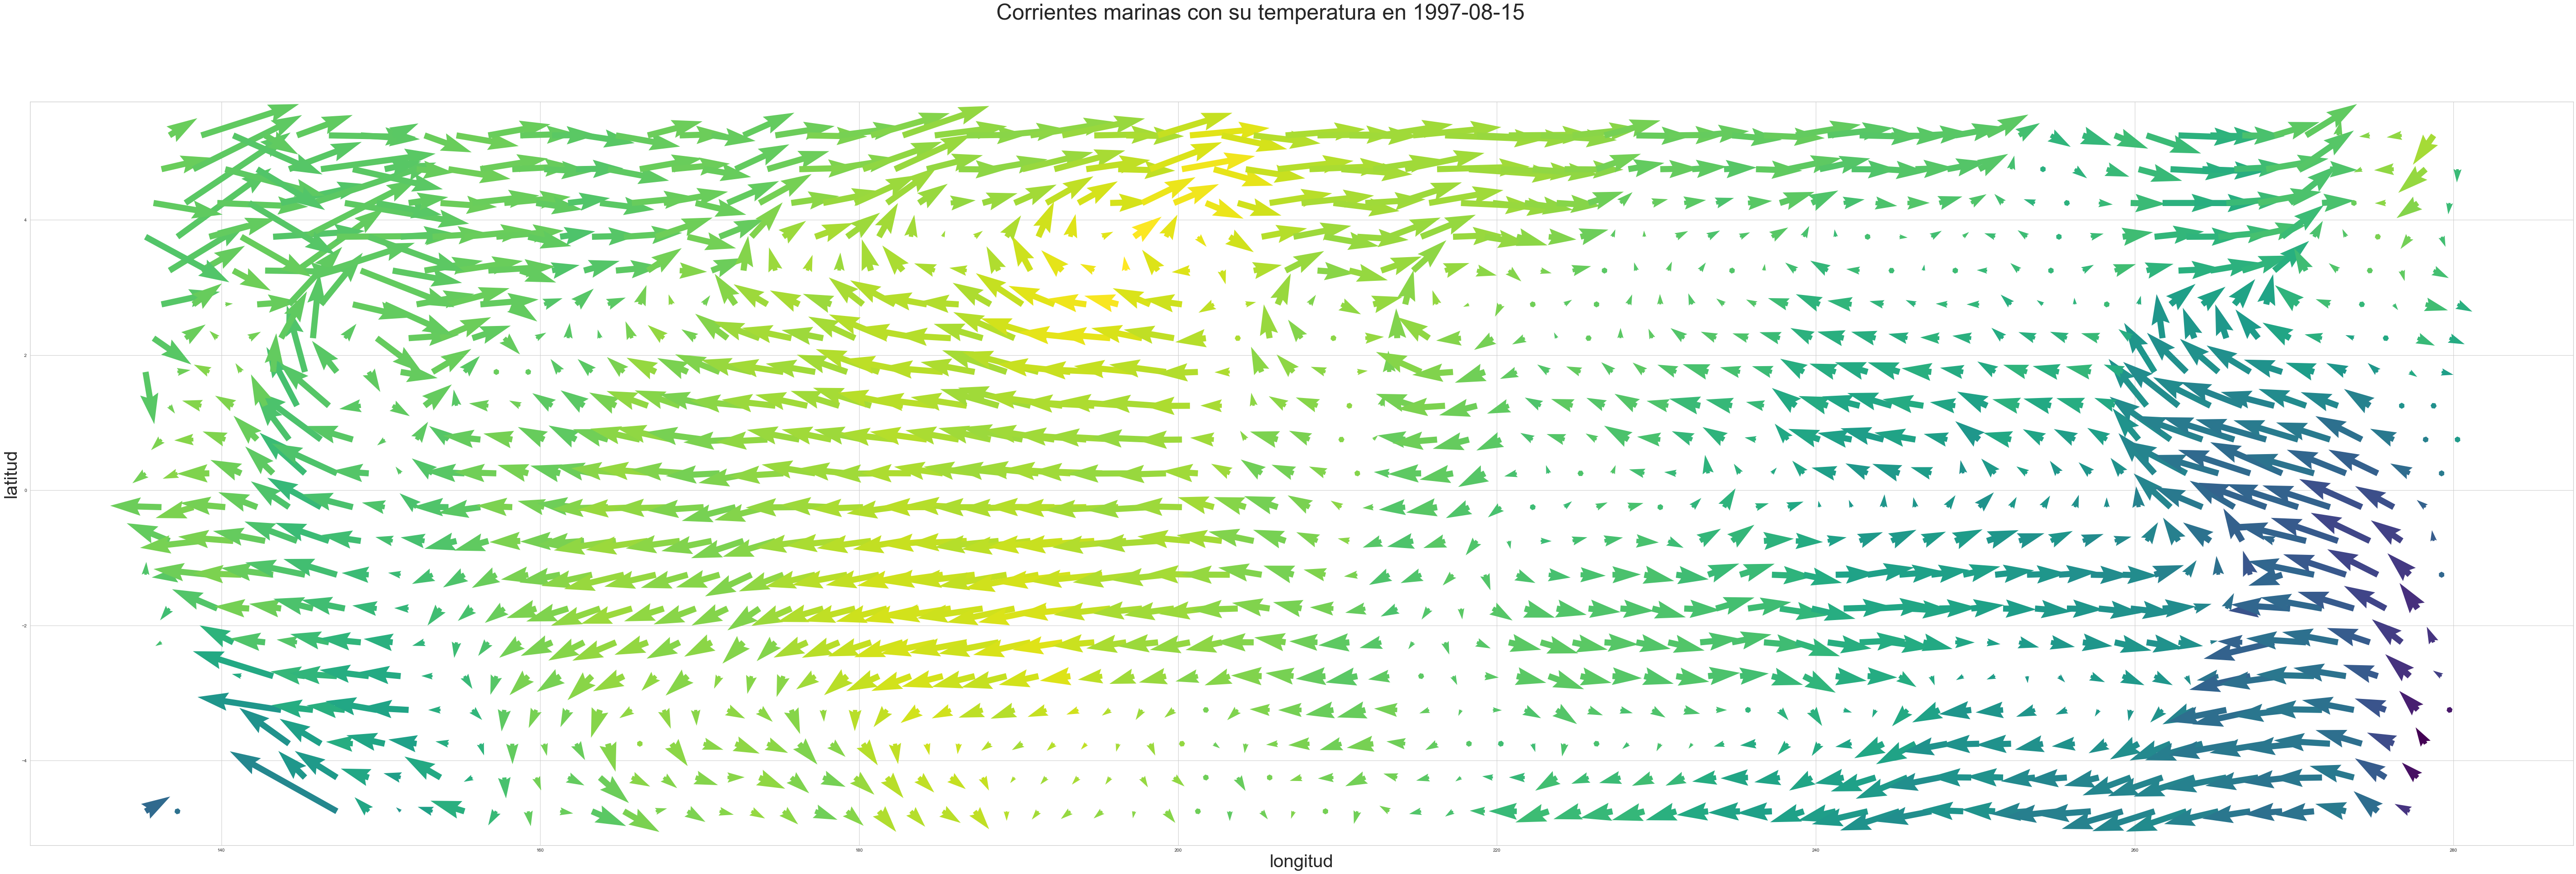

In [168]:
date = "1997-08-15"
df_actual['time'] = pd.to_datetime(df_actual['time (UTC)'], format="%Y-%m-%dT00:00:00Z")
df3=df_actual.where(df_actual['time'] == date).dropna().iloc[::4, :]

print(df3.size)
plt.figure(figsize=(100, 30))
plt.rcParams['font.size']='40'
plt.quiver(df3['longitude (degrees_east)'], df3['latitude (degrees_north)'], df3['u (m s-1)'], df3['v (m s-1)'], df3['temp (degree_C)'], linewidths=0.01, cmap='viridis')

plt.xlabel('longitud', fontsize=40)
plt.ylabel('latitud', fontsize=40)
plt.suptitle('Corrientes marinas con su temperatura en 1997-08-15')

<AxesSubplot:xlabel='longitude (degrees_east)', ylabel='latitude (degrees_north)'>

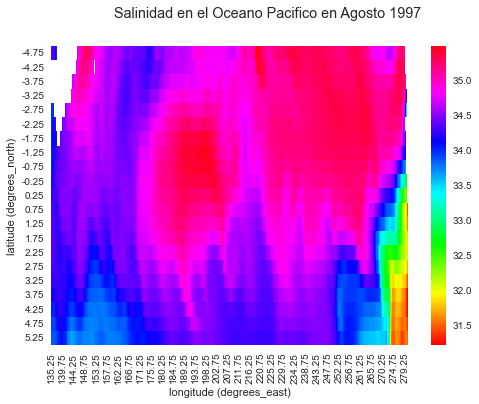

In [117]:
date='1997-08-15'
df_actual['time'] = pd.to_datetime(df_actual['time (UTC)'], format="%Y-%m-%dT00:00:00Z")
df4=df_actual.where(df_actual['time'] == date).dropna()

plt.rcParams['font.size']='12'
plt.suptitle('Salinidad en el Oceano Pacifico en Agosto 1997')
sns.heatmap(df4[['longitude (degrees_east)', 'latitude (degrees_north)', 'salt (PSU)']].pivot('longitude (degrees_east)', 'latitude (degrees_north)', 'salt (PSU)').T, cmap='hsv')

In [ ]:
df_actual['time'] = pd.to_datetime(df_actual['time (UTC)'], format="%Y-%m-%dT00:00:00Z")
df_total_soda = pd.concat([df_previo, df_actual], ignore_index=True)
df_total_soda['time']

import cv2
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas


video = cv2.VideoWriter('video.mp4', cv2.VideoWriter_fourcc('A','V','C','1'),5,(5760,1440))
plt.ioff()
for date in df_total_soda['time'].unique()[:]:
    df3=df_total_soda.where(df_total_soda['time'] == date).dropna().iloc[::4, :]
    date=str(date)[:10]
    fig = plt.figure(figsize=(80, 20))
    plt.rcParams['font.size']='36'
    plt.xlabel('longitud', fontsize=36)
    plt.ylabel('latitud', fontsize=36)
    plt.suptitle('Corrientes marinas con su temperatura en '+date)
    plt.quiver(df3['longitude (degrees_east)'], df3['latitude (degrees_north)'], df3['u (m s-1)'], df3['v (m s-1)'], df3['temp (degree_C)'], linewidths=0.01)
    canvas = FigureCanvas(fig)
    canvas.draw()
    mat = np.array(canvas.renderer._renderer)
    mat = cv2.cvtColor(mat, cv2.COLOR_RGB2BGR)
    video.write(mat)
    print(date)
    plt.close(fig)
    
cv2.destroyAllWindows()
video.release()
plt.ion()

In [163]:
df_actual['time'] = pd.to_datetime(df_actual['time (UTC)'], format="%Y-%m-%dT00:00:00Z")
df_total_soda = pd.concat([df_previo, df_actual], ignore_index=True).reset_index()
df_total_soda['time']
limit_date = pd.to_datetime("1984-01-15")
import cv2
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas


video = cv2.VideoWriter('video_salt.mp4', cv2.VideoWriter_fourcc('A','V','C','1'),5,(1440,360))
plt.ioff()
for date in df_total_soda['time'].unique()[:]:
    if date != limit_date:
        df4=df_total_soda.where(df_total_soda['time'] == date).dropna()
    else:
        df4=df_previo.where(df_previo['time'] == date).dropna()
    date=str(date)[:10]
    fig = plt.figure(figsize=(20, 5))
    plt.rcParams['font.size']='12'
    plt.xlabel('longitud')
    plt.ylabel('latitud')
    plt.suptitle('Salinidad en el Oceano Pacifico en '+date)
    
    sns.heatmap(df4[['longitude (degrees_east)', 'latitude (degrees_north)', 'salt (PSU)']].pivot('longitude (degrees_east)', 'latitude (degrees_north)', 'salt (PSU)').T, cmap='hsv')    
    canvas = FigureCanvas(fig)
    canvas.draw()
    mat = np.array(canvas.renderer._renderer)
    mat = cv2.cvtColor(mat, cv2.COLOR_RGB2BGR)
    video.write(mat)
    print(date)
    plt.close(fig)
    
cv2.destroyAllWindows()
video.release()
plt.ion()

1970-01-15
1970-02-15
1970-03-15
1970-04-15
1970-05-15
1970-06-15
1970-07-15
1970-08-15
1970-09-15
1970-10-15
1970-11-15
1970-12-15
1971-01-15
1971-02-15
1971-03-15
1971-04-15
1971-05-15
1971-06-15
1971-07-15
1971-08-15
1971-09-15
1971-10-15
1971-11-15
1971-12-15
1972-01-15
1972-02-15
1972-03-15
1972-04-15
1972-05-15
1972-06-15
1972-07-15
1972-08-15
1972-09-15
1972-10-15
1972-11-15
1972-12-15
1973-01-15
1973-02-15
1973-03-15
1973-04-15
1973-05-15
1973-06-15
1973-07-15
1973-08-15
1973-09-15
1973-10-15
1973-11-15
1973-12-15
1974-01-15
1974-02-15
1974-03-15
1974-04-15
1974-05-15
1974-06-15
1974-07-15
1974-08-15
1974-09-15
1974-10-15
1974-11-15
1974-12-15
1975-01-15
1975-02-15
1975-03-15
1975-04-15
1975-05-15
1975-06-15
1975-07-15
1975-08-15
1975-09-15
1975-10-15
1975-11-15
1975-12-15
1976-01-15
1976-02-15
1976-03-15
1976-04-15
1976-05-15
1976-06-15
1976-07-15
1976-08-15
1976-09-15
1976-10-15
1976-11-15
1976-12-15
1977-01-15
1977-02-15
1977-03-15
1977-04-15
1977-05-15
1977-06-15
1977-07-15

# Overview del dataset

In [79]:
df_anio_p

d011         d013         d029         d030         d091
Year                                                                
1985  693.638356  1039.522152  1023.859155  1402.147945  2372.041096
1986  741.400000  1025.328767  1009.590028  1453.970588  2423.232877
1987  724.084932   968.882192   872.174157  1514.115068  2484.435616
1988  536.887978   895.857923   959.311475  1375.232240  2380.412568
1989  654.123288  1009.539726  1036.232877  1424.126027  2419.249315
1990  724.419178  1086.556164  1010.071233  1454.145205  2394.032877
1991  744.669468  1086.827397   993.556164  1501.016438  2441.936986
1992  717.330579  1049.906336   883.073770  1516.872881  2478.811475
1993  700.731507  1058.632877   932.712329  1496.339726  2458.794521
1994  724.728767  1072.140884   996.205479  1466.539726  2448.427397
1995  662.435616  1038.767123   976.164384  1437.035616  2381.231198
1996  682.642857  1032.912568  1033.218579  1427.765027  2357.740437
1997  830.742466  1092.736986   944.109589  1663.290055  2567.487671
1998  538.336986   939.175342   844.239316  1533.035616  2493.025210
1999  594.832877   972.052055  1003.126027  1433.312329  2361.114114
2000  663.472678  1019.387978  1055.072874  1446.691257  2382.196203
2001  693.916435  1021.551402  1056.005525  1459.723288  2361.203911
2004  739.057377  1116.133779  1054.816940  1479.672131  2421.178694
2005  698.594521  1080.884932  1039.147945  1472.290850  2433.347541
2006  710.304110  1083.191781  1047.249315  1518.482192  2483.497253
2007  632.230241  1044.522124  1041.821918  1430.720548  2420.161644
2008  596.858065  1002.278689  1029.672131  1477.885714  2481.782369
2009  746.408219  1089.556164  1069.681818  1498.725490  2469.460274
2015  828.100000  1247.111111  1021.013699  1625.991781  2572.660274
2016  873.250000  1069.434426  1004.505464  1511.516393  2482.250000
2017  689.895890  1085.136986  1089.340426  1515.876712  2493.772603
2018  785.356164  1146.484932  1144.104730  1541.641096  2496.232877
2019  765.961644  1166.019157  1097.395122  1534.053691  2494.054795
2020  705.920765  1093.079235  1077.953368  1495.816940  2466.516393

In [89]:
df_anio_p.rename( columns={'d011':'Christmas,KIR', 'd013':'Kantos,KIR', 'd029':'Kapingamarangi,FSM', 'd030':'Santa Cruz,ECU', 'd091':'La Libertad,ECU'}, inplace=True )

In [90]:
df_anio_p.describe()

Christmas,KIR   Kantos,KIR  Kapingamarangi,FSM  Santa Cruz,ECU  \
count      29.000000    29.000000           29.000000       29.000000   
mean      703.459688  1056.331420         1011.911236     1486.483882   
std        77.641851    68.798671           67.737623       60.731163   
min       536.887978   895.857923          844.239316     1375.232240   
25%       663.472678  1021.551402          993.556164     1446.691257   
50%       705.920765  1058.632877         1023.859155     1479.672131   
75%       741.400000  1086.827397         1054.816940     1515.876712   
max       873.250000  1247.111111         1144.104730     1663.290055   

       La Libertad,ECU  
count        29.000000  
mean       2445.527179  
std          57.766523  
min        2357.740437  
25%        2394.032877  
50%        2448.427397  
75%        2483.497253  
max        2572.660274

In [50]:
df_anio_p.mean()

d011     703.459688
d013    1056.331420
d029    1011.911236
d030    1486.483882
d091    2445.527179
dtype: float64

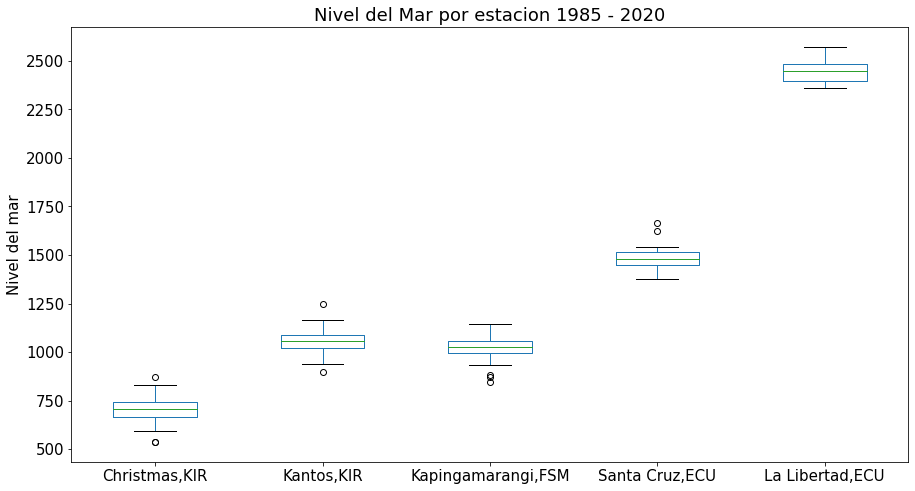

In [125]:
# data = df_anio_p.astype(np.float)

# fig1, ax1 = plt.subplots()
# ax1.set_title('Basic Plot')
# ax1.boxplot(data)

# plt.show()

plt.rc('font', size=15) 
plt.figure(figsize=(15, 8))

df_anio_p.boxplot(grid=False)

plt.title('Nivel del Mar por estacion 1985 - 2020')

# plt.xticks()

# plt.xlabel('Estaciones')
plt.ylabel('Nivel del mar')

plt.show()



In [115]:
df_a

Year        d011         d013         d029         d030         d091
0   1970    0.000000     0.000000     0.000000     0.000000  2154.921283
1   1971    0.000000     0.000000     0.000000     0.000000  2171.073248
2   1972    0.000000  1122.500000     0.000000     0.000000  2300.151335
3   1973    0.000000   966.728045     0.000000     0.000000  2158.841096
4   1974  611.812883  1021.580822     0.000000     0.000000  2181.734072
5   1975  601.997199   999.323120     0.000000     0.000000  2165.216438
6   1976  718.896440  1074.276712     0.000000     0.000000  2267.166667
7   1977  672.189041  1062.955432     0.000000     0.000000  2201.897351
8   1978  696.056180  1043.383754  1048.350877  1434.410959  2218.233146
9   1979  691.850187  1048.071633   974.951070  1460.534247  2256.416438
10  1980  737.459384  1075.760000   968.369318  1440.160656  2268.122951
11  1981  691.181009   997.666667   985.393293  1420.317829  2317.950685
12  1982  812.351429  1079.673469   974.418182  1550.169863  2407.589041
13  1983  578.915068   929.221053   855.042194  1580.887671  2486.293151
14  1984  605.770492   977.603825   953.704918  1421.417910  2384.603825

In [151]:
df_a.rename( columns={'d011':'Christmas,KIR', 'd013':'Kantos,KIR', 'd029':'Kapingamarangi,FSM', 'd030':'Santa Cruz,ECU', 'd091':'La Libertad,ECU'}, inplace=True )
# df_a.set_index('Year', inplace=True)

d011         d013         d029         d030         d091
Year                                                                
1970    1.000000     1.000000     1.000000     1.000000     1.000000
1971    1.000000     1.000000     1.000000     1.000000     1.000000
1972    1.000000     1.000000     1.000000     1.000000     1.000000
1973    1.000000     1.000000     1.000000     1.000000     1.000000
1974  611.812883  1021.580822     0.000000     0.000000  2181.734072
1975  601.997199   999.323120     0.000000     0.000000  2165.216438
1976  718.896440  1074.276712     0.000000     0.000000  2267.166667
1977  672.189041  1062.955432     0.000000     0.000000  2201.897351
1978  696.056180  1043.383754  1048.350877  1434.410959  2218.233146
1979  691.850187  1048.071633   974.951070  1460.534247  2256.416438
1980  737.459384  1075.760000   968.369318  1440.160656  2268.122951
1981  691.181009   997.666667   985.393293  1420.317829  2317.950685
1982  812.351429  1079.673469   974.418182  1550.169863  2407.589041
1983  578.915068   929.221053   855.042194  1580.887671  2486.293151
1984  605.770492   977.603825   953.704918  1421.417910  2384.603825

In [152]:
df_a

Christmas,KIR   Kantos,KIR  Kapingamarangi,FSM  Santa Cruz,ECU  \
Year                                                                   
1970            NaN          NaN                 NaN             NaN   
1971            NaN          NaN                 NaN             NaN   
1972            NaN  1122.500000                 NaN             NaN   
1973            NaN   966.728045                 NaN             NaN   
1974     611.812883  1021.580822                 NaN             NaN   
1975     601.997199   999.323120                 NaN             NaN   
1976     718.896440  1074.276712                 NaN             NaN   
1977     672.189041  1062.955432                 NaN             NaN   
1978     696.056180  1043.383754         1048.350877     1434.410959   
1979     691.850187  1048.071633          974.951070     1460.534247   
1980     737.459384  1075.760000          968.369318     1440.160656   
1981     691.181009   997.666667          985.393293     1420.317829   
1982     812.351429  1079.673469          974.418182     1550.169863   
1983     578.915068   929.221053          855.042194     1580.887671   
1984     605.770492   977.603825          953.704918     1421.417910   

      La Libertad,ECU  
Year                   
1970      2154.921283  
1971      2171.073248  
1972      2300.151335  
1973      2158.841096  
1974      2181.734072  
1975      2165.216438  
1976      2267.166667  
1977      2201.897351  
1978      2218.233146  
1979      2256.416438  
1980      2268.122951  
1981      2317.950685  
1982      2407.589041  
1983      2486.293151  
1984      2384.603825

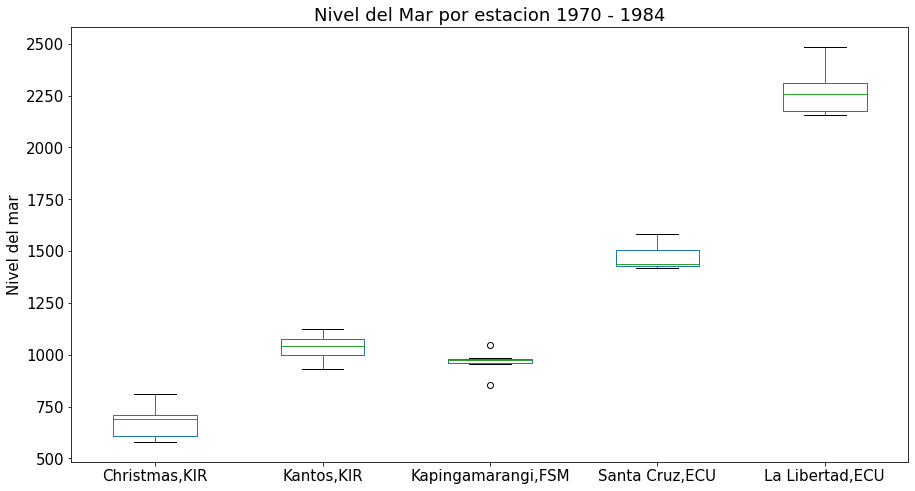

In [153]:
# data = df_anio_p.astype(np.float)

# fig1, ax1 = plt.subplots()
# ax1.set_title('Basic Plot')
# ax1.boxplot(data)

# plt.show()

plt.figure(figsize=(15, 8))

df_a.boxplot(grid=False)

plt.title('Nivel del Mar por estacion 1970 - 1984')

# plt.xticks()

# plt.xlabel('Estaciones')
plt.ylabel('Nivel del mar')

plt.show()


In [34]:
df_sst_1997['sst'].describe()

count    20072.000000
mean        28.381065
std          1.259454
min         22.732560
25%         27.707374
50%         28.722251
75%         29.340994
max         30.417587
Name: sst, dtype: float64

In [37]:
df_sst_1997

time  latitude  longitude        sst
0     1997-01-16 12:00:00+00:00       5.5      140.5  28.769217
1     1997-01-16 12:00:00+00:00       5.5      141.5  28.805550
2     1997-01-16 12:00:00+00:00       5.5      142.5  28.946290
3     1997-01-16 12:00:00+00:00       5.5      143.5  29.103340
4     1997-01-16 12:00:00+00:00       5.5      144.5  29.271656
...                         ...       ...        ...        ...
20067 1998-01-16 12:00:00+00:00      -4.5      -85.5  28.673662
20068 1998-01-16 12:00:00+00:00      -4.5      -84.5  28.678600
20069 1998-01-16 12:00:00+00:00      -4.5      -83.5  28.560375
20070 1998-01-16 12:00:00+00:00      -4.5      -82.5  28.400507
20071 1998-01-16 12:00:00+00:00      -4.5      -81.5  28.367817

[20072 rows x 4 columns]

In [35]:
df_sst_2015['sst'].describe()

count    20072.000000
mean        28.480370
std          1.472069
min         21.516290
25%         27.541562
50%         28.882884
75%         29.637487
max         30.885612
Name: sst, dtype: float64

In [36]:
df_previo.merge(df_actual).describe()

depth (m)  latitude (degrees_north)  longitude (degrees_east)  \
count  6.111000e+03               6111.000000               6111.000000   
mean   5.010000e+00                  0.250000                207.750000   
std    1.776502e-15                  3.027898                 42.005421   
min    5.010000e+00                 -4.750000                135.250000   
25%    5.010000e+00                 -2.250000                171.250000   
50%    5.010000e+00                  0.250000                207.750000   
75%    5.010000e+00                  2.750000                244.250000   
max    5.010000e+00                  5.250000                280.250000   

       temp (degree_C)   salt (PSU)    u (m s-1)    v (m s-1)  
count      6027.000000  6027.000000  6004.000000  6004.000000  
mean         26.638259    34.571137    -0.321097     0.007385  
std           2.040451     0.612478     0.257356     0.144087  
min          21.133053    31.555471    -0.936370    -0.452542  
25%          25.278202    34.316846    -0.489333    -0.092545  
50%          26.421160    34.694890    -0.347613    -0.004565  
75%          28.524675    34.979900    -0.151244     0.096829  
max          30.405230    35.526463     0.513669     0.473262

## Analisis de ONI

In [40]:
df_ONI

DJF  JFM  FMA  MAM  AMJ  MJJ  JJA  JAS  ASO  SON  OND  NDJ
anio                                                            
1950 -1.5 -1.3 -1.2 -1.2 -1.1 -0.9 -0.5 -0.4 -0.4 -0.4 -0.6 -0.8
1951 -0.8 -0.5 -0.2  0.2  0.4  0.6  0.7  0.9  1.0  1.2  1.0  0.8
1952  0.5  0.4  0.3  0.3  0.2  0.0 -0.1  0.0  0.2  0.1  0.0  0.1
1953  0.4  0.6  0.6  0.7  0.8  0.8  0.7  0.7  0.8  0.8  0.8  0.8
1954  0.8  0.5  0.0 -0.4 -0.5 -0.5 -0.6 -0.8 -0.9 -0.8 -0.7 -0.7
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
2017 -0.3 -0.2  0.1  0.2  0.3  0.3  0.1 -0.1 -0.4 -0.7 -0.8 -1.0
2018 -0.9 -0.9 -0.7 -0.5 -0.2  0.0  0.1  0.2  0.5  0.8  0.9  0.8
2019  0.7  0.7  0.7  0.7  0.5  0.5  0.3  0.1  0.2  0.3  0.5  0.5
2020  0.5  0.5  0.4  0.2 -0.1 -0.3 -0.4 -0.6 -0.9 -1.2 -1.3 -1.2
2021 -1.0 -0.9 -0.8 -0.7 -0.5 -0.4  NaN  NaN  NaN  NaN  NaN  NaN

[72 rows x 12 columns]

In [65]:
df_ONI_test = df_ONI.stack()
df_ONI_test[1950]

DJF   -1.5
JFM   -1.3
FMA   -1.2
MAM   -1.2
AMJ   -1.1
MJJ   -0.9
JJA   -0.5
JAS   -0.4
ASO   -0.4
SON   -0.4
OND   -0.6
NDJ   -0.8
dtype: float64

In [41]:
df_ONI.loc[2015]

DJF    0.5
JFM    0.5
FMA    0.5
MAM    0.7
AMJ    0.9
MJJ    1.2
JJA    1.5
JAS    1.9
ASO    2.2
SON    2.4
OND    2.6
NDJ    2.6
Name: 2015, dtype: float64

In [ ]:


# Dataframe desde 1985 hasta 2020
df_ONI_8520 = df_ONI.loc[ (df_ONI['anio']>1984) & (df_ONI['anio']<= 2020) ]
# df_ONI_8520.reset_index(inplace=True, drop=True)
# df_ONI_8520.set_index('anio', inplace=True)
df_ONI_8520.head()

Text(0.5, 0.98, 'Diferencias de temperatura de cada mes en el periodo 1950-2021')

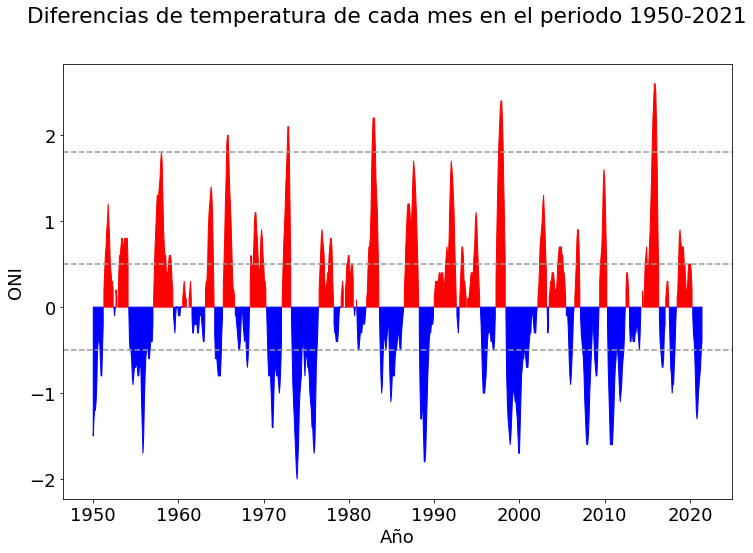

In [463]:
y = df_ONI.stack().to_frame().to_numpy()
y_positive = y.copy()
y_negative = y.copy()

y_positive[y_positive<=0] = np.nan
y_negative[y_negative>0] = np.nan

x = np.arange(1950, 2022, 1/12)[:-6]

plt.figure(figsize=(12,8))
plt.fill_between(x,y_positive.ravel(), color="r")
plt.fill_between(x,y_negative.ravel(), color="b")
plt.axhline(y=0.5, linestyle='--', color='0.6')
plt.axhline(y=1.8, linestyle='--', color='0.6')
plt.axhline(y=-0.5, linestyle='--', color='0.6')

# plt.grid(axis='x')

plt.xlabel('Año')
plt.ylabel('ONI')
plt.suptitle('Diferencias de temperatura de cada mes en el periodo 1950-2021')

Text(0.5, 0.98, 'Diferencias de temperatura de cada mes en entre 1994 y 1999')

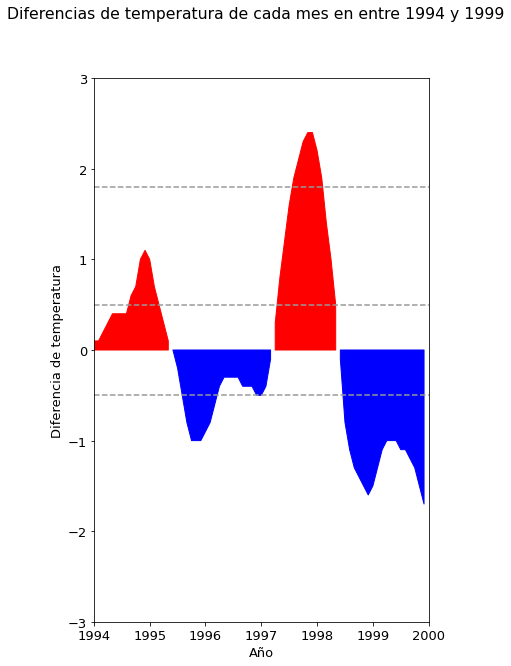

In [440]:
index_1997 = (1994-1950)*12
y_1997_positive = y_positive[index_1997:index_1997+12*6]
y_1997_negative = y_negative[index_1997:index_1997+12*6]
x_1997 = x[index_1997:index_1997+12*6]

plt.figure(figsize=(6,10))
plt.fill_between(x_1997,y_1997_positive.ravel(), color="r")
plt.fill_between(x_1997,y_1997_negative.ravel(), color="b")

plt.axis([1994,2000,-3,3])
# plt.grid()

plt.axhline(y=0.5, linestyle='--', color='0.6')
plt.axhline(y=1.8, linestyle='--', color='0.6')
plt.axhline(y=-0.5, linestyle='--', color='0.6')

plt.xlabel('Año')
plt.ylabel('Diferencia de temperatura')
plt.suptitle('Diferencias de temperatura de cada mes en entre 1994 y 1999')

Text(0.5, 0.98, 'Diferencias de temperatura de cada mes entre 2012 y 2017')

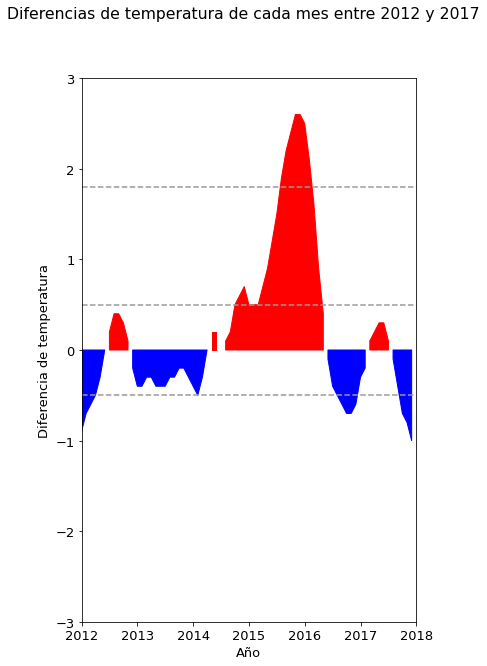

In [441]:
index_2015 = (2012-1950)*12
y_2015_positive = y_positive[index_2015:index_2015+12*6]
y_2015_negative = y_negative[index_2015:index_2015+12*6]
x_2015 = x[index_2015:index_2015+12*6]

plt.figure(figsize=(6,10))

plt.fill_between(x_2015,y_2015_positive.ravel(), color="r")
plt.fill_between(x_2015,y_2015_negative.ravel(), color="b")


plt.axis([2012,2018,-3,3])
# plt.grid()

plt.axhline(y=0.5, linestyle='--', color='0.6')
plt.axhline(y=1.8, linestyle='--', color='0.6')
plt.axhline(y=-0.5, linestyle='--', color='0.6')

plt.xlabel('Año')
plt.ylabel('Diferencia de temperatura')
plt.suptitle('Diferencias de temperatura de cada mes entre 2012 y 2017')

## Clustering

(0.0, 35.0)

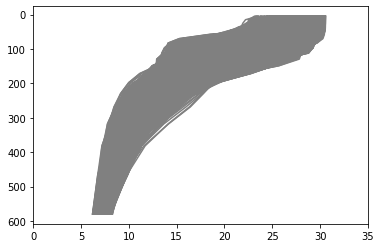

In [48]:
#plt.plot(,df_profundo_1997['depth (m)'])
#df_profundo_1997.where(df_profundo_1997['latitude (degrees_north)']==-4.75).dropna().where(df_profundo_1997['longitude (degrees_east)']==135.25).dropna()
#pd.DataFrame(.unstack().reset_index(name = "Group_Count"))
group_df = df_profundo_1997.where(df_profundo_1997['depth (m)'] <= 580).dropna().groupby(['latitude (degrees_north)','longitude (degrees_east)'])
group_dict = group_df.groups

In [92]:
df_nuevo_clust = df_profundo_1997.iloc[group_dict[(-4.75, 135.25)]][['depth (m)', 'temp (degree_C)']].set_index('depth (m)').T.reset_index()
for i in group_dict:
    if i != (-4.75,135.25):
        df_nuevo_clust = pd.concat([df_nuevo_clust,df_profundo_1997.iloc[group_dict[i]][['depth (m)', 'temp (degree_C)']].set_index('depth (m)').T.reset_index()], axis=0, ignore_index=True)
df_nuevo_clust = df_nuevo_clust.drop(['index'], axis=1)
df_nuevo_clust

depth (m)       5.01      15.07      25.28      35.76      46.61      57.98  \
0          25.902140  25.823215  24.061625  23.290741        NaN        NaN   
1          26.115147  26.066662  25.276310  24.900787  24.799059  24.768074   
2          25.989107  25.923420  25.463720  25.162000  24.991528  24.946540   
3          26.010004  25.959380  25.617820  25.375818  25.323689  25.312218   
4          26.117643  26.085972        NaN        NaN        NaN        NaN   
...              ...        ...        ...        ...        ...        ...   
5999       29.598970  29.693268  29.118170  27.930084  26.425238  24.773773   
6000       29.628721  29.506780  28.794780  27.654406  26.295984  24.730122   
6001       29.369068  28.814812  28.226171  27.412287  26.186007  24.667639   
6002       28.959879  28.043186  27.661057  27.293488  26.212723  24.687153   
6003       28.608852  27.446190  27.222950  27.225860  26.246515  24.765385   

depth (m)      70.02      82.92      96.92     112.32     129.49     148.96  \
0                NaN        NaN        NaN        NaN        NaN        NaN   
1          24.688854        NaN        NaN        NaN        NaN        NaN   
2          24.910057        NaN        NaN        NaN        NaN        NaN   
3          25.303366        NaN        NaN        NaN        NaN        NaN   
4                NaN        NaN        NaN        NaN        NaN        NaN   
...              ...        ...        ...        ...        ...        ...   
5999       23.199816  21.127075  18.719212  16.581541  15.304595  14.603483   
6000       23.184433  21.342464  19.061260  16.821173  15.326674  14.611314   
6001       23.037860  21.424940  19.460537  17.265528  15.491888  14.558816   
6002       22.857481  21.306805  19.692799  17.751816  15.892497  14.675019   
6003       22.706196  21.027582  19.712090  18.170208  16.497948  15.086024   

depth (m)      171.4     197.79     229.48     268.46     317.65    381.39  \
0                NaN        NaN        NaN        NaN        NaN       NaN   
1                NaN        NaN        NaN        NaN        NaN       NaN   
2                NaN        NaN        NaN        NaN        NaN       NaN   
3                NaN        NaN        NaN        NaN        NaN       NaN   
4                NaN        NaN        NaN        NaN        NaN       NaN   
...              ...        ...        ...        ...        ...       ...   
5999       13.970721  13.408163  12.817384  11.960356  10.641339  9.290925   
6000       14.045149  13.509543  12.943114  12.106593  10.762920  9.301852   
6001       14.041227  13.605726  13.075369  12.224754  10.887452  9.413729   
6002       14.035514  13.641820  13.142448  12.254369  10.865230  9.420038   
6003       14.196034  13.708962  13.189352  12.282377  10.819909  9.349500   

depth (m)    465.91    579.31  
0               NaN       NaN  
1               NaN       NaN  
2               NaN       NaN  
3               NaN       NaN  
4               NaN       NaN  
...             ...       ...  
5999       8.218327  7.533707  
6000       8.122182  7.645150  
6001       8.120293  7.827256  
6002       8.362126  7.998319  
6003       8.562904  8.123303  

[6004 rows x 20 columns]

In [98]:
df_nuevo_clust = df_nuevo_clust.reset_index().set_index("index")
df_nuevo_clust

depth (m)       5.01      15.07      25.28      35.76      46.61      57.98  \
index                                                                         
0          25.902140  25.823215  24.061625  23.290741        NaN        NaN   
1          26.115147  26.066662  25.276310  24.900787  24.799059  24.768074   
2          25.989107  25.923420  25.463720  25.162000  24.991528  24.946540   
3          26.010004  25.959380  25.617820  25.375818  25.323689  25.312218   
4          26.117643  26.085972        NaN        NaN        NaN        NaN   
...              ...        ...        ...        ...        ...        ...   
5999       29.598970  29.693268  29.118170  27.930084  26.425238  24.773773   
6000       29.628721  29.506780  28.794780  27.654406  26.295984  24.730122   
6001       29.369068  28.814812  28.226171  27.412287  26.186007  24.667639   
6002       28.959879  28.043186  27.661057  27.293488  26.212723  24.687153   
6003       28.608852  27.446190  27.222950  27.225860  26.246515  24.765385   

depth (m)      70.02      82.92      96.92     112.32     129.49     148.96  \
index                                                                         
0                NaN        NaN        NaN        NaN        NaN        NaN   
1          24.688854        NaN        NaN        NaN        NaN        NaN   
2          24.910057        NaN        NaN        NaN        NaN        NaN   
3          25.303366        NaN        NaN        NaN        NaN        NaN   
4                NaN        NaN        NaN        NaN        NaN        NaN   
...              ...        ...        ...        ...        ...        ...   
5999       23.199816  21.127075  18.719212  16.581541  15.304595  14.603483   
6000       23.184433  21.342464  19.061260  16.821173  15.326674  14.611314   
6001       23.037860  21.424940  19.460537  17.265528  15.491888  14.558816   
6002       22.857481  21.306805  19.692799  17.751816  15.892497  14.675019   
6003       22.706196  21.027582  19.712090  18.170208  16.497948  15.086024   

depth (m)      171.4     197.79     229.48     268.46     317.65    381.39  \
index                                                                        
0                NaN        NaN        NaN        NaN        NaN       NaN   
1                NaN        NaN        NaN        NaN        NaN       NaN   
2                NaN        NaN        NaN        NaN        NaN       NaN   
3                NaN        NaN        NaN        NaN        NaN       NaN   
4                NaN        NaN        NaN        NaN        NaN       NaN   
...              ...        ...        ...        ...        ...       ...   
5999       13.970721  13.408163  12.817384  11.960356  10.641339  9.290925   
6000       14.045149  13.509543  12.943114  12.106593  10.762920  9.301852   
6001       14.041227  13.605726  13.075369  12.224754  10.887452  9.413729   
6002       14.035514  13.641820  13.142448  12.254369  10.865230  9.420038   
6003       14.196034  13.708962  13.189352  12.282377  10.819909  9.349500   

depth (m)    465.91    579.31  
index                          
0               NaN       NaN  
1               NaN       NaN  
2               NaN       NaN  
3               NaN       NaN  
4               NaN       NaN  
...             ...       ...  
5999       8.218327  7.533707  
6000       8.122182  7.645150  
6001       8.120293  7.827256  
6002       8.362126  7.998319  
6003       8.562904  8.123303  

[6004 rows x 20 columns]

In [102]:
df_nuevo_clust.dropna()

depth (m)       5.01      15.07      25.28      35.76      46.61      57.98  \
index                                                                         
5          27.280020  27.267029  27.260645  27.233315  27.065607  26.985900   
6          26.946490  26.929401  26.918013  26.851826  26.739332  26.680948   
7          26.646900  26.635586  26.629145  26.605898  26.573143  26.548944   
8          26.760800  26.747760  26.742231  26.735540  26.704725  26.641674   
9          27.045206  27.036352  27.028715  27.020142  26.987060  26.927835   
...              ...        ...        ...        ...        ...        ...   
5999       29.598970  29.693268  29.118170  27.930084  26.425238  24.773773   
6000       29.628721  29.506780  28.794780  27.654406  26.295984  24.730122   
6001       29.369068  28.814812  28.226171  27.412287  26.186007  24.667639   
6002       28.959879  28.043186  27.661057  27.293488  26.212723  24.687153   
6003       28.608852  27.446190  27.222950  27.225860  26.246515  24.765385   

depth (m)      70.02      82.92      96.92     112.32     129.49     148.96  \
index                                                                         
5          26.880620  26.749447  26.430733  25.605576  23.552801  21.759390   
6          26.615082  26.498460  26.219448  25.511808  23.677559  21.981535   
7          26.477810  26.288296  25.918295  25.353882  23.988178  22.384136   
8          26.489597  26.165028  25.694105  25.079370  24.146048  22.738533   
9          26.782059  26.504310  26.046846  25.214064  24.032907  22.538334   
...              ...        ...        ...        ...        ...        ...   
5999       23.199816  21.127075  18.719212  16.581541  15.304595  14.603483   
6000       23.184433  21.342464  19.061260  16.821173  15.326674  14.611314   
6001       23.037860  21.424940  19.460537  17.265528  15.491888  14.558816   
6002       22.857481  21.306805  19.692799  17.751816  15.892497  14.675019   
6003       22.706196  21.027582  19.712090  18.170208  16.497948  15.086024   

depth (m)      171.4     197.79     229.48     268.46     317.65     381.39  \
index                                                                         
5          20.152391  18.881292  17.814205  16.440248  14.164978  11.585448   
6          20.433052  19.017479  17.652096  15.986128  13.677217  11.349668   
7          20.683569  19.077438  17.397854  15.477076  13.395721  11.115377   
8          20.899307  18.972519  16.820547  14.308739  12.230661  10.306184   
9          20.757189  18.606438  15.965764  13.099763  10.866187   9.352944   
...              ...        ...        ...        ...        ...        ...   
5999       13.970721  13.408163  12.817384  11.960356  10.641339   9.290925   
6000       14.045149  13.509543  12.943114  12.106593  10.762920   9.301852   
6001       14.041227  13.605726  13.075369  12.224754  10.887452   9.413729   
6002       14.035514  13.641820  13.142448  12.254369  10.865230   9.420038   
6003       14.196034  13.708962  13.189352  12.282377  10.819909   9.349500   

depth (m)    465.91    579.31  
index                          
5          9.466264  7.991295  
6          9.507212  7.876750  
7          9.319037  7.659778  
8          8.721771  7.305840  
9          8.073598  6.895355  
...             ...       ...  
5999       8.218327  7.533707  
6000       8.122182  7.645150  
6001       8.120293  7.827256  
6002       8.362126  7.998319  
6003       8.562904  8.123303  

[5950 rows x 20 columns]

AttributeError: 'KMeans' object has no attribute 'k'

AttributeError: 'KMeans' object has no attribute 'k'

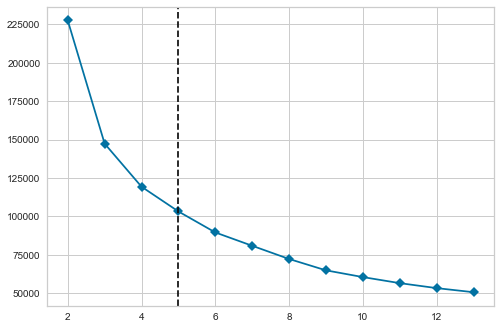

In [103]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

#Validación de número óptimo de clusters usando KEblbow
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,14), timings=False)
visualizer.fit(df_nuevo_clust.dropna())

In [104]:
kmeans = KMeans(n_clusters=5)
kmeans_y = kmeans.fit(df_nuevo_clust.dropna())
centroids = list(kmeans_y.cluster_centers_)
centroids

[array([29.21438263, 29.1837032 , 29.1361779 , 29.05891979, 28.9316922 ,
        28.75828727, 28.48656476, 28.03078406, 27.20698471, 25.8672253 ,
        23.85573084, 21.24713197, 18.17321851, 15.34023256, 13.18642121,
        11.85637338, 10.80860079,  9.7820051 ,  8.54144191,  7.27356461]),
 array([27.50436319, 27.47078801, 27.37942941, 27.13918498, 26.52219025,
        25.07011208, 22.81061654, 20.16611437, 17.77589974, 15.93282226,
        14.81386278, 14.20848721, 13.84133956, 13.52588433, 13.19751331,
        12.75028685, 11.88267092, 10.50655738,  8.84276387,  7.31841158]),
 array([26.59139392, 26.51582799, 26.09903237, 24.76500458, 22.7915053 ,
        20.69487584, 18.96883415, 17.81509811, 17.07544851, 16.52060104,
        16.06474568, 15.60159152, 15.10605331, 14.59149774, 14.01762698,
        13.23711792, 11.9970538 , 10.30964853,  8.48273027,  7.0631704 ]),
 array([28.17991361, 28.16316608, 28.12659129, 28.03473649, 27.87928245,
        27.49812308, 26.65760504, 25.03330557

(0.0, 35.0)

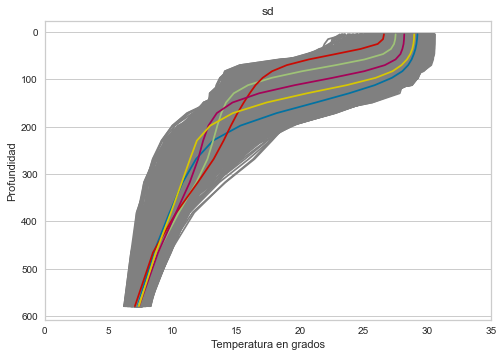

In [109]:
for i in group_dict:
    df_plot = df_profundo_1997.iloc[group_dict[i]]
    plt.plot(df_plot['temp (degree_C)'],df_plot['depth (m)'],color='gray')

for i in centroids:
    plt.plot(i,df_nuevo_clust.dropna().columns)
    
plt.ylabel('Profundidad')
plt.xlabel('Temperatura en grados')

plt.grid(axis='x')

plt.title('sd')
plt.gca().invert_yaxis()
plt.gca().set_xlim(0,35)

In [45]:
#Normalización de datos
df_cluster = df_previo.append(df_actual, ignore_index=True)[['temp (degree_C)', 'salt (PSU)']].dropna()
df_cluster = (df_cluster - df_cluster.mean())/df_cluster.std()
df_cluster

temp (degree_C)  salt (PSU)
0               0.642540   -0.677033
1               0.707488   -0.661542
2               0.746383   -0.626811
3               0.773255   -0.639533
4               0.823067   -0.740118
...                  ...         ...
3012718        -0.120742   -4.524004
3012719        -0.141230   -4.939522
3012720        -0.217859   -4.769391
3012721        -0.275549   -4.420688
3012722        -0.328930   -4.173753

[2971311 rows x 2 columns]

AttributeError: 'KMeans' object has no attribute 'k'

AttributeError: 'KMeans' object has no attribute 'k'

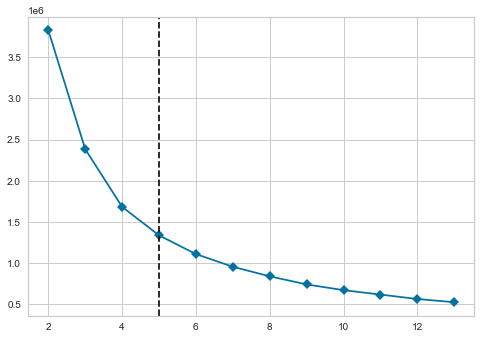

In [47]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

#Validación de número óptimo de clusters usando KEblbow
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,14), timings=False)
visualizer.fit(df_cluster)


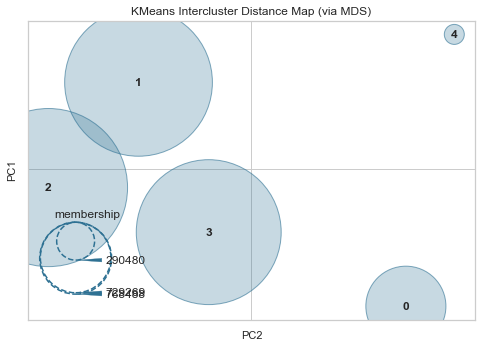

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [50]:
from yellowbrick.cluster import InterclusterDistance
kmeans = KMeans(n_clusters=5)
visualizer = InterclusterDistance(kmeans, random_state=0)
visualizer.fit(df_cluster)        # Fit the data to the visualizer
visualizer.show()  

In [53]:
kmeans_y = kmeans.fit(df_cluster)

In [62]:
centroids = list(kmeans_y.cluster_centers_) #[[x1,y1], [x2,y2]...]
df_clustering = df_cluster.copy()
df_clustering['cluster'] = kmeans_y.labels_

In [86]:
#df_clustering['center_temp'] = df_clustering.apply(lambda row : centroids[int(row['cluster'])][0], axis=1)
#df_clustering['center_salt'] = df_clustering.apply(lambda row : centroids[int(row['cluster'])][1], axis=1)
def distance(row):  #distancia euclidiana
    return (((centroids[int(row['cluster'])][1]-row['salt (PSU)'])**2) + ((centroids[int(row['cluster'])][0]-row['temp (degree_C)'])**2))**(1/2)
df_clustering['distance'] = df_clustering.apply(lambda row : distance(row), axis=1)
df_clustering

temp (degree_C)  salt (PSU)  cluster  distance
0               0.642540   -0.677033        0  0.270134
1               0.707488   -0.661542        0  0.213824
2               0.746383   -0.626811        0  0.162470
3               0.773255   -0.639533        0  0.159264
4               0.823067   -0.740118        0  0.244322
...                  ...         ...      ...       ...
3012718        -0.120742   -4.524004        1  2.189128
3012719        -0.141230   -4.939522        1  2.601808
3012720        -0.217859   -4.769391        1  2.427799
3012721        -0.275549   -4.420688        1  2.077516
3012722        -0.328930   -4.173753        1  1.830245

[2971311 rows x 4 columns]

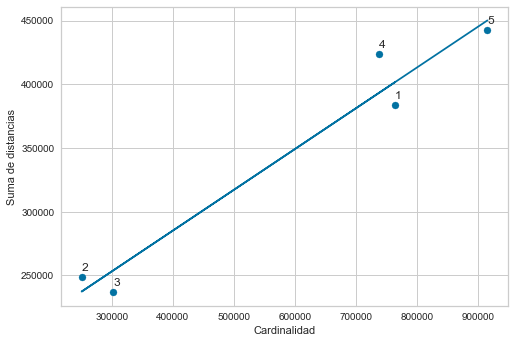

In [111]:
x,y = df_clustering.groupby('cluster')['distance'].count(),df_clustering.groupby('cluster')['distance'].sum().tolist()
#x: cardinalidad de clusters
#y: suma de distancias del cluster
m, b = np.polyfit(x, y, 1)
plt.scatter( x,y )
for i in range(len(x)):
    plt.annotate(str(i+1), (x[i], y[i]+5000))
plt.xlabel("Cardinalidad")
plt.ylabel("Suma de distancias")
plt.plot(x, m*x+b)

In [112]:
centroids

[array([ 0.84363531, -0.49666368]),
 array([-0.31550503, -2.34355654]),
 array([-2.0935127, -0.0059728]),
 array([-0.58279983,  0.39884329]),
 array([0.54536761, 0.74100238])]

Evaluando los valores de cada centroide con su cardinalidad, se puede observar que los clusters 2 y 3 (de indices 1 y 2) son los de menor cardinalidad, y al mismo tiempo son clusters con valores de salinidad y temperatura respectivamente, muy inferiores a la media. Por otro lado, los otros 3 clusters son de la relación "a mayor temperatura menor salinidad" (cluster 1), "a mayor salinidad, menor temperatura" (cluster 4) y "a mayor temperatura, mayor salinidad y viceversa" (cluster 5).

Como estas últimas tres relaciones tienen cardinalidades relativamente similares, y las métricas de clustering no rechazan la metodología, no se puede concluir que exista una relación significativa entre estas dos variables.

Se usa como métrica la distancia euclidiana, porque son dos valores escalares como la salinidad y la temperatura.

Se usó el método Elbow para evaluar una cantidad ideal de centroides k.

Se compara la suma de distancias con la cardinalidad para detectar algún cluster anómalo